In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_excel('/content/drive/MyDrive/Case Study - Data Science (Egypt).xlsx', sheet_name=3)

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [5]:
data.head(10)

PeriodVFP Outlet mnemonic                            Cell Name  Electronic  \
0        361          ZD8020  CENTRAL UPPER EGYPT-R-LARGE GROCERY       False   
1        361          ASQ005                      FATHALLAH ASWAQ        True   
2        361          QNR089          SOUTHERN UE R SMALL GROCERY       False   
3        361          KHZ049                          KHEIR ZAMAN        True   
4        361          LX4700        South Upper Egypt Supermarket       False   
5        361          RAG052                           RAGAB SONS        True   
6        361          KHZ052                          KHEIR ZAMAN        True   
7        361          RAG027                           RAGAB SONS        True   
8        361          RAG041                           RAGAB SONS        True   
9        361          KHZ032                          KHEIR ZAMAN        True   

         Region                  Channel  \
0  UPPER EGYPT             Large Grocery   
1    ALEXANDRIA  Supermarket/Key Account   
2  UPPER EGYPT             Small Grocery   
3        CAIRO   Supermarket/Key Account   
4  UPPER EGYPT   Supermarket/Key Account   
5        CAIRO   Supermarket/Key Account   
6        CAIRO   Supermarket/Key Account   
7        DELTA   Supermarket/Key Account   
8        CAIRO   Supermarket/Key Account   
9        CAIRO   Supermarket/Key Account   

                                                  Category name  \
0  CHEESE- BLOCK                                                  
1  CHEESE- BLOCK                                                  
2  CHEESE- BLOCK                                                  
3  CHEESE- BLOCK                                                  
4  CHEESE- BLOCK                                                  
5  CHEESE- BLOCK                                                  
6  CHEESE- BLOCK                                                  
7  CHEESE- BLOCK                                                  
8  CHEESE- BLOCK                                                  
9  CHEESE- BLOCK                                                  

                    Manufacturer name  Brand name  \
0                       OBOUR LAND CO  OBOUR LAND   
1                          HALAYEB CO     HALAYEB   
2                       OBOUR LAND CO  OBOUR LAND   
3                     LACTALIS-HALAWA   PRESIDENT   
4                     LACTALIS-HALAWA   PRESIDENT   
5         THE ARAB DAIRY PRODUCTS CO.       PANDA   
6  DOMTY - ARABIAN FOOD INDUSTRIES CO       DOMTY   
7         THE ARAB DAIRY PRODUCTS CO.       PANDA   
8                     LACTALIS-HALAWA   PRESIDENT   
9                     LACTALIS-HALAWA  GREEN LAND   

                         Product name   XFactor  Raw Sales Volume  \
0            OBOUR LAND FETA 500G CRT  186.6969           13.7750   
1             HALAYEB TALAGA 400G TUB    1.0000            2.6160   
2            OBOUR LAND FETA 500G CRT  212.0554            2.9500   
3             PRESIDENT FETA 250G CRT    1.0000            3.8125   
4             PRESIDENT FETA 500G TUB   10.9699            2.0350   
5  PANDA WHITE CHEESE OLIVE 250GR CRT    1.0000            0.2725   
6                 DOMTY FETA 250G CRT    1.0000            1.9075   
7           PANDA FETA LIGHT 500G CRT    1.0000           28.3200   
8             PRESIDENT FETA 500G TUB    1.0000           29.4100   
9        GREEN LAND BARAMILY 450G TUB    1.0000            2.9430   

   Extrapolated Sales Volume  
0                2571.749798  
1                   2.616000  
2                 625.563430  
3                   3.812500  
4                  22.323747  
5                   0.272500  
6                   1.907500  
7                  28.320000  
8                  29.410000  
9                   2.943000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994749 entries, 0 to 994748
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PeriodVFP                  994749 non-null  int64  
 1   Outlet mnemonic            994749 non-null  object 
 2   Cell Name                  994749 non-null  object 
 3   Electronic                 994749 non-null  bool   
 4   Region                     994749 non-null  object 
 5   Channel                    994749 non-null  object 
 6   Category name              983173 non-null  object 
 7   Manufacturer name          983173 non-null  object 
 8   Brand name                 983173 non-null  object 
 9   Product name               983173 non-null  object 
 10  XFactor                    994749 non-null  float64
 11  Raw Sales Volume           983173 non-null  float64
 12  Extrapolated Sales Volume  994749 non-null  float64
dtypes: bool(1), float64(3), int64

In [7]:
data.describe()

PeriodVFP        XFactor  Raw Sales Volume  \
count  994749.000000  994749.000000     983173.000000   
mean      372.193752      44.236991         17.598466   
std         6.946373     107.284482         72.831053   
min       361.000000       0.733100          0.000000   
25%       366.000000       1.000000          1.305000   
50%       372.000000       1.000000          4.830000   
75%       378.000000       3.316400         14.160000   
max       384.000000    1383.278000      13577.720000   

       Extrapolated Sales Volume  
count              994749.000000  
mean                  409.503943  
std                  1882.436078  
min                     0.000000  
25%                     1.635000  
50%                     7.897500  
75%                    54.470000  
max                150142.583232

In [8]:
def columns_info(data):
  cols = []
  dtypes = []
  unique = []
  n_unique = []

  for col in data.columns:
    cols.append(col)
    dtypes.append(data[col].dtype)
    unique.append(data[col].unique())
    n_unique.append(data[col].nunique())

  return pd.DataFrame({'names': cols, 'types': dtypes, 'unique':unique, 'n_unique':n_unique})

In [9]:
columns_info(data)

names    types  \
0                   PeriodVFP    int64   
1             Outlet mnemonic   object   
2                   Cell Name   object   
3                  Electronic     bool   
4                      Region   object   
5                     Channel   object   
6               Category name   object   
7           Manufacturer name   object   
8                  Brand name   object   
9                Product name   object   
10                    XFactor  float64   
11           Raw Sales Volume  float64   
12  Extrapolated Sales Volume  float64   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   unique  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [10]:
description = pd.read_excel('/content/drive/MyDrive/Case Study - Data Science (Egypt).xlsx', sheet_name=1)
description

PeriodVFP  \
0             Outlet mnemonic   
1                   Cell Name   
2                  Electronic   
3                      Region   
4                     Channel   
5               Category name   
6           Manufacturer name   
7                  Brand name   
8                Product name   
9                     XFactor   
10           Raw Sales Volume   
11  Extrapolated Sales Volume   
12                        NaN   
13                        NaN   
14                        NaN   
15                        NaN   
16                        NaN   
17                        NaN   
18                        NaN   
19                        NaN   
20                        NaN   
21                        NaN   
22                        NaN   
23                        NaN   
24                        NaN   

                                                                                                24 Months from Jan'20 to Dec'21. i.e "361"= Jan'20, "384"=Dec'21  \
0                                                                                                                                Unique code identifying a store   
1                                                                            Cross between the region and channel to uniquely identify the location of the store   
2                              Identifies the source of data. TRUE = electronic data received from retailer. FALSE = manual collected data by Nielsen Field team   
3                                                                                                                             The region reporting for the store   
4                                                                                                                            The channel reporting for the store   
5                                                                   Split within White Cheese category for similar SKUs (block, block by weight, cottage cheese)   
6                                                                                         Company owner of the SKU (example: DOMTY - ARABIAN FOOD INDUSTRIES CO)   
7   Product identity within a company. A company can have multiple brands (example: Domty, Domty Plus, Gebnaty are brands of DOMTY - ARABIAN FOOD INDUSTRIES CO)   
8                                                                                        A unique identifier of each product (example: DOMTY PLUS FETA 250G CRT)   
9         The factor representing the number of similar stores in the universe (for example, XFactor = 2 means that there are 10 similar stores in the universe)   
10                                                                                                                                       Sales per stores in KGs   
11                                                Extrapolated sales per stores in Liters (extrapolated = raw sales volume * x-factor representing the universe)   
12                                                                                                                                                           NaN   
13                                                                                                                                                           NaN   
14                                                                                                                                                           NaN   
15                                                                                                                                                           NaN   
16                                                                                                                                                           NaN   
17                                                                                                                                                           NaN   
18                                           

In [11]:
data.nunique()

PeriodVFP                        24
Outlet mnemonic                2235
Cell Name                       119
Electronic                        2
Region                            5
Channel                           4
Category name                     3
Manufacturer name               712
Brand name                      815
Product name                   1749
XFactor                        1797
Raw Sales Volume              18143
Extrapolated Sales Volume    176870
dtype: int64

In [12]:
data['Channel'].value_counts()

Channel
Supermarket/Key Account     812525
Small Grocery                97446
Large Grocery                66497
Haberdashery/Kiosk/Mekla     18281
Name: count, dtype: int64

In [13]:
data['Category name'].value_counts()

Category name
CHEESE- BLOCK                                                   960832
CHEESE (BLOCKS SOLD BY WEIGHT)                                   15413
CHEESE- COTTAGE                                                   6928
Name: count, dtype: int64

In [14]:
data['Electronic'].value_counts()

Electronic
True     786690
False    208059
Name: count, dtype: int64

In [15]:
data.duplicated().sum()

0

In [16]:
data.isnull().sum()

PeriodVFP                        0
Outlet mnemonic                  0
Cell Name                        0
Electronic                       0
Region                           0
Channel                          0
Category name                11576
Manufacturer name            11576
Brand name                   11576
Product name                 11576
XFactor                          0
Raw Sales Volume             11576
Extrapolated Sales Volume        0
dtype: int64

In [17]:
(data.isnull().sum() / len(data) * 100).round(2)

PeriodVFP                    0.00
Outlet mnemonic              0.00
Cell Name                    0.00
Electronic                   0.00
Region                       0.00
Channel                      0.00
Category name                1.16
Manufacturer name            1.16
Brand name                   1.16
Product name                 1.16
XFactor                      0.00
Raw Sales Volume             1.16
Extrapolated Sales Volume    0.00
dtype: float64

In [18]:
missing_data_rows = data[data[['Category name', 'Manufacturer name', 'Brand name', 'Product name', 'Raw Sales Volume']].isnull().any(axis=1)]
len(missing_data_rows)

11576

*   This indicates that the rows with missing values are the same across these columns.
*   The Raw Sales Volume and Extrapolated Sales Volume columns are also missing values, which are critical for any sales analysis.
*   So, It would not be efficient or useful to attempt to fill these rows.



In [19]:
missing_data_rows.head()

PeriodVFP Outlet mnemonic                        Cell Name  Electronic  \
306        361          DMT035              EAST DELTA-U-KIOSKS       False   
307        361          KAR046  EAST DELTA-R-MEKLA (ROASTERIES)       False   
308        361          A00862       ALEXANDRIA-U-SMALL GROCERY       False   
309        361          DMT049      EAST DELTA-U-HABERDASHERIES       False   
310        361          IS1686      CANAL ZONE-U-HABERDASHERIES       False   

          Region                   Channel Category name Manufacturer name  \
306       DELTA   Haberdashery/Kiosk/Mekla           NaN               NaN   
307       DELTA   Haberdashery/Kiosk/Mekla           NaN               NaN   
308   ALEXANDRIA             Small Grocery           NaN               NaN   
309       DELTA   Haberdashery/Kiosk/Mekla           NaN               NaN   
310  CANAL ZONE   Haberdashery/Kiosk/Mekla           NaN               NaN   

    Brand name Product name   XFactor  Raw Sales Volume  \
306        NaN          NaN   75.1340               NaN   
307        NaN          NaN  188.7477               NaN   
308        NaN          NaN  201.3802               NaN   
309        NaN          NaN   65.9773               NaN   
310        NaN          NaN   45.0099               NaN   

     Extrapolated Sales Volume  
306                        0.0  
307                        0.0  
308                        0.0  
309                        0.0  
310                        0.0

In [20]:
data.dropna(subset=['Category name', 'Manufacturer name', 'Brand name', 'Product name', 'Raw Sales Volume'], inplace=True)

In [21]:
data.isnull().sum()

PeriodVFP                    0
Outlet mnemonic              0
Cell Name                    0
Electronic                   0
Region                       0
Channel                      0
Category name                0
Manufacturer name            0
Brand name                   0
Product name                 0
XFactor                      0
Raw Sales Volume             0
Extrapolated Sales Volume    0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983173 entries, 0 to 994748
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PeriodVFP                  983173 non-null  int64  
 1   Outlet mnemonic            983173 non-null  object 
 2   Cell Name                  983173 non-null  object 
 3   Electronic                 983173 non-null  bool   
 4   Region                     983173 non-null  object 
 5   Channel                    983173 non-null  object 
 6   Category name              983173 non-null  object 
 7   Manufacturer name          983173 non-null  object 
 8   Brand name                 983173 non-null  object 
 9   Product name               983173 non-null  object 
 10  XFactor                    983173 non-null  float64
 11  Raw Sales Volume           983173 non-null  float64
 12  Extrapolated Sales Volume  983173 non-null  float64
dtypes: bool(1), float64(3), int64(1), 

In [23]:
data['PeriodVFP'].nunique()

24

The dataset spans a total of 24 months, covering a period from January 2020 to December 2021. Each month is represented by a unique PeriodVFP code, which corresponds to a specific date.

In [24]:
period_mapping = {
    361: '2020-01-01', 362: '2020-02-01', 363: '2020-03-01',
    364: '2020-04-01', 365: '2020-05-01', 366: '2020-06-01',
    367: '2020-07-01', 368: '2020-08-01', 369: '2020-09-01',
    370: '2020-10-01', 371: '2020-11-01', 372: '2020-12-01',
    373: '2021-01-01', 374: '2021-02-01', 375: '2021-03-01',
    376: '2021-04-01', 377: '2021-05-01', 378: '2021-06-01',
    379: '2021-07-01', 380: '2021-08-01', 381: '2021-09-01',
    382: '2021-10-01', 383: '2021-11-01', 384: '2021-12-01'
}

period_df = pd.DataFrame(list(period_mapping.items()), columns=['PeriodVFP', 'PeriodDate'])
period_df['PeriodDate'] = pd.to_datetime(period_df['PeriodDate']).dt.date

period_df

PeriodVFP  PeriodDate
0         361  2020-01-01
1         362  2020-02-01
2         363  2020-03-01
3         364  2020-04-01
4         365  2020-05-01
5         366  2020-06-01
6         367  2020-07-01
7         368  2020-08-01
8         369  2020-09-01
9         370  2020-10-01
10        371  2020-11-01
11        372  2020-12-01
12        373  2021-01-01
13        374  2021-02-01
14        375  2021-03-01
15        376  2021-04-01
16        377  2021-05-01
17        378  2021-06-01
18        379  2021-07-01
19        380  2021-08-01
20        381  2021-09-01
21        382  2021-10-01
22        383  2021-11-01
23        384  2021-12-01

In [25]:
data = pd.merge(data, period_df, on='PeriodVFP', how='left')
data.head()

PeriodVFP Outlet mnemonic                            Cell Name  Electronic  \
0        361          ZD8020  CENTRAL UPPER EGYPT-R-LARGE GROCERY       False   
1        361          ASQ005                      FATHALLAH ASWAQ        True   
2        361          QNR089          SOUTHERN UE R SMALL GROCERY       False   
3        361          KHZ049                          KHEIR ZAMAN        True   
4        361          LX4700        South Upper Egypt Supermarket       False   

         Region                  Channel  \
0  UPPER EGYPT             Large Grocery   
1    ALEXANDRIA  Supermarket/Key Account   
2  UPPER EGYPT             Small Grocery   
3        CAIRO   Supermarket/Key Account   
4  UPPER EGYPT   Supermarket/Key Account   

                                                  Category name  \
0  CHEESE- BLOCK                                                  
1  CHEESE- BLOCK                                                  
2  CHEESE- BLOCK                                                  
3  CHEESE- BLOCK                                                  
4  CHEESE- BLOCK                                                  

  Manufacturer name  Brand name              Product name   XFactor  \
0     OBOUR LAND CO  OBOUR LAND  OBOUR LAND FETA 500G CRT  186.6969   
1        HALAYEB CO     HALAYEB   HALAYEB TALAGA 400G TUB    1.0000   
2     OBOUR LAND CO  OBOUR LAND  OBOUR LAND FETA 500G CRT  212.0554   
3   LACTALIS-HALAWA   PRESIDENT   PRESIDENT FETA 250G CRT    1.0000   
4   LACTALIS-HALAWA   PRESIDENT   PRESIDENT FETA 500G TUB   10.9699   

   Raw Sales Volume  Extrapolated Sales Volume  PeriodDate  
0           13.7750                2571.749798  2020-01-01  
1            2.6160                   2.616000  2020-01-01  
2            2.9500                 625.563430  2020-01-01  
3            3.8125                   3.812500  2020-01-01  
4            2.0350                  22.323747  2020-01-01

In [26]:
data.drop(['PeriodVFP'], axis=1, inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983173 entries, 0 to 983172
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Outlet mnemonic            983173 non-null  object 
 1   Cell Name                  983173 non-null  object 
 2   Electronic                 983173 non-null  bool   
 3   Region                     983173 non-null  object 
 4   Channel                    983173 non-null  object 
 5   Category name              983173 non-null  object 
 6   Manufacturer name          983173 non-null  object 
 7   Brand name                 983173 non-null  object 
 8   Product name               983173 non-null  object 
 9   XFactor                    983173 non-null  float64
 10  Raw Sales Volume           983173 non-null  float64
 11  Extrapolated Sales Volume  983173 non-null  float64
 12  PeriodDate                 983173 non-null  object 
dtypes: bool(1), float64(3), objec

In [28]:
data.head(10)

Outlet mnemonic                            Cell Name  Electronic  \
0          ZD8020  CENTRAL UPPER EGYPT-R-LARGE GROCERY       False   
1          ASQ005                      FATHALLAH ASWAQ        True   
2          QNR089          SOUTHERN UE R SMALL GROCERY       False   
3          KHZ049                          KHEIR ZAMAN        True   
4          LX4700        South Upper Egypt Supermarket       False   
5          RAG052                           RAGAB SONS        True   
6          KHZ052                          KHEIR ZAMAN        True   
7          RAG027                           RAGAB SONS        True   
8          RAG041                           RAGAB SONS        True   
9          KHZ032                          KHEIR ZAMAN        True   

         Region                  Channel  \
0  UPPER EGYPT             Large Grocery   
1    ALEXANDRIA  Supermarket/Key Account   
2  UPPER EGYPT             Small Grocery   
3        CAIRO   Supermarket/Key Account   
4  UPPER EGYPT   Supermarket/Key Account   
5        CAIRO   Supermarket/Key Account   
6        CAIRO   Supermarket/Key Account   
7        DELTA   Supermarket/Key Account   
8        CAIRO   Supermarket/Key Account   
9        CAIRO   Supermarket/Key Account   

                                                  Category name  \
0  CHEESE- BLOCK                                                  
1  CHEESE- BLOCK                                                  
2  CHEESE- BLOCK                                                  
3  CHEESE- BLOCK                                                  
4  CHEESE- BLOCK                                                  
5  CHEESE- BLOCK                                                  
6  CHEESE- BLOCK                                                  
7  CHEESE- BLOCK                                                  
8  CHEESE- BLOCK                                                  
9  CHEESE- BLOCK                                                  

                    Manufacturer name  Brand name  \
0                       OBOUR LAND CO  OBOUR LAND   
1                          HALAYEB CO     HALAYEB   
2                       OBOUR LAND CO  OBOUR LAND   
3                     LACTALIS-HALAWA   PRESIDENT   
4                     LACTALIS-HALAWA   PRESIDENT   
5         THE ARAB DAIRY PRODUCTS CO.       PANDA   
6  DOMTY - ARABIAN FOOD INDUSTRIES CO       DOMTY   
7         THE ARAB DAIRY PRODUCTS CO.       PANDA   
8                     LACTALIS-HALAWA   PRESIDENT   
9                     LACTALIS-HALAWA  GREEN LAND   

                         Product name   XFactor  Raw Sales Volume  \
0            OBOUR LAND FETA 500G CRT  186.6969           13.7750   
1             HALAYEB TALAGA 400G TUB    1.0000            2.6160   
2            OBOUR LAND FETA 500G CRT  212.0554            2.9500   
3             PRESIDENT FETA 250G CRT    1.0000            3.8125   
4             PRESIDENT FETA 500G TUB   10.9699            2.0350   
5  PANDA WHITE CHEESE OLIVE 250GR CRT    1.0000            0.2725   
6                 DOMTY FETA 250G CRT    1.0000            1.9075   
7           PANDA FETA LIGHT 500G CRT    1.0000           28.3200   
8             PRESIDENT FETA 500G TUB    1.0000           29.4100   
9        GREEN LAND BARAMILY 450G TUB    1.0000            2.9430   

   Extrapolated Sales Volume  PeriodDate  
0                2571.749798  2020-01-01  
1                   2.616000  2020-01-01  
2                 625.563430  2020-01-01  
3                   3.812500  2020-01-01  
4                  22.323747  2020-01-01  
5                   0.272500  2020-01-01  
6                   1.907500  2020-01-01  
7                  28.320000  2020-01-01  
8                  29.410000  2020-01-01  
9                   2.943000  2020-01-01

To save a cleaned DataFrame from Google Colab to my local computer as an Excel file

In [29]:
# data.to_excel('cleaned_data.xlsx', index=False)

In [30]:
spearman_corr = data[data.select_dtypes(include=['number']).columns].corr(method='spearman')
spearman_corr

XFactor  Raw Sales Volume  \
XFactor                    1.000000          0.019228   
Raw Sales Volume           0.019228          1.000000   
Extrapolated Sales Volume  0.581246          0.766813   

                           Extrapolated Sales Volume  
XFactor                                     0.581246  
Raw Sales Volume                            0.766813  
Extrapolated Sales Volume                   1.000000

In [31]:
kendall_corr = data[data.select_dtypes(include=['number']).columns].corr(method='kendall')
kendall_corr

XFactor  Raw Sales Volume  \
XFactor                    1.000000          0.014481   
Raw Sales Volume           0.014481          1.000000   
Extrapolated Sales Volume  0.468317          0.684999   

                           Extrapolated Sales Volume  
XFactor                                     0.468317  
Raw Sales Volume                            0.684999  
Extrapolated Sales Volume                   1.000000

In [32]:
corr = data[data.select_dtypes(include=['number']).columns].corr()
corr

XFactor  Raw Sales Volume  \
XFactor                    1.000000         -0.043829   
Raw Sales Volume          -0.043829          1.000000   
Extrapolated Sales Volume  0.487164          0.103025   

                           Extrapolated Sales Volume  
XFactor                                     0.487164  
Raw Sales Volume                            0.103025  
Extrapolated Sales Volume                   1.000000

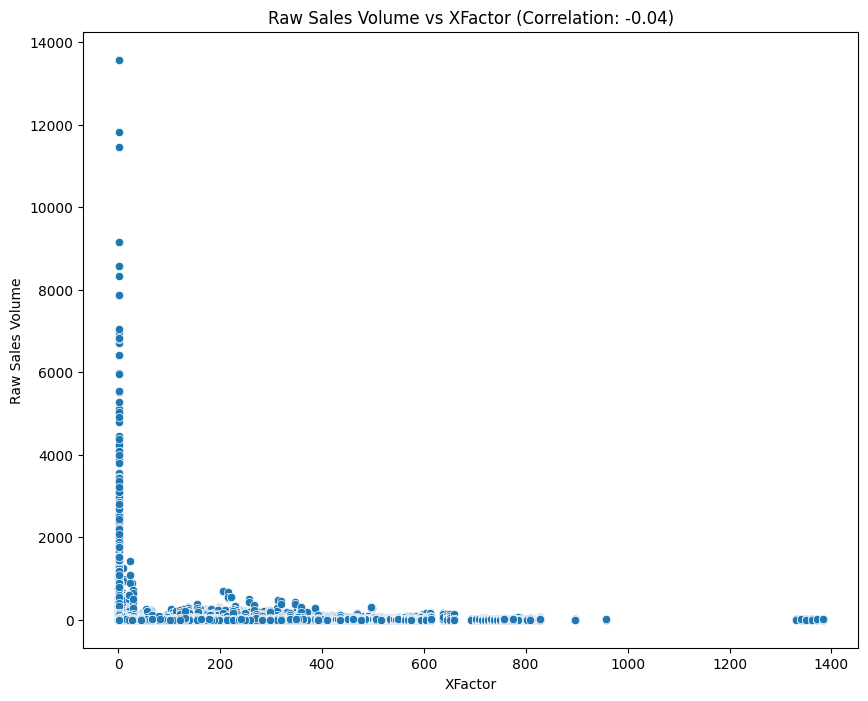

In [33]:
corr_value = corr.loc['XFactor', 'Raw Sales Volume']

plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='XFactor', y='Raw Sales Volume')
plt.title(f'Raw Sales Volume vs XFactor (Correlation: {corr_value:.2f})')
plt.xlabel('XFactor')
plt.ylabel('Raw Sales Volume')
plt.show()

*   There are a few high raw sales volumes concentrated at lower XFactor values, and as XFactor increases, the raw sales volume tends to be lower and more dispersed.
*   This could suggest that stores with higher XFactors (possibly more stores or outlets) generally have lower individual raw sales volumes, or there might be other underlying factors influencing this trend.



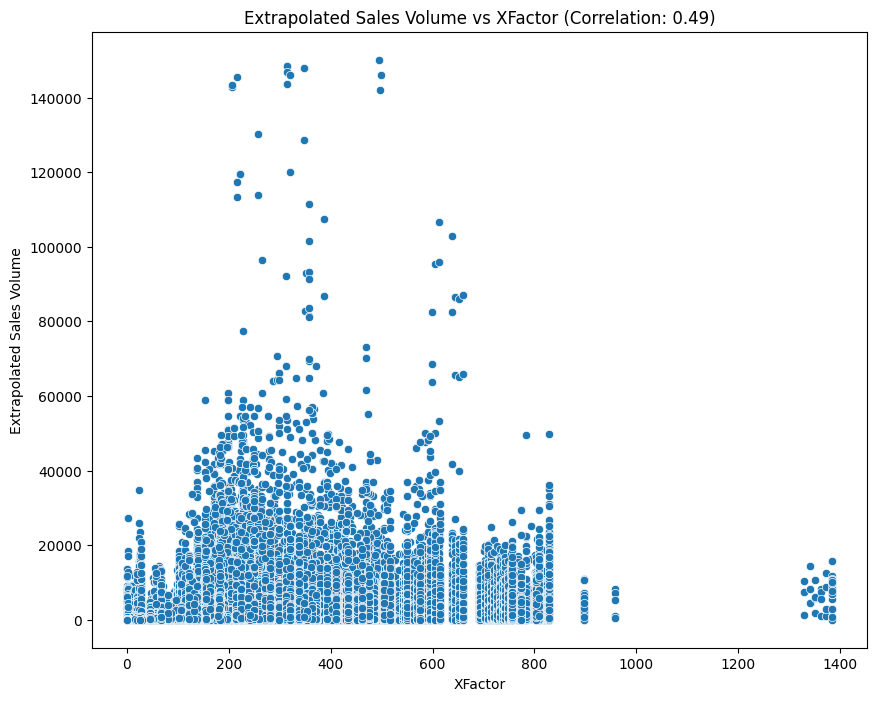

In [34]:
corr_value = corr.loc['XFactor', 'Extrapolated Sales Volume']

plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='XFactor', y='Extrapolated Sales Volume')
plt.title(f'Extrapolated Sales Volume vs XFactor (Correlation: {corr_value:.2f})')
plt.xlabel('XFactor')
plt.ylabel('Extrapolated Sales Volume')
plt.show()

*   The scatter plot shows a more dispersed pattern, indicating a wider spread of extrapolated sales volumes across different XFactor values.
*   This means that as the number of stores or outlets (XFactor) increases, the extrapolated sales volume tends to increase.



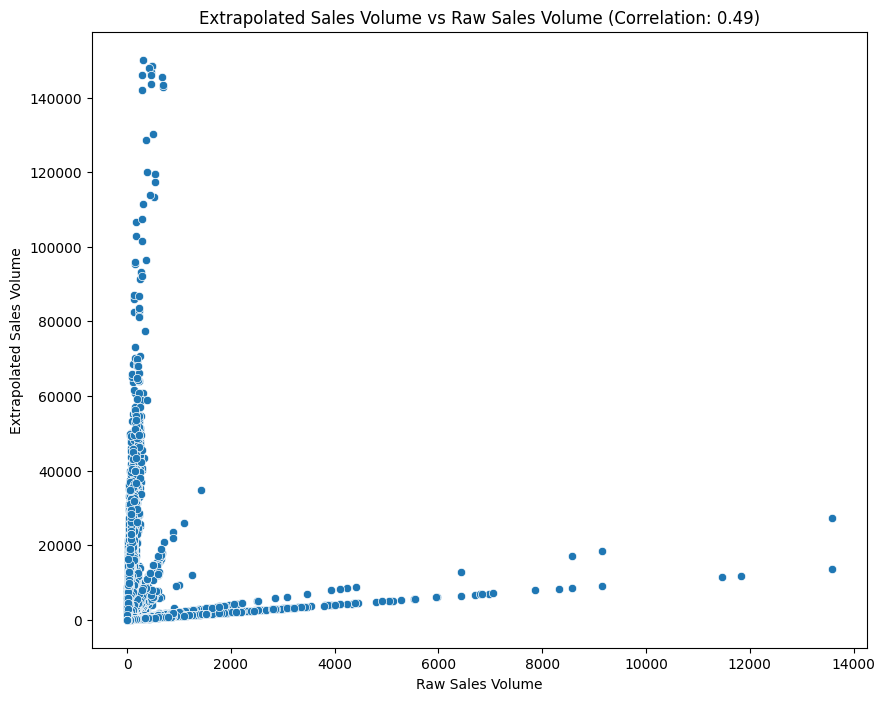

In [35]:
corr_value = corr.loc['XFactor', 'Extrapolated Sales Volume']

plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='Raw Sales Volume', y='Extrapolated Sales Volume')
plt.title(f'Extrapolated Sales Volume vs Raw Sales Volume (Correlation: {corr_value:.2f})')
plt.xlabel('Raw Sales Volume')
plt.ylabel('Extrapolated Sales Volume')
plt.show()

*   The plot suggests a positive correlation between extrapolated sales volume and raw sales volume, particularly at lower values.
*   However, as raw sales volume increases, the spread in extrapolated sales volume also increases, showing variability in extrapolation results.



# Data Analysis

## 1. Sales Performance Analysis

Overall Sales Trends: Analyze the Raw Sales Volume and Extrapolated Sales Volume over time to identify trends and seasonality.

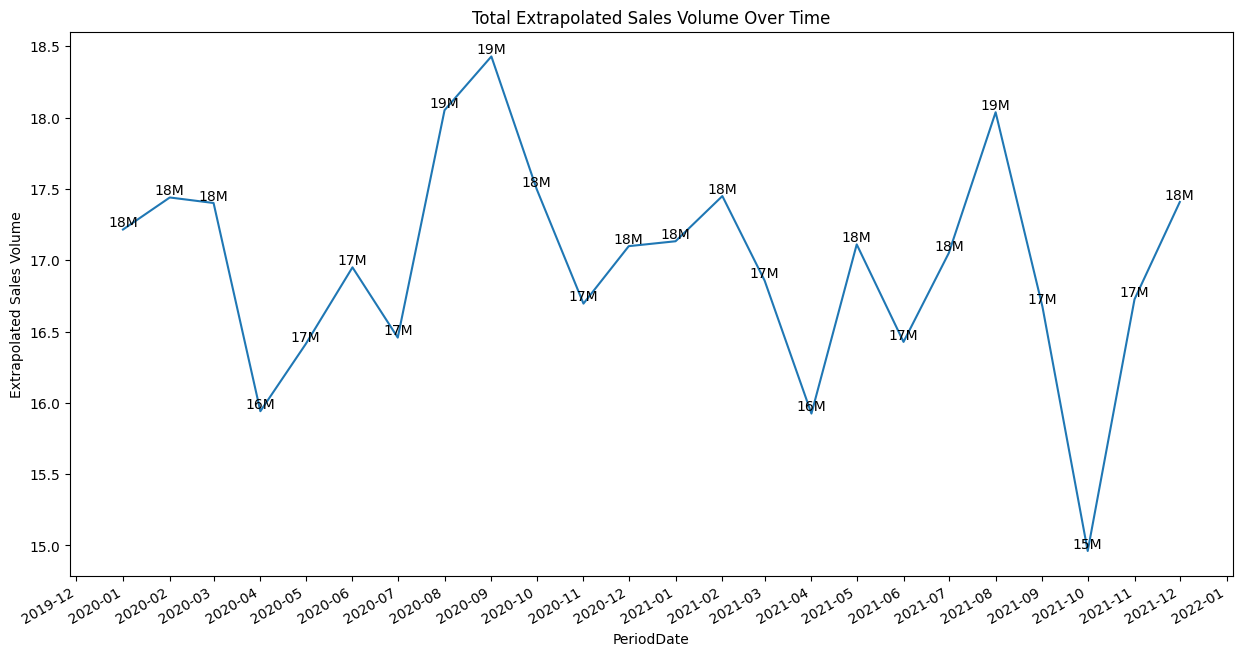

In [36]:
import matplotlib.dates as mdates
from math import ceil

data_sum = data.groupby('PeriodDate', as_index=False)['Extrapolated Sales Volume'].sum()
data_sum['Extrapolated Sales Volume'] = data_sum['Extrapolated Sales Volume'] / 1e6

plt.figure(figsize=(15,8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=data_sum, ci=None)
plt.title('Total Extrapolated Sales Volume Over Time')

# adding data labels to the chart
for x, y in zip(data_sum['PeriodDate'], data_sum['Extrapolated Sales Volume']):
    plt.text(x, y, f'{ceil(y)}M', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set the interval for months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the dates

# Automatically format the date labels to avoid overlapping
plt.gcf().autofmt_xdate()

plt.show()

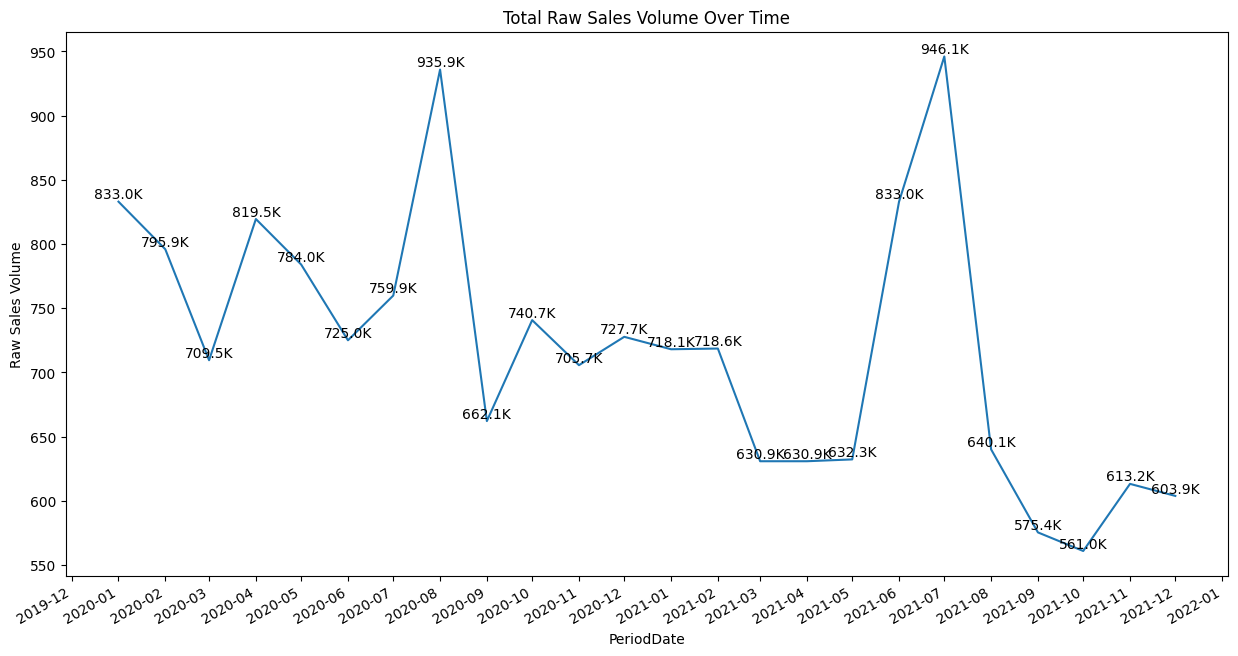

In [37]:
data_sum = data.groupby('PeriodDate', as_index=False)['Raw Sales Volume'].sum()
data_sum['Raw Sales Volume'] = data_sum['Raw Sales Volume'] / 1000

plt.figure(figsize=(15,8))
ax = sns.lineplot(x='PeriodDate', y='Raw Sales Volume', data=data_sum, ci=None)
plt.title('Total Raw Sales Volume Over Time')

for x, y in zip(data_sum['PeriodDate'], data_sum['Raw Sales Volume']):
    plt.text(x, y, f'{round(y,1)}K', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.gcf().autofmt_xdate()

plt.show()

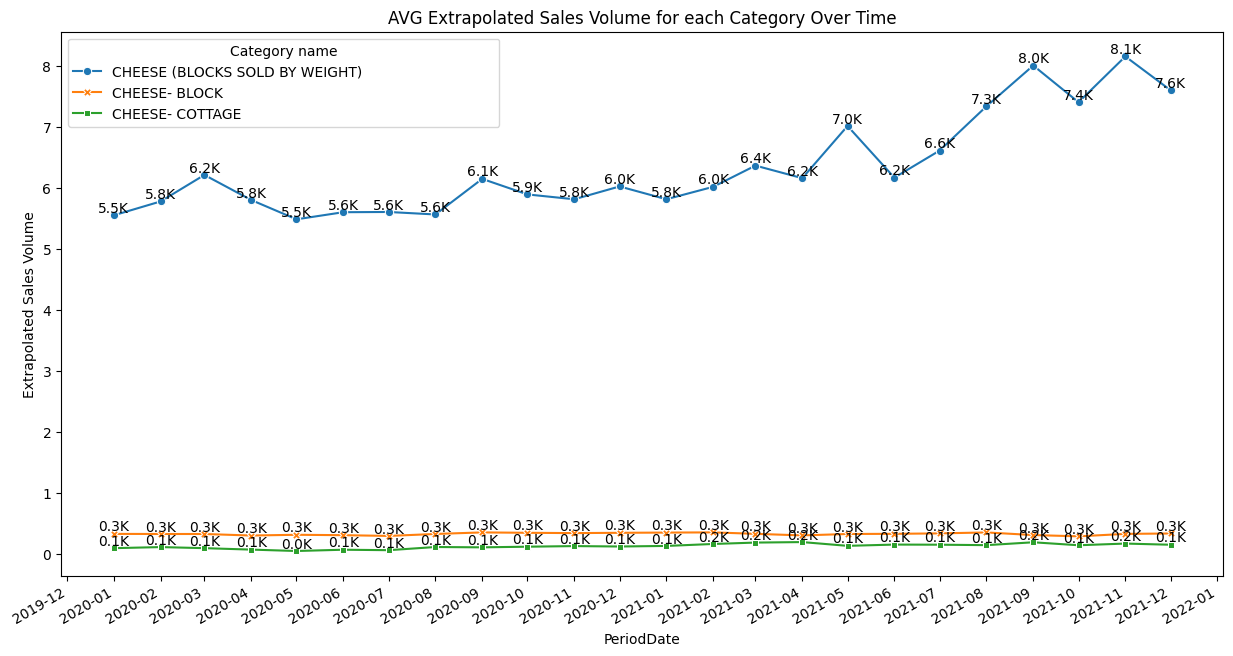

In [38]:
data_avg = data.groupby(['PeriodDate', 'Category name'], as_index=False)['Extrapolated Sales Volume'].mean()
data_avg['Extrapolated Sales Volume'] = data_avg['Extrapolated Sales Volume'] / 1000

plt.figure(figsize=(15,8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=data_avg, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
plt.title('AVG Extrapolated Sales Volume for each Category Over Time')

for x, y, label in zip(data_avg['PeriodDate'], data_avg['Extrapolated Sales Volume'], data_avg['Category name']):
    plt.text(x, y, f'{round(y, 1)}K', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.gcf().autofmt_xdate()

plt.show()

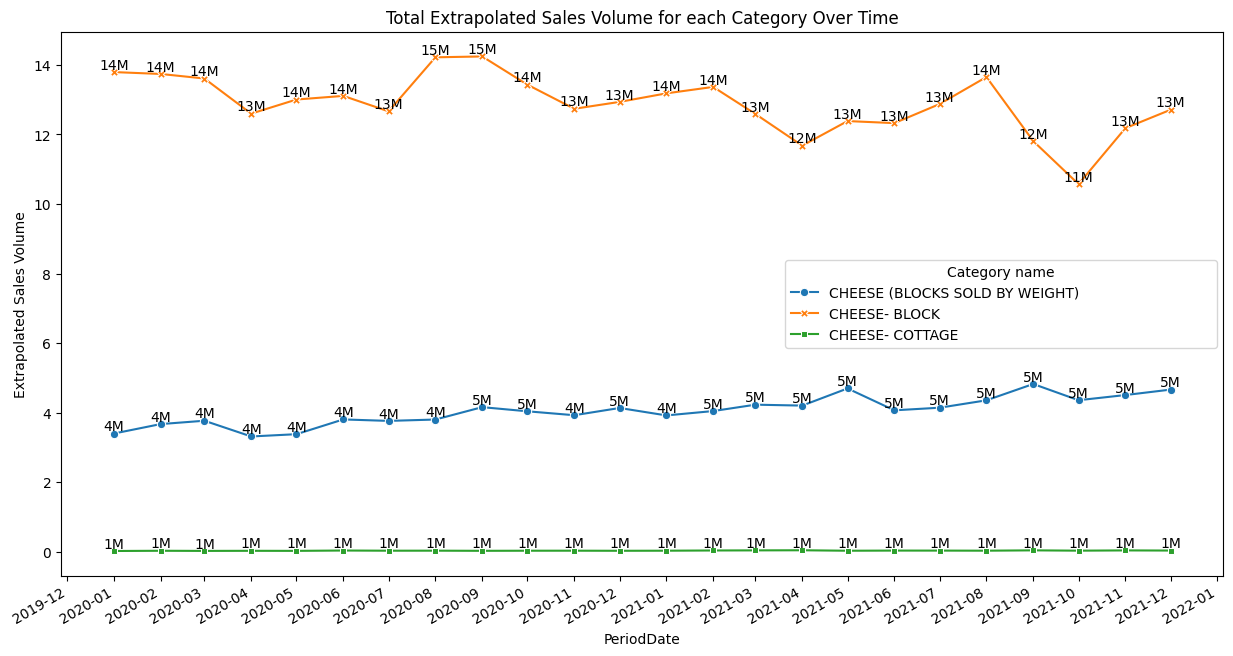

In [39]:
data_sum = data.groupby(['PeriodDate', 'Category name'], as_index=False)['Extrapolated Sales Volume'].sum()
data_sum['Extrapolated Sales Volume'] = data_sum['Extrapolated Sales Volume'] / 1e6

plt.figure(figsize=(15,8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=data_sum, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
plt.title('Total Extrapolated Sales Volume for each Category Over Time')

for x, y, label in zip(data_sum['PeriodDate'], data_sum['Extrapolated Sales Volume'], data_sum['Category name']):
    plt.text(x, y, f'{ceil(y)}M', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.gcf().autofmt_xdate()

plt.show()

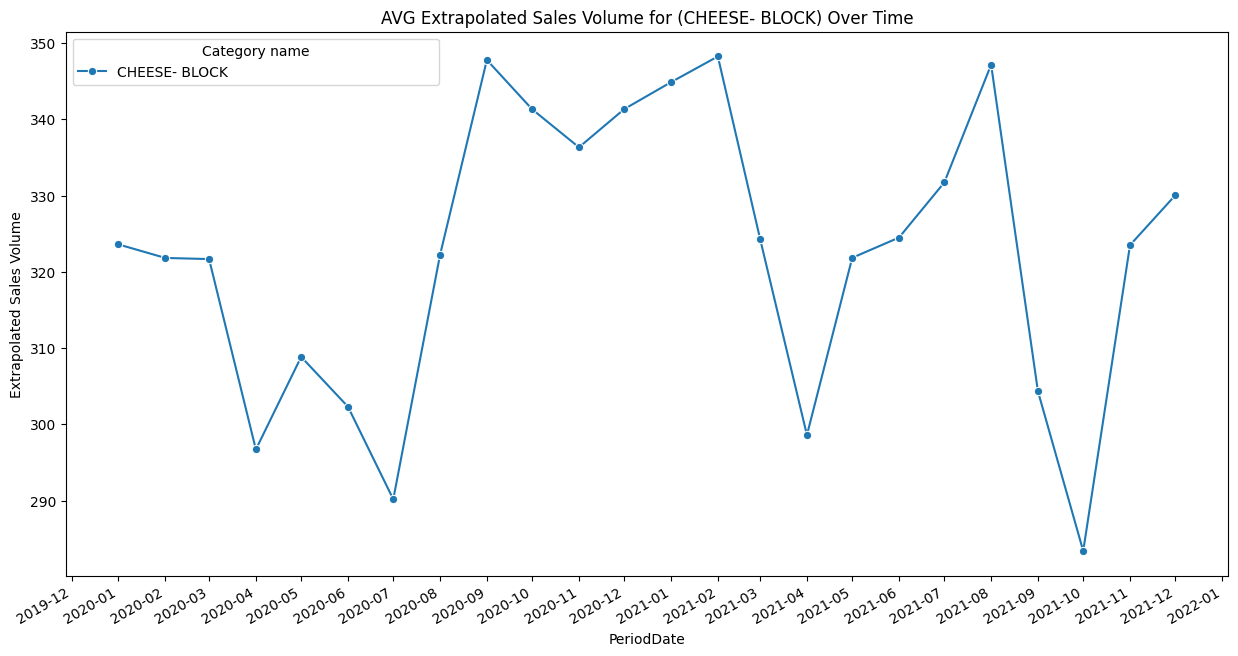

In [40]:
category_name = 'CHEESE- BLOCK'
filtered_data = data[data['Category name'].str.strip() == category_name]

plt.figure(figsize=(15, 8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=filtered_data, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
plt.title(f'AVG Extrapolated Sales Volume for ({category_name}) Over Time')
plt.xlabel('PeriodDate')
plt.ylabel('Extrapolated Sales Volume')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.gcf().autofmt_xdate()

plt.show()


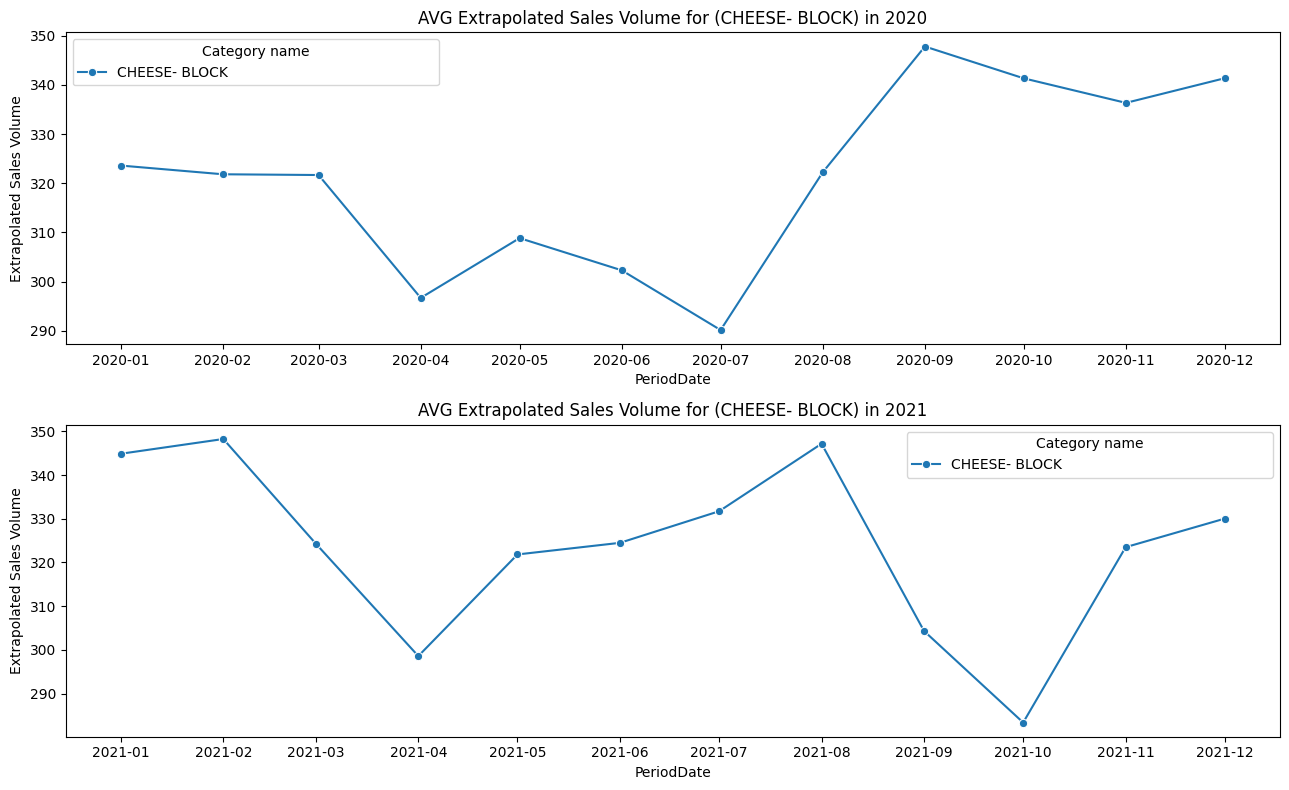

In [41]:
category_name = 'CHEESE- BLOCK'
filter_date = pd.to_datetime('2021-01-01')

filtered_data = data[data['Category name'].str.strip() == category_name]
filtered_data_1 = filtered_data[pd.to_datetime(filtered_data['PeriodDate']) < filter_date]
filtered_data_2 = filtered_data[pd.to_datetime(filtered_data['PeriodDate']) >= filter_date]

fig, ax = plt.subplots(2,1, figsize=(13, 8))

sns.lineplot(ax=ax[0] ,x='PeriodDate', y='Extrapolated Sales Volume', data=filtered_data_1, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
ax[0].set_title(f'AVG Extrapolated Sales Volume for ({category_name}) in 2020')
ax[0].set_xlabel('PeriodDate')
ax[0].set_ylabel('Extrapolated Sales Volume')

sns.lineplot(ax=ax[1], x='PeriodDate', y='Extrapolated Sales Volume', data=filtered_data_2, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
ax[1].set_title(f'AVG Extrapolated Sales Volume for ({category_name}) in 2021')
ax[1].set_xlabel('PeriodDate')
ax[1].set_ylabel('Extrapolated Sales Volume')

ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()
plt.show()


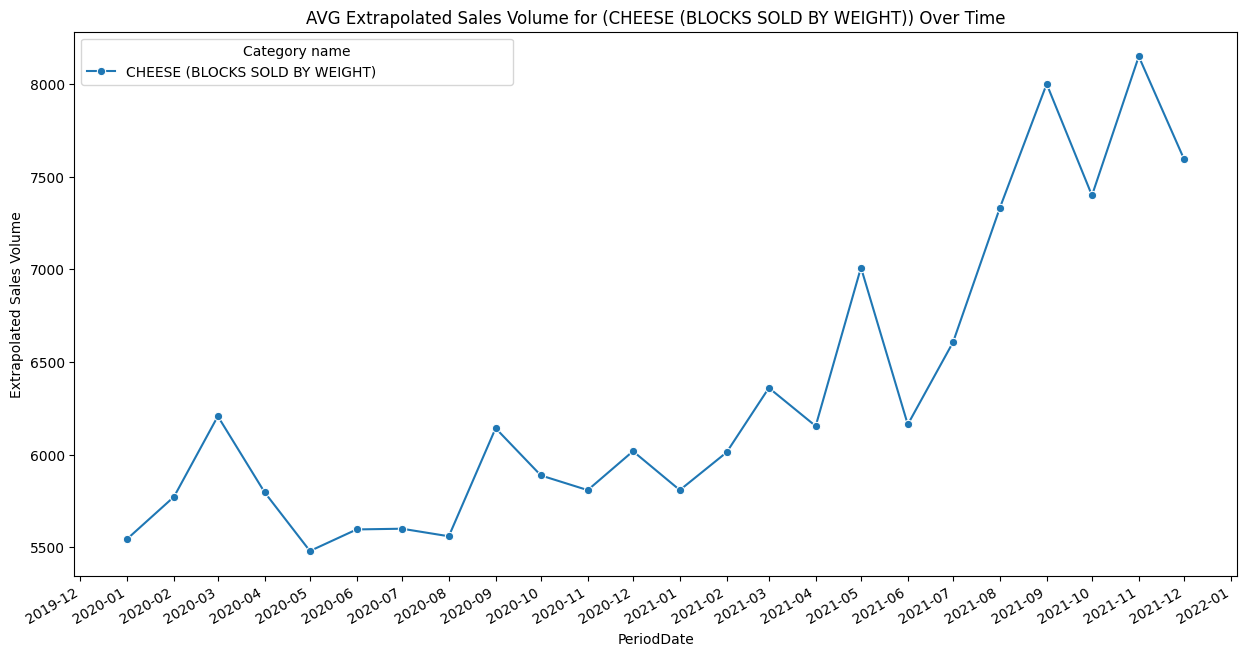

In [42]:
category_name = 'CHEESE (BLOCKS SOLD BY WEIGHT)'
filtered_data = data[data['Category name'].str.strip() == category_name]

plt.figure(figsize=(15, 8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=filtered_data, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
plt.title(f'AVG Extrapolated Sales Volume for ({category_name}) Over Time')
plt.xlabel('PeriodDate')
plt.ylabel('Extrapolated Sales Volume')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.show()

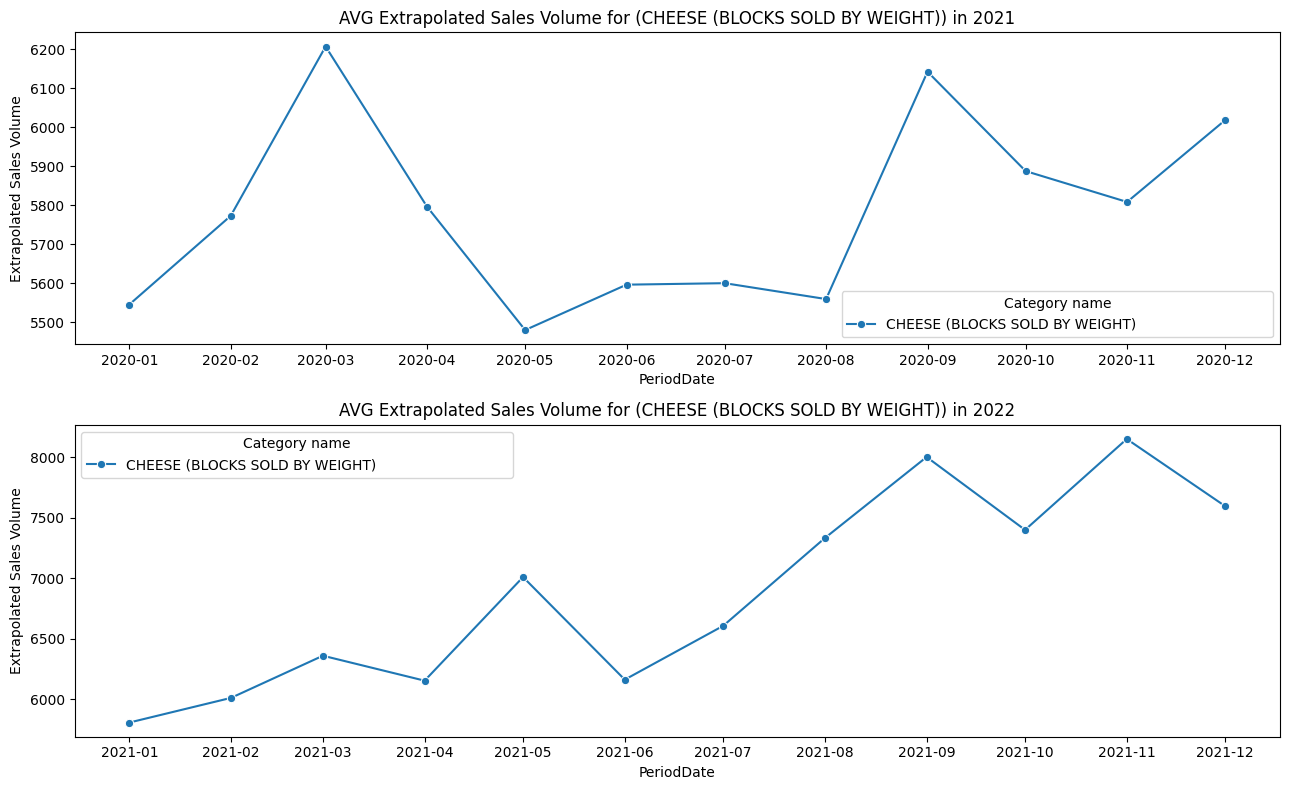

In [43]:
category_name = 'CHEESE (BLOCKS SOLD BY WEIGHT)'

filtered_data = data[data['Category name'].str.strip() == category_name]
filtered_data_1 = filtered_data[pd.to_datetime(filtered_data['PeriodDate']) < filter_date]
filtered_data_2 = filtered_data[pd.to_datetime(filtered_data['PeriodDate']) >= filter_date]

fig, ax = plt.subplots(2,1, figsize=(13, 8))

sns.lineplot(ax=ax[0] ,x='PeriodDate', y='Extrapolated Sales Volume', data=filtered_data_1, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
ax[0].set_title(f'AVG Extrapolated Sales Volume for ({category_name}) in 2021')
ax[0].set_xlabel('PeriodDate')
ax[0].set_ylabel('Extrapolated Sales Volume')

sns.lineplot(ax=ax[1], x='PeriodDate', y='Extrapolated Sales Volume', data=filtered_data_2, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
ax[1].set_title(f'AVG Extrapolated Sales Volume for ({category_name}) in 2022')
ax[1].set_xlabel('PeriodDate')
ax[1].set_ylabel('Extrapolated Sales Volume')

ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()
plt.show()


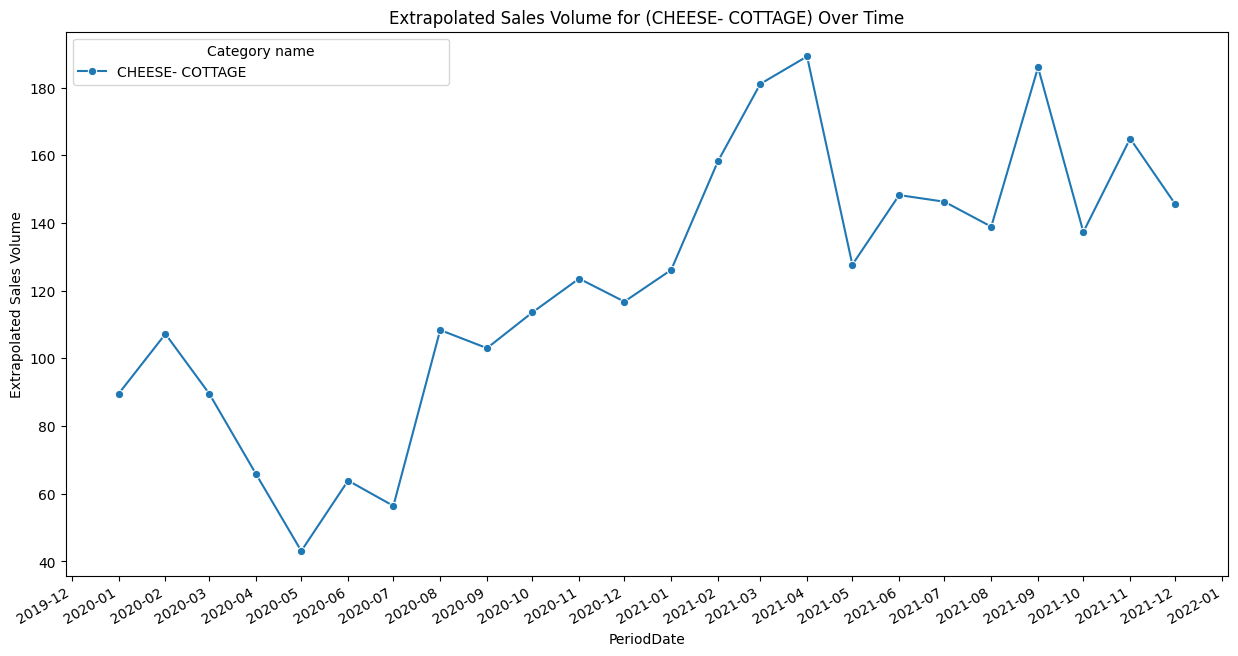

In [44]:
category_name = 'CHEESE- COTTAGE'
filtered_data = data[data['Category name'].str.strip() == category_name]

plt.figure(figsize=(15, 8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=filtered_data, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
plt.title(f'Extrapolated Sales Volume for ({category_name}) Over Time')
plt.xlabel('PeriodDate')
plt.ylabel('Extrapolated Sales Volume')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.show()


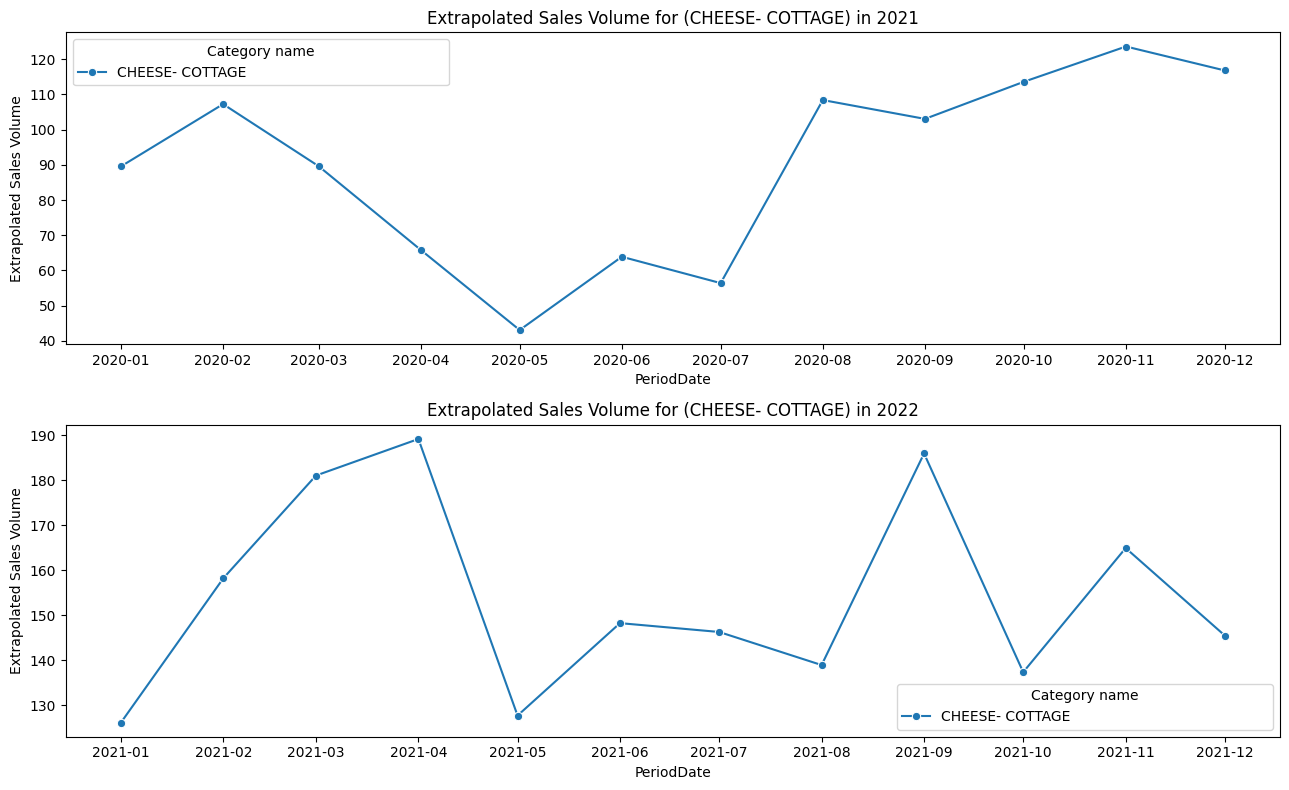

In [45]:
category_name = 'CHEESE- COTTAGE'

filtered_data = data[data['Category name'].str.strip() == category_name]
filtered_data_1 = filtered_data[pd.to_datetime(filtered_data['PeriodDate']) < filter_date]
filtered_data_2 = filtered_data[pd.to_datetime(filtered_data['PeriodDate']) >= filter_date]

fig, ax = plt.subplots(2,1, figsize=(13, 8))

sns.lineplot(ax=ax[0] ,x='PeriodDate', y='Extrapolated Sales Volume', data=filtered_data_1, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
ax[0].set_title(f'Extrapolated Sales Volume for ({category_name}) in 2021')
ax[0].set_xlabel('PeriodDate')
ax[0].set_ylabel('Extrapolated Sales Volume')

sns.lineplot(ax=ax[1], x='PeriodDate', y='Extrapolated Sales Volume', data=filtered_data_2, hue='Category name', ci=None, style="Category name", markers=True, dashes=False)
ax[1].set_title(f'Extrapolated Sales Volume for ({category_name}) in 2022')
ax[1].set_xlabel('PeriodDate')
ax[1].set_ylabel('Extrapolated Sales Volume')

ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()
plt.show()


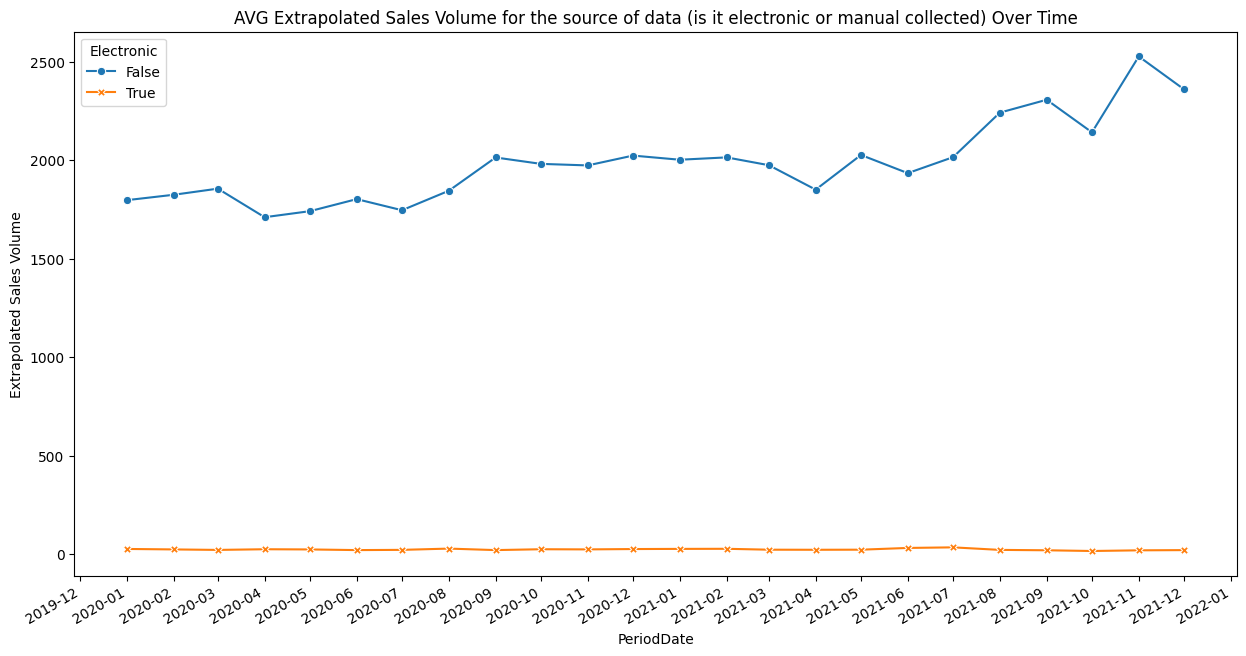

In [46]:
# Electronic	Identifies the source of data. TRUE = electronic data received from retailer. FALSE = manual collected data by Nielsen Field team
plt.figure(figsize=(15,8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=data, hue='Electronic', ci=None, style='Electronic', markers=True, dashes=False)
plt.title('AVG Extrapolated Sales Volume for the source of data (is it electronic or manual collected) Over Time')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.show()

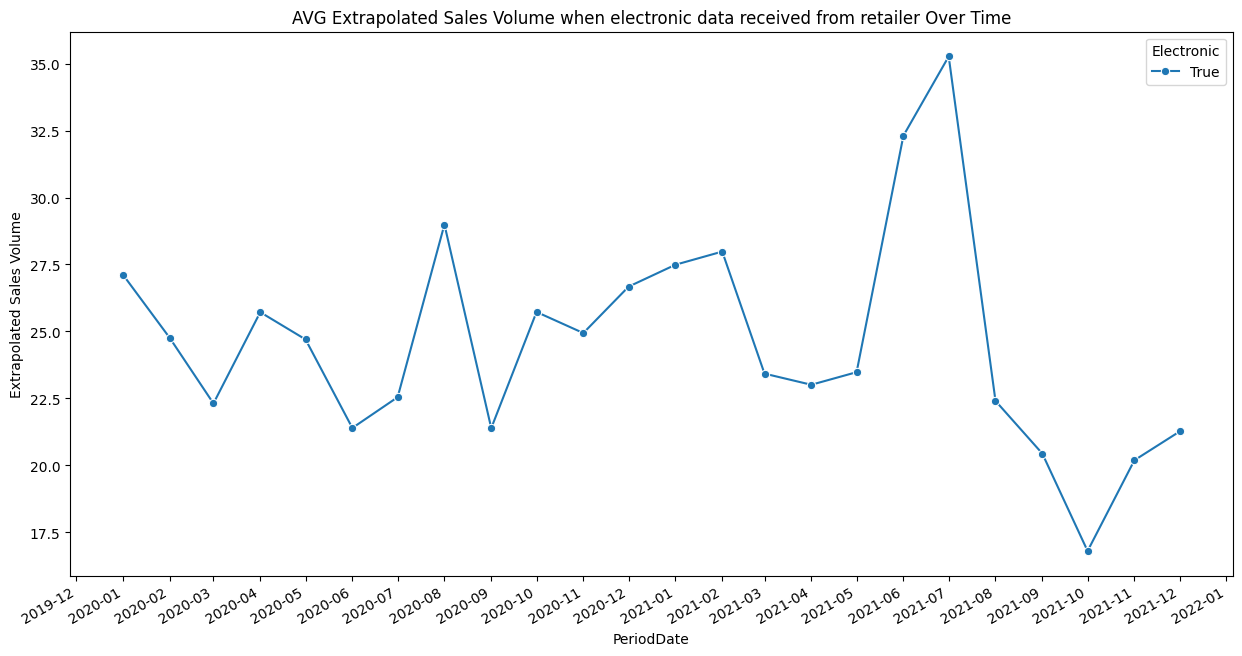

In [47]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=data[data['Electronic'] == True], hue='Electronic', ci=None, style='Electronic', markers=True)
plt.title('AVG Extrapolated Sales Volume when electronic data received from retailer Over Time')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.show()

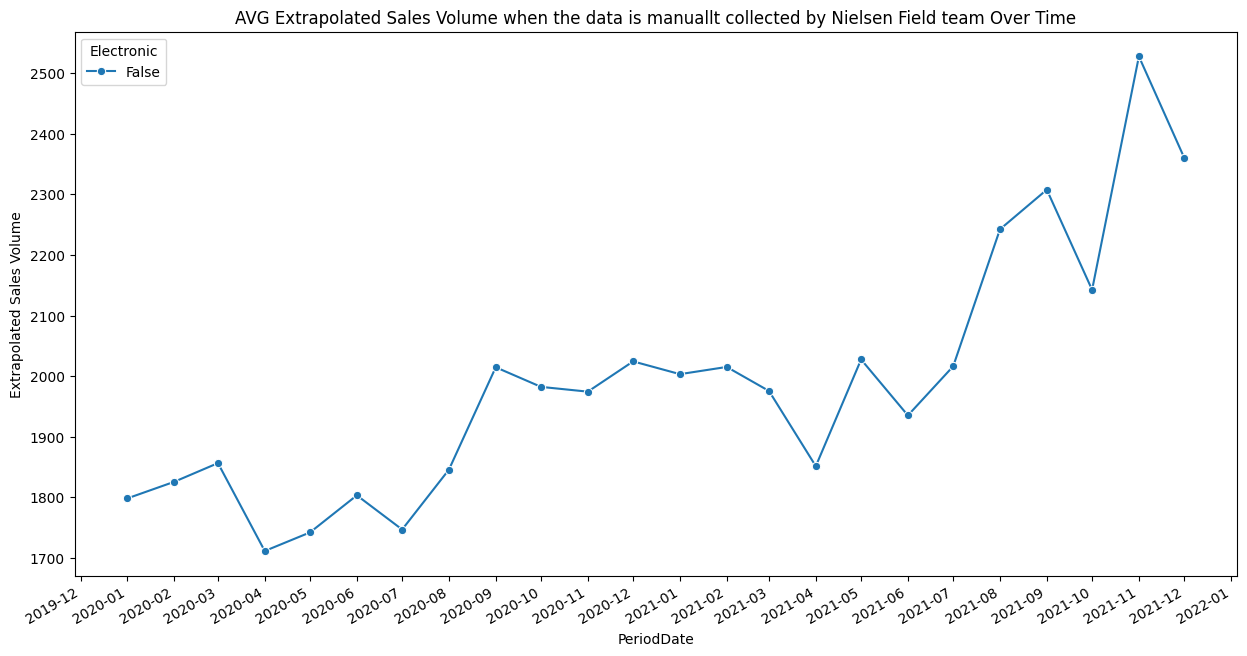

In [48]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=data[data['Electronic'] == False], hue='Electronic', ci=None, style='Electronic', markers=True)
plt.title('AVG Extrapolated Sales Volume when the data is manuallt collected by Nielsen Field team Over Time')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.show()

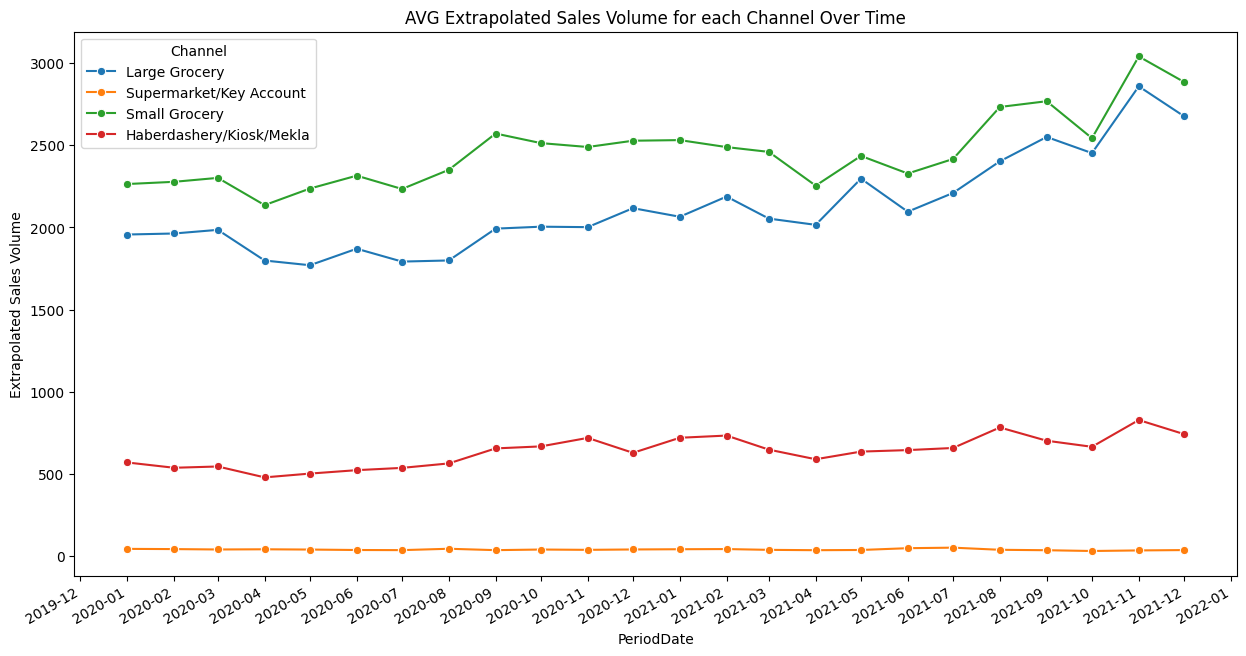

In [49]:
channels = data['Channel'].unique()
markers_dict = {channel: 'o' for channel in channels}

plt.figure(figsize=(15,8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=data, hue='Channel', ci=None, style='Channel', markers=markers_dict, dashes=False)
plt.title('AVG Extrapolated Sales Volume for each Channel Over Time')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.show()

## Regional Sales Comparison: Compare sales volumes and Extrapolated Sales Volume across different Regions to understand regional performance.

In [50]:
data['Region'].unique()

array(['UPPER EGYPT ', 'ALEXANDRIA', 'CAIRO ', 'DELTA ', 'CANAL ZONE '],
      dtype=object)

In [51]:
data['Region'].value_counts()

Region
CAIRO           495169
DELTA           185319
ALEXANDRIA      160828
UPPER EGYPT     116223
CANAL ZONE       25634
Name: count, dtype: int64

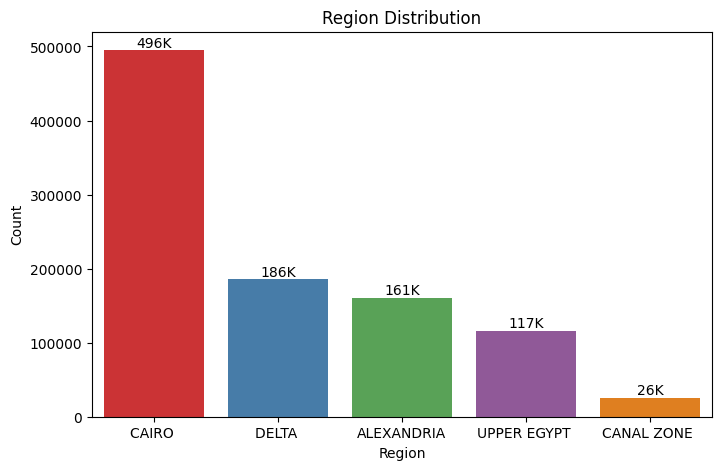

In [52]:
region_counts = data['Region'].value_counts()
sorted_regions = region_counts.index

plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Region', palette = "Set1", order=sorted_regions)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')

for i, count in enumerate(region_counts):
    plt.text(i, count, f'{ceil(count/1000)}K', ha='center', va='bottom')

plt.show()

### 1. Extrapolated Sales Volume
Extrapolated sales volume gives a broader picture of what total sales would look like if you consider all similar stores, not just the ones in your dataset. It allows you to make decisions based on the estimated total market size.


In [53]:
data.groupby('Region')['Extrapolated Sales Volume'].sum().sort_values()

Region
CANAL ZONE      8.950260e+06
ALEXANDRIA      3.159240e+07
CAIRO           1.214433e+08
UPPER EGYPT     1.220755e+08
DELTA           1.232922e+08
Name: Extrapolated Sales Volume, dtype: float64

In [54]:
data.groupby('Region')['Extrapolated Sales Volume'].mean().sort_values()

Region
ALEXANDRIA       196.435958
CAIRO            245.256226
CANAL ZONE       349.155824
DELTA            665.297326
UPPER EGYPT     1050.355439
Name: Extrapolated Sales Volume, dtype: float64

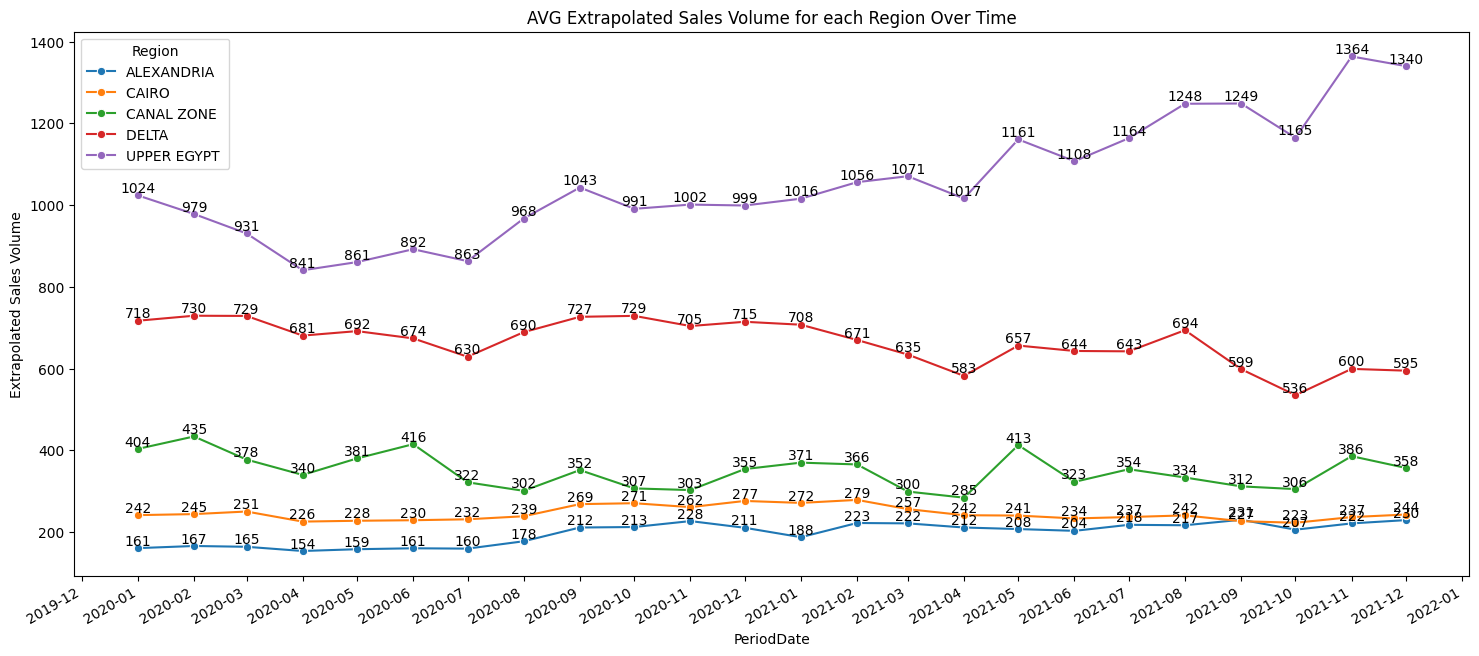

In [55]:
Regions = data['Region'].unique()
markers_dict = {Region: 'o' for Region in Regions}

data_avg = data.groupby(['PeriodDate', 'Region'], as_index=False)['Extrapolated Sales Volume'].mean()
# data_avg['Extrapolated Sales Volume'] = data_avg['Extrapolated Sales Volume'] / 1000

plt.figure(figsize=(18,8))
ax =sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=data_avg, hue='Region', ci=None, style='Region', markers=markers_dict, dashes=False)
plt.title('AVG Extrapolated Sales Volume for each Region Over Time')

for x, y, label in zip(data_avg['PeriodDate'], data_avg['Extrapolated Sales Volume'], data_avg['Region']):
    plt.text(x, y, ceil(y), ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.show()

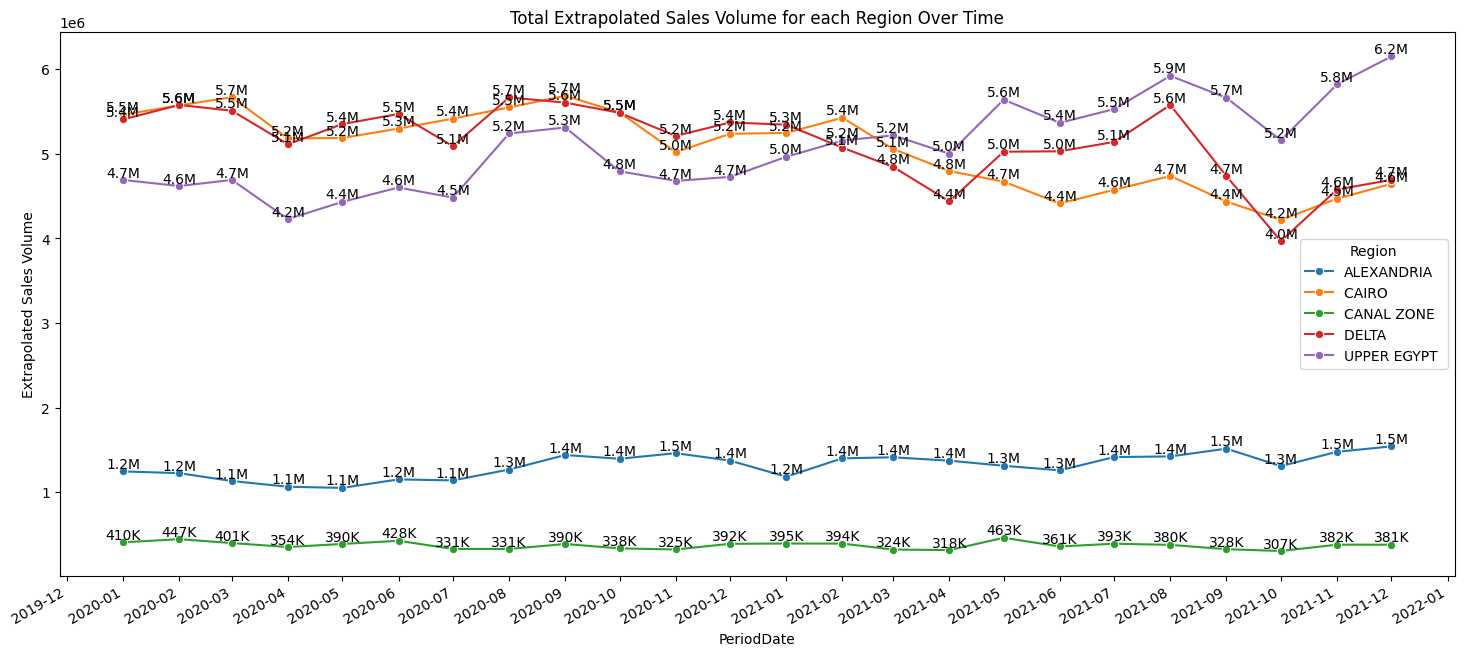

In [56]:
aggregated_data = data.groupby(['PeriodDate', 'Region'], as_index=False)['Extrapolated Sales Volume'].sum()
# aggregated_data['Extrapolated Sales Volume'] = aggregated_data['Extrapolated Sales Volume'] / 1000

Regions = aggregated_data['Region'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(18,8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=aggregated_data, hue='Region', ci=None, style='Region', markers=markers_dict, dashes=False)
plt.title('Total Extrapolated Sales Volume for each Region Over Time')

for x, y, label in zip(aggregated_data['PeriodDate'], aggregated_data['Extrapolated Sales Volume'], aggregated_data['Region']):
    if y > 1e6:
      plt.text(x, y, f'{round(y/1e6,1)}M', ha='center', va='bottom')
    else:
      plt.text(x, y, f'{ceil(y/1000)}K', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.show()

* The Total Extrapolated Sales Volume for UPPER EGYPT showed a significant upward trend starting in July 2020.
* By the first quarter of 2021, UPPER EGYPT had surpassed both CAIRO and DELTA in terms of total sales volume, making it one of the highest-performing regions.
* This suggests that UPPER EGYPT experienced rapid growth during this period, potentially due to shifts in demand, market expansion, or successful strategic initiatives in the region.

* UPPER EGYPT is highly efficient in terms of sales performance, with relatively fewer records but a high average sales volume. This indicates a high transaction value per sale, making it a critical region for high-margin products or premium offerings.

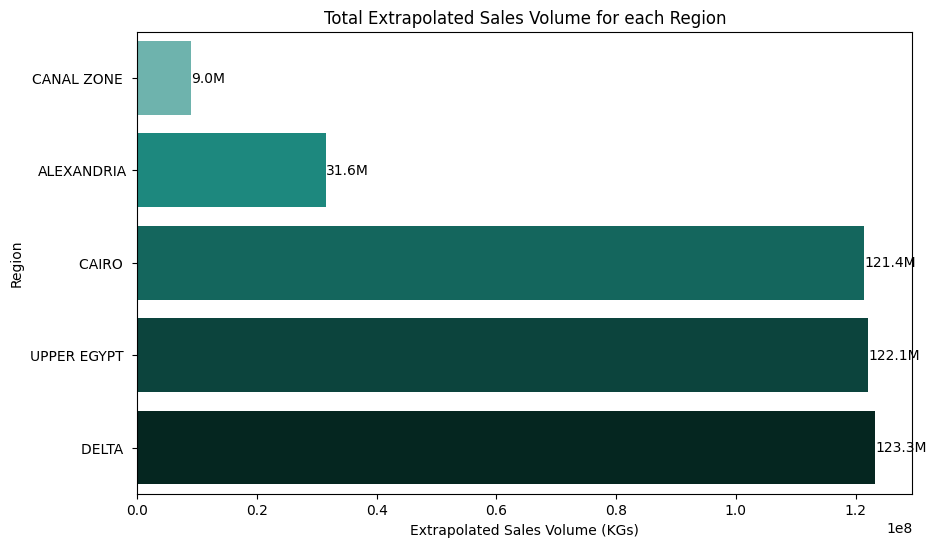

In [57]:
colors = ["#62BEB6", "#0B9A8D", "#077368", "#034D44", "#002B24"]
agg_data = data.groupby('Region')['Extrapolated Sales Volume'].sum().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=agg_data.values, y=agg_data.index, palette=colors)
plt.title('Total Extrapolated Sales Volume for each Region')

for i, v in enumerate(agg_data):
    plt.text(v, i, f'{round(v/1e6,1)}M', ha='left', va='center')

plt.xlabel('Extrapolated Sales Volume (KGs)')
plt.ylabel('Region')

plt.show()

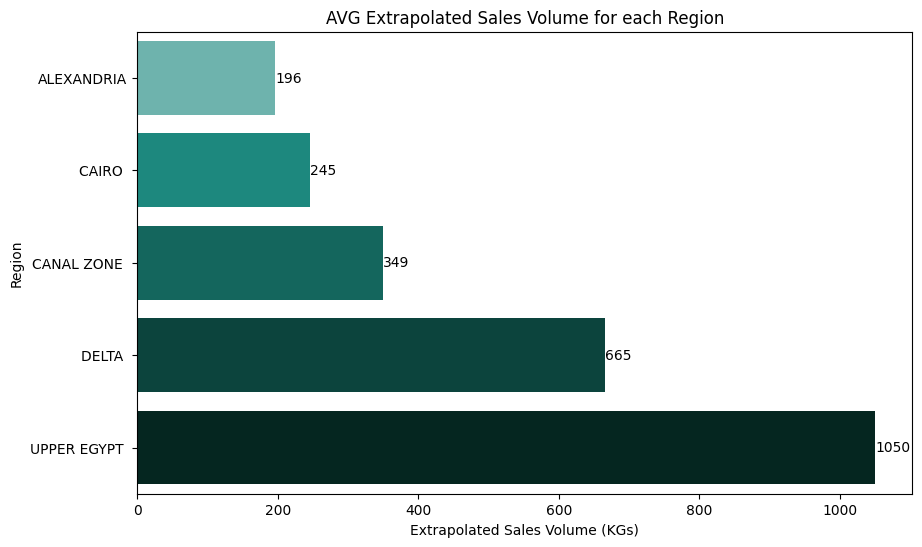

In [58]:
agg_data = data.groupby('Region')['Extrapolated Sales Volume'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=agg_data.values, y=agg_data.index, palette=colors)
plt.title('AVG Extrapolated Sales Volume for each Region')

for i, v in enumerate(agg_data):
    plt.text(v, i, round(v), ha='left', va='center')


plt.xlabel('Extrapolated Sales Volume (KGs)')
plt.ylabel('Region')

plt.show()

## Conclusion
1. High Total Sales Regions: **DELTA**, **UPPER EGYPT**, and **CAIRO** have the highest total sales volumes. This suggests they are strong markets with substantial revenue generation.  

2. Despite having a lower total number of records for **UPPER EGYPT** in the data, it rivals **DELTA** and **CAIRO** in total sales. This indicates that **UPPER EGYPT** is a strong performer in terms of sales, suggesting that it may have high sales efficiency or a significant market impact despite a smaller presence in the dataset.

3. High Average Sales Volume Regions: **UPPER EGYPT** has the highest average sales volume per transaction, indicating that each transaction is relatively large compared to other regions.

4. Low Total Sales Regions: **CANAL ZONE** has the lowest total sales volume, indicating that it is the smallest market in terms of overall revenue. It also has a relatively low average sales volume compared to other regions, suggesting that both transaction size and total sales are lower in this region. and this because of its records in the data!


## Decision Making
*	DELTA, UPPER EGYPT and CAIRO should be prioritized for further investments and resource allocation due to their high total sales volumes. Since UPPER EGYPT also has the highest average sales volume, it could be worth exploring additional premium products or services in this region.
*	For region like ALEXANDRIA where total sales is moderate, consider strategies to increase the average transaction size. This might include targeted promotions, bundling products, or upselling higher-value items to boost the average sales per transaction.
*	CANAL ZONE should be analyzed to understand the reasons behind its low total sales and average sales volume. Possible actions include:
  1.	Reevaluating Product Offerings: Consider whether the products or services offered in CANAL ZONE meet local demand and preferences.
  2.	Enhanced Marketing: Implement targeted marketing campaigns to increase visibility and attract more customers.
  3.	Promotional Strategies: Offer special promotions or discounts to stimulate sales and increase the average transaction size.
*	UPPER EGYPT and DELTA: Given their high average sales volume, explore opportunities to introduce premium products or adjust pricing strategies to further maximize revenue.
*	Other Regions: Implement promotional pricing or bundle offers to boost average sales per transaction, particularly in regions with high total sales but lower average transaction values.


### 2. Raw Sales Volume

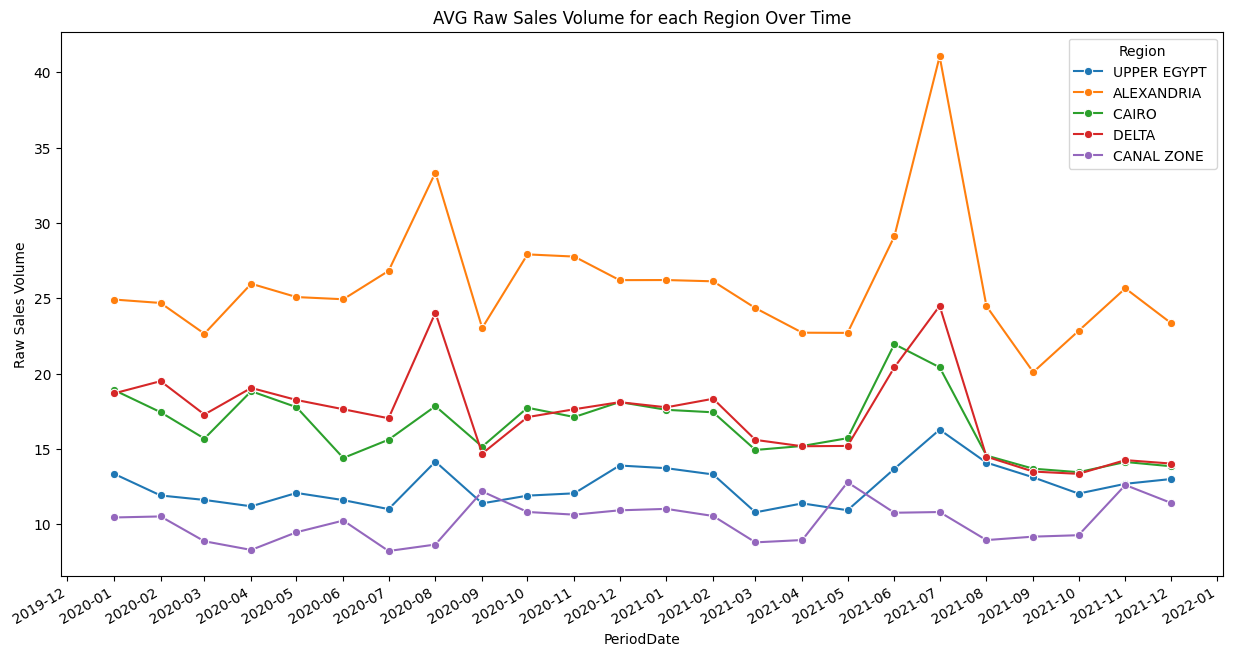

In [59]:
Regions = data['Region'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(15,8))
ax = sns.lineplot(x='PeriodDate', y='Raw Sales Volume', data=data, hue='Region', ci=None, style='Region', markers=markers_dict, dashes=False)
plt.title('AVG Raw Sales Volume for each Region Over Time')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()

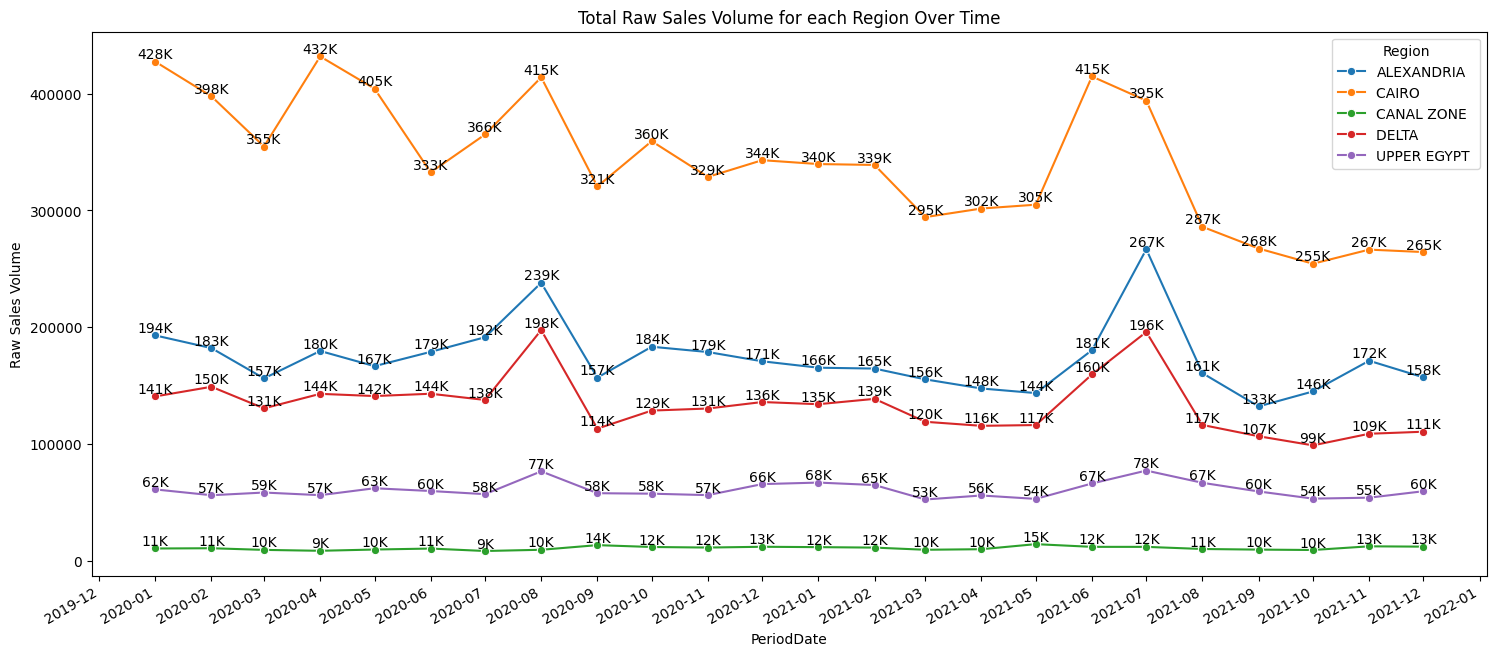

In [60]:
aggregated_data = data.groupby(['PeriodDate', 'Region'])['Raw Sales Volume'].sum().reset_index()


Regions = aggregated_data['Region'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(18,8))
ax = sns.lineplot(x='PeriodDate', y='Raw Sales Volume', data=aggregated_data, hue='Region', ci=None, style='Region', markers=markers_dict, dashes=False)
plt.title('Total Raw Sales Volume for each Region Over Time')

for x, y, label in zip(aggregated_data['PeriodDate'], aggregated_data['Raw Sales Volume'], aggregated_data['Region']):
    if y > 1e6:
      plt.text(x, y, f'{round(y/1e6,1)}M', ha='center', va='bottom')
    else:
      plt.text(x, y, f'{ceil(y/1000)}K', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()

In [61]:
data.groupby('Region')['Raw Sales Volume'].sum().sort_values()

Region
CANAL ZONE      2.608967e+05
UPPER EGYPT     1.455635e+06
DELTA           3.212155e+06
ALEXANDRIA      4.166585e+06
CAIRO           8.207066e+06
Name: Raw Sales Volume, dtype: float64

In [62]:
data.groupby('Region')['Raw Sales Volume'].mean().sort_values()

Region
CANAL ZONE      10.177761
UPPER EGYPT     12.524497
CAIRO           16.574272
DELTA           17.333114
ALEXANDRIA      25.907084
Name: Raw Sales Volume, dtype: float64

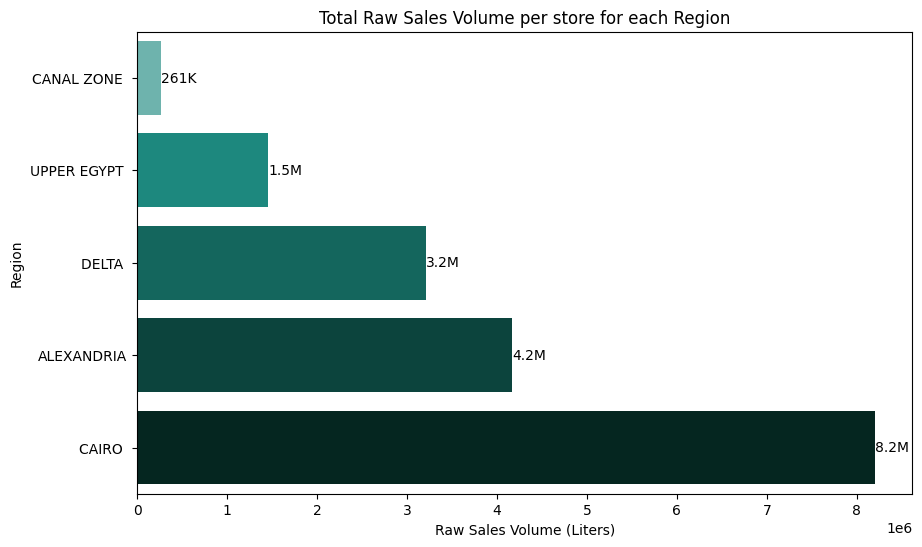

In [63]:
agg_data = data.groupby('Region')['Raw Sales Volume'].sum().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=agg_data.values, y=agg_data.index, palette=colors)
plt.title('Total Raw Sales Volume per store for each Region')

for i, v in enumerate(agg_data):
    if v < 1e6:
      plt.text(v, i, f'{ceil(v/1000)}K', ha='left', va='center')
    else:
      plt.text(v, i, f'{round(v/1e6,1)}M', ha='left', va='center')

plt.xlabel('Raw Sales Volume (Liters)')
plt.ylabel('Region')

plt.show()

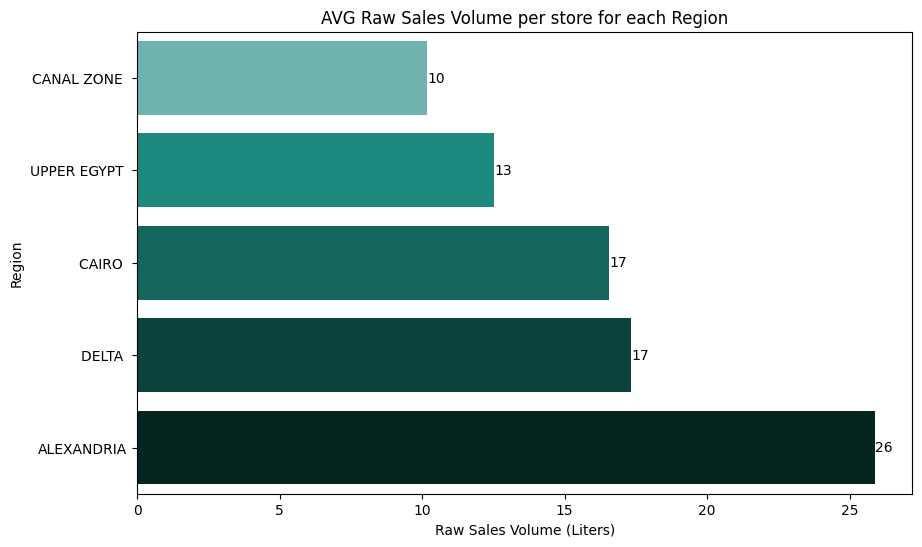

In [64]:
agg_data = data.groupby('Region')['Raw Sales Volume'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=agg_data.values, y=agg_data.index, palette=colors)
plt.title('AVG Raw Sales Volume per store for each Region')

for i, v in enumerate(agg_data):
    plt.text(v, i, round(v), ha='left', va='center')

plt.xlabel('Raw Sales Volume (Liters)')
plt.ylabel('Region')

plt.show()

## Conclusion

1. Total Raw Sales Volume is greatly influenced by the number of records from each region in the dataset. So we can see:
  1.   **CAIRO** leads in raw sales volume with approximately 8.21 million kilograms, which indicates high actual sales in stores before any extrapolation.
  3.   **ALEXANDRIA** follows with 4.17 million kilograms, showing strong sales performance in this region as well.
  7. **CANAL ZONE** has the lowest total sales and lowest average per store. This region may need strategic adjustments to boost performance.
  8. **UPPER EGYPT** and **CANAL** have moderate total sales.

2. **CAIRO** has the highest total sales but its mean sales per store is moderate compared to **ALEXANDRIA** and **DELTA**. This suggests that while CAIRO has a large volume of sales overall, the performance per store is not as high as in other regions, likely because of a higher number of stores with smaller individual sales.

4. **ALEXANDRIA** has the highest mean sales per store at 25.91 KGs per store, meaning each store in this region, on average, sells more product compared to other regions.

5. **UPPER EGYPT** and **CANAL ZONE** have lower mean sales per store at 12.52 KGs and 10.18 KGs respectively.

6. **ALEXANDRIA** stands out with the highest average sales per store (25.91 KGs), indicating that stores in this region tend to have strong individual performance. Despite having a lower total than **CAIRO**, **ALEXANDRIA’s** stores are the most productive on a per-store basis.

8. **UPPER EGYPT** has moderate total sales but a relatively low average per store. It’s showing potential for growth if stores can increase their individual sales.


## Desicion Making

* Focus on optimizing store operations in **Cairo** by identifying underperforming stores and providing targeted support. This could involve training staff, optimizing product offerings, or improving marketing efforts in low-performing areas to raise the average sales per store.

* Invest more in **Alexandria** by expanding the number of stores or increasing stock and product variety to maximize the efficiency of existing stores

* Investigate the causes of lower sales per store in **Upper Egypt**. This might involve adjusting the product mix, improving supply chain efficiency, or boosting marketing efforts tailored to local preferences

* For **Canal Zone**, Consider promotional campaigns or product diversification to stimulate sales. Alternatively, assess whether reducing the number of stores or refocusing resources on more profitable regions might be a viable strategy.



### 3. XFactors

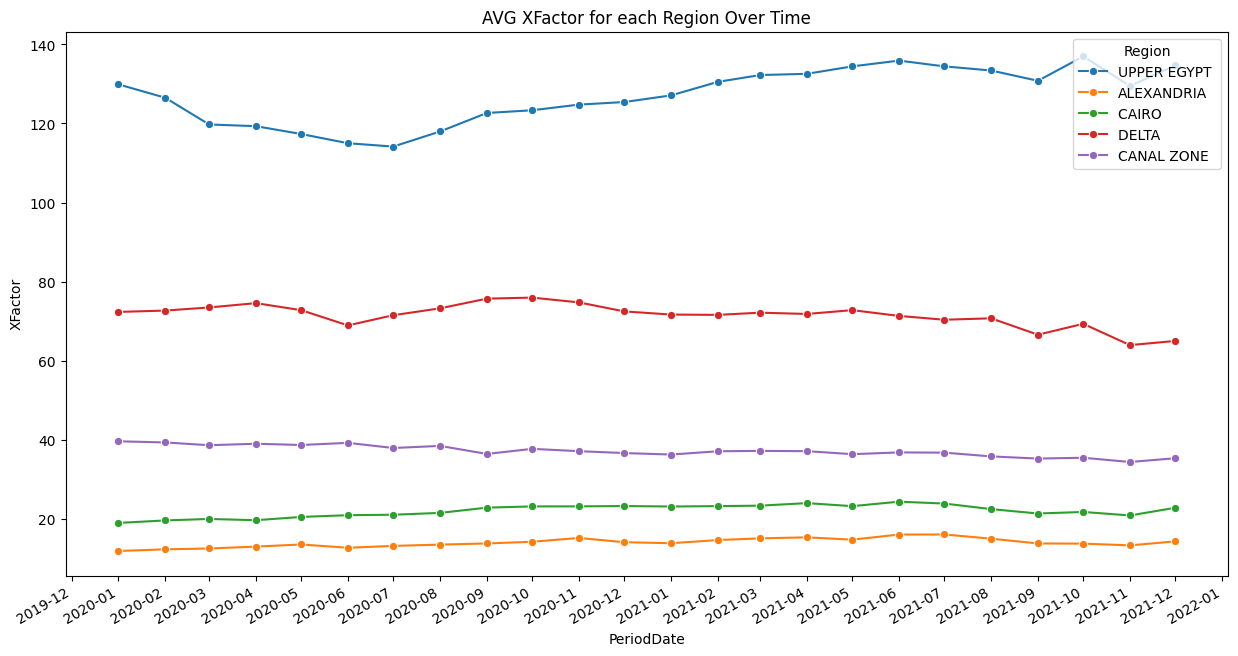

In [65]:
agg_data = data.groupby('Region')['XFactor'].sum().sort_values()

Regions = data['Region'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(15,8))
ax = sns.lineplot(x='PeriodDate', y='XFactor', data=data, hue='Region', ci=None, style='Region', markers=markers_dict, dashes=False)
plt.title('AVG XFactor for each Region Over Time')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()

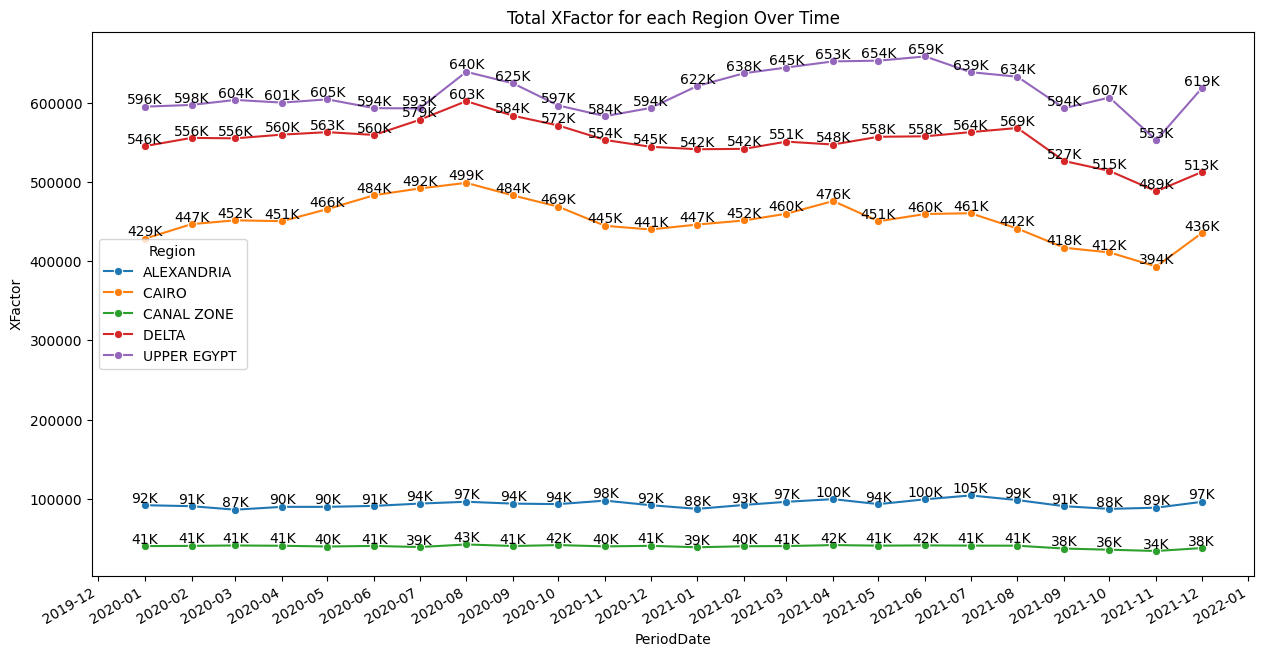

In [66]:
aggregated_data = data.groupby(['PeriodDate', 'Region'])['XFactor'].sum().reset_index()

Regions = aggregated_data['Region'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(15,8))
ax = sns.lineplot(x='PeriodDate', y='XFactor', data=aggregated_data, hue='Region', ci=None, style='Region', markers=markers_dict, dashes=False)
plt.title('Total XFactor for each Region Over Time')

for x, y, label in zip(aggregated_data['PeriodDate'], aggregated_data['XFactor'], aggregated_data['Region']):
      plt.text(x, y, f'{ceil(y/1000)}K', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()

In [67]:
data.groupby('Region')['XFactor'].mean()

Region
ALEXANDRIA       13.909396
CAIRO            21.922867
CANAL ZONE       37.161746
DELTA            71.448728
UPPER EGYPT     126.774343
Name: XFactor, dtype: float64

In [68]:
data.groupby('Region')['XFactor'].sum()

Region
ALEXANDRIA      2.237020e+06
CAIRO           1.085552e+07
CANAL ZONE      9.526042e+05
DELTA           1.324081e+07
UPPER EGYPT     1.473409e+07
Name: XFactor, dtype: float64

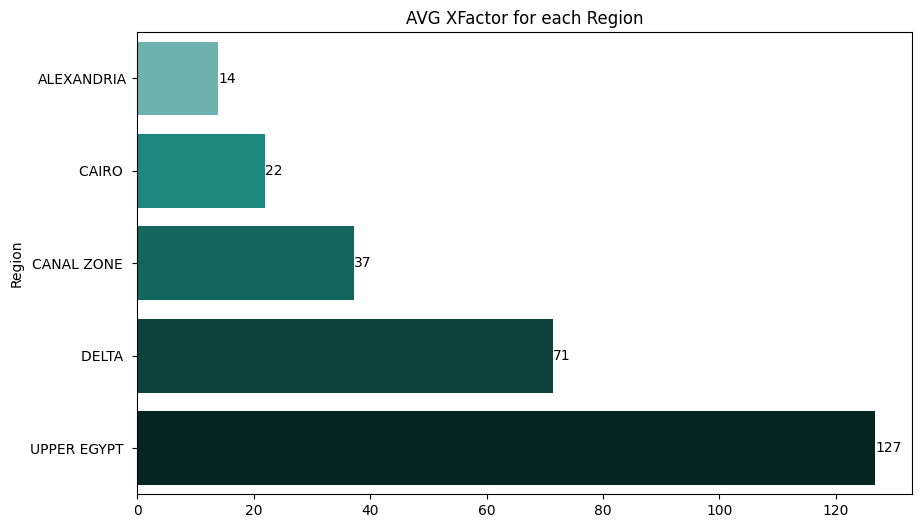

In [69]:
agg_data = data.groupby('Region')['XFactor'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=agg_data.values, y=agg_data.index, palette=colors)
plt.title('AVG XFactor for each Region')

for i, v in enumerate(agg_data):
    plt.text(v, i, round(v), ha='left', va='center')

plt.show()

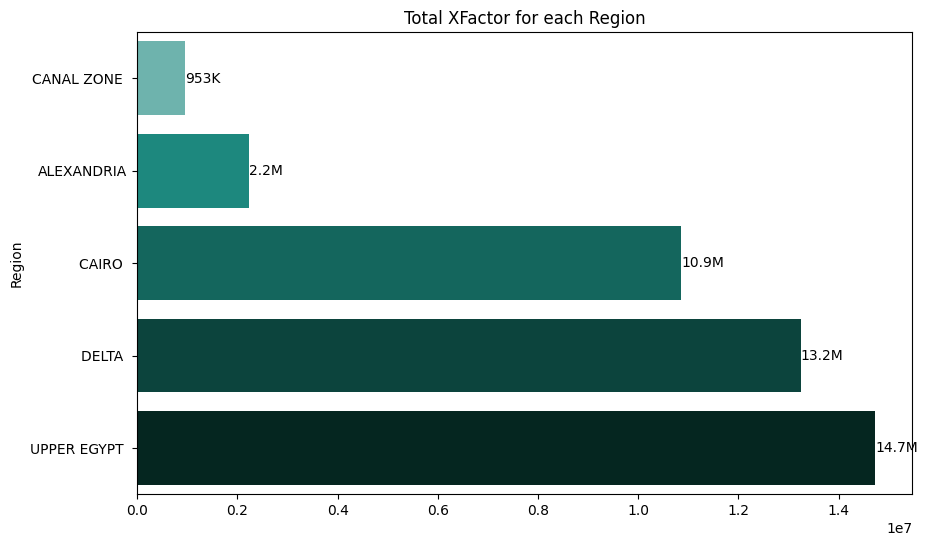

In [70]:
agg_data = data.groupby('Region')['XFactor'].sum().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=agg_data.values, y=agg_data.index, palette=colors)
plt.title('Total XFactor for each Region')

for i, v in enumerate(agg_data):
    if v < 1e6:
      plt.text(v, i, f'{ceil(v/1000)}K', ha='left', va='center')
    else:
      plt.text(v, i, f'{round(v/1e6,1)}M', ha='left', va='center')

plt.show()

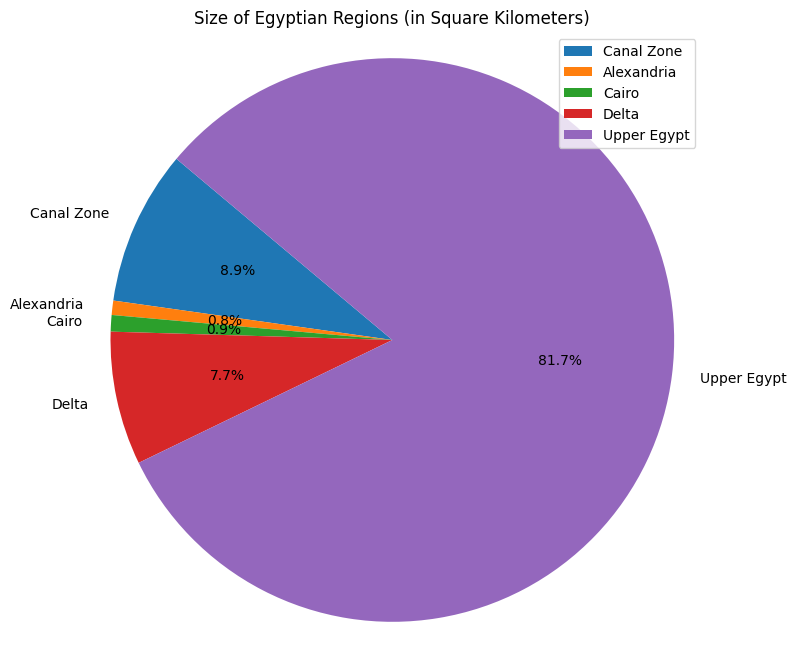

In [71]:
regions = ['Canal Zone', 'Alexandria', 'Cairo', 'Delta', 'Upper Egypt']
sizes = [29000, 2679, 3085, 25000, 267000]  # Sizes in square kilometers

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=regions, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Size of Egyptian Regions (in Square Kilometers)')
plt.legend(loc='upper right')

plt.show()

In [72]:
agg_data = data.groupby('Region')['XFactor'].mean().sort_values().reset_index()
agg_data['Size'] = sizes
agg_data

Region     XFactor    Size
0    ALEXANDRIA   13.909396   29000
1        CAIRO    21.922867    2679
2   CANAL ZONE    37.161746    3085
3        DELTA    71.448728   25000
4  UPPER EGYPT   126.774343  267000

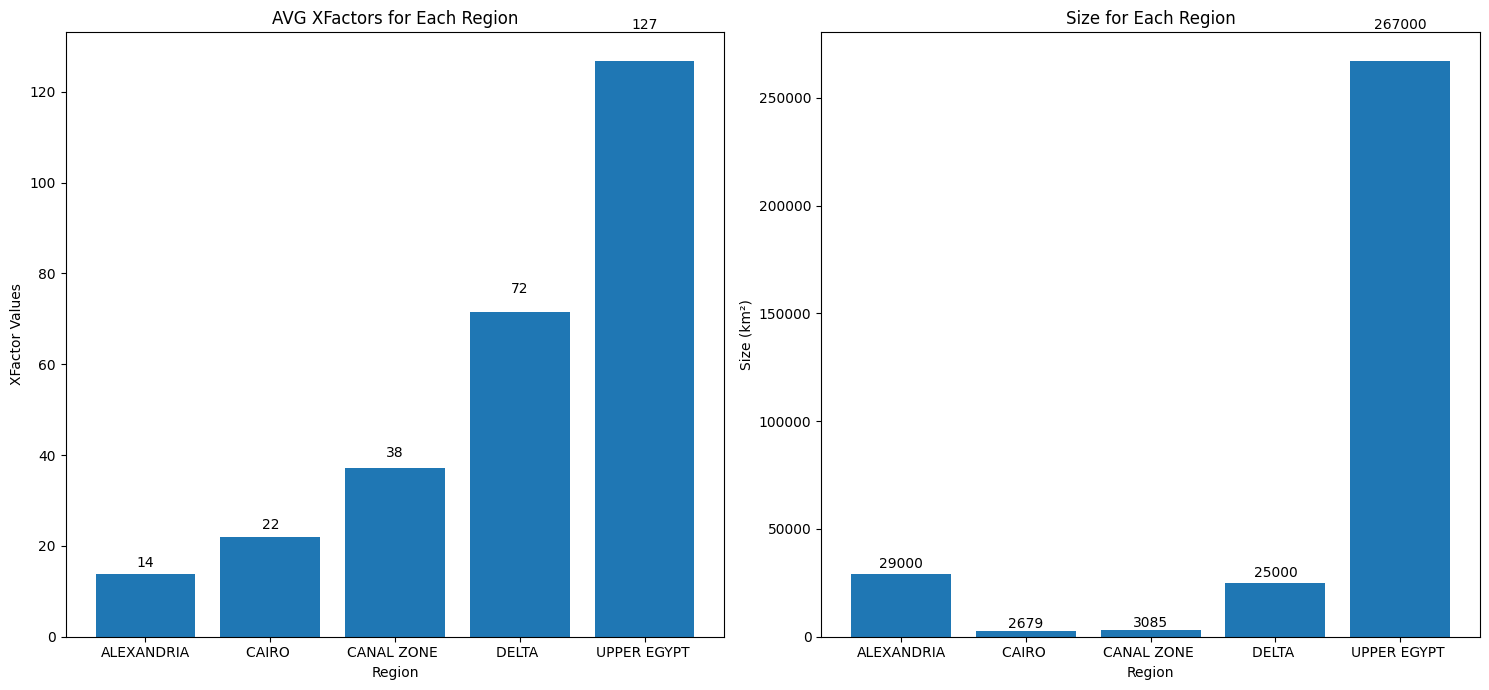

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

bar_positions = np.arange(len(agg_data['Region']))

axes[0].bar(bar_positions, agg_data['XFactor'])
axes[0].set_xticks(bar_positions)
axes[0].set_xticklabels(agg_data['Region'])
axes[0].set_title('AVG XFactors for Each Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('XFactor Values')

for i, v in enumerate(agg_data['XFactor']):
    axes[0].text(i, v + 0.05 * v, f'{ceil(v)}', ha='center', va='bottom', color='black')


axes[1].bar(bar_positions, agg_data['Size'])
axes[1].set_xticks(bar_positions)
axes[1].set_xticklabels(agg_data['Region'])
axes[1].set_title('Size for Each Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Size (km²)')

for i, v in enumerate(agg_data['Size']):
    axes[1].text(i, v + 0.05 * v, str(round(v, 2)), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

## Conclusion

*   **UPPER EGYPT** has the highest average XFactors over the two years, which is fitting considering its size. This contributes to its total and average sales, resulting in the highest sales figures over the two years.

* **ALEXANDRIA** is the second-largest region in terms of size but has the lowest number of XFactors. Despite this, it boasts the highest average sales per store at 25.91 KGs, indicating that each store in this region sells more products on average compared to stores in other regions. So we can:
    1. Open more stores in high-demand areas to increase overall sales volume while maintaining the high average sales per store.
    2. Investigate the product offerings in **ALEXANDRIA** to identify which products contribute to higher sales per store. Optimizing the product mix based on customer preferences could enhance sales further.
    3. The high average sales per store in **ALEXANDRIA** could provide insights into effective sales strategies and customer engagement practices that can be replicated in other regions, particularly those with lower average sales per store.
    4. While **ALEXANDRIA** has a low number of XFactors, efforts can be made to enhance them. This may include improving operational efficiencies, staff training, or enhancing the overall customer experience to drive sales.

* Compared to the size of **DELTA** and the number of XFactors, the number of stores is well-suited to its size, and both the average and total sales over the two years are strong.

* About **CANAL ZONE**, having 37 stores in 3085 km² can be considered a small number in terms of store density. Density of 0.012 stores/km²: This is relatively low. It suggests that, on average, there is only about 1 store for every 83.3 km². So that:
    1. This low density might indicate limited access to retail services for the population within that area. If **CANAL ZONE** has a small population or a less urbanized environment, then the number of stores may not be sufficient to meet consumer needs effectively.
    2. **CANAL ZONE** covers an area of 3085 km², which is relatively small. This limited size may restrict market reach and the number of potential customers, resulting in fewer retail locations and a constrained customer base compared to larger regions.

* The total population of the **Canal Zone** cities is approximately 1.4 million people, spread over an area of 3,085 square kilometers. This results in a population density of about 454 people per square kilometer.
   1. This population density indicates a relatively moderate level of urbanization, especially when considering the area includes both urban and rural regions. With 37 stores in such a large area, it suggests that the distribution of retail services may not be optimal, potentially indicating a lack of sufficient retail infrastructure to meet the needs of the local population.
   2. Moreover, the moderate density could imply that while there is a significant population, there may be challenges in accessibility to stores and services, which could impact consumer behavior and local economic activities.

* To enhance sales in the **Canal Zone**, several strategies can be implemented based on the current analysis of the region's demographics and market conditions:
   * Increase Store Density: This would allow more residents to reach stores conveniently, potentially leading to higher foot traffic and sales. Establishing new stores in underserved areas could meet the demand better.
   * Targeted Marketing Campaigns: Implementing localized marketing strategies can attract more customers. Understanding the demographics and preferences of the **Canal Zone**'s population can help tailor promotions and advertising to resonate with the community.

* Based on the calculated store density of 0.0082 stores per km² (or 1 store for every 121.5 km²) in Cairo,The low store density suggests that **CAIRO** may have fewer retail outlets compared to the available space, indicating an opportunity for expansion. With a population of around 10.2 million, there may be demand for more stores.

* The average XFactor of 22 indicates that the existing stores can potentially cater to a larger market by reflecting their presence in the retail universe. This factor suggests a moderate level of market saturation compared to other regions.

* Despite leading in total raw sales volume (approximately 8.21 million kilograms), the average sales volume per store is only moderate. This discrepancy suggests that while there is high demand, individual store performance could be enhanced through:
   * Increase Store Presence: Consider opening more stores in high-density population areas to improve accessibility and convenience for customers. This could enhance overall sales volumes by reaching more customers.
   * Analyze the product offerings to ensure they meet local preferences and demands. Introducing region-specific products may increase sales in stores.
   * Implement marketing strategies aimed at increasing awareness and driving traffic to existing stores. Highlight promotions, local events, or special offers to attract more customers.

* Cairo's low store density presents a significant opportunity for growth and expansion. By strategically increasing the number of stores and enhancing marketing efforts, it is possible to capitalize on the existing demand and improve overall sales performance in the region.

## Evaluate sales performance by Channel to determine which channels are most effective for different product categories.

In [74]:
data['Channel'].unique()

array(['Large Grocery', 'Supermarket/Key Account', 'Small Grocery',
       'Haberdashery/Kiosk/Mekla'], dtype=object)

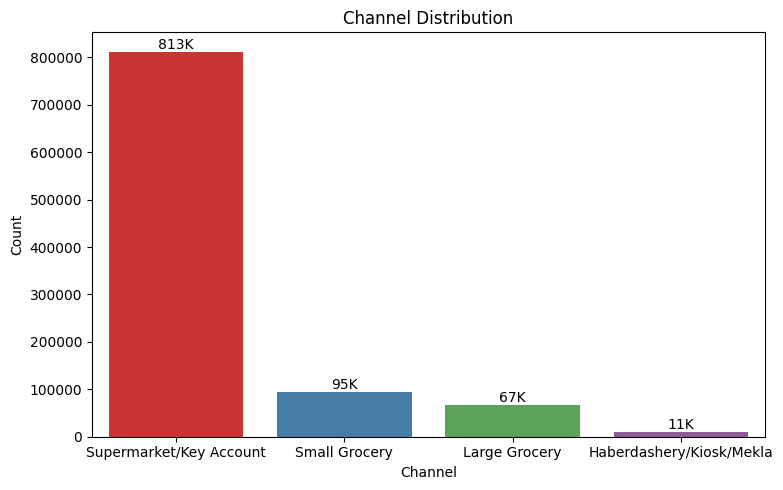

In [75]:
channel_counts = data['Channel'].value_counts()
sorted_channels = channel_counts.index

plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Channel', palette = "Set1", order=sorted_channels)
plt.title('Channel Distribution')
plt.xlabel('Channel')
plt.ylabel('Count')

for i, count in enumerate(channel_counts):
    plt.text(i, count, f'{ceil(count/1000)}K', ha='center', va='bottom')

plt.tight_layout()
plt.show()

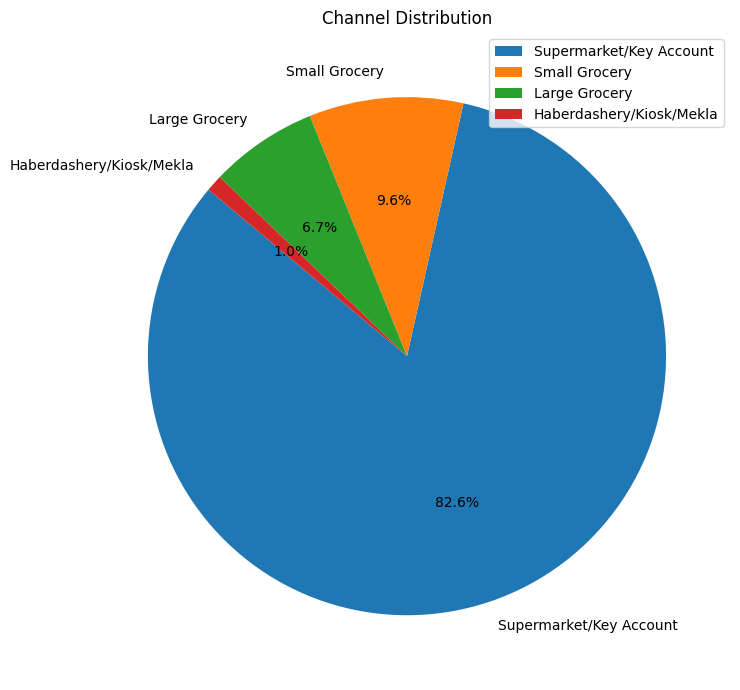

In [76]:
channel_counts = data['Channel'].value_counts()

plt.figure(figsize=(10,7))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Channel Distribution')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

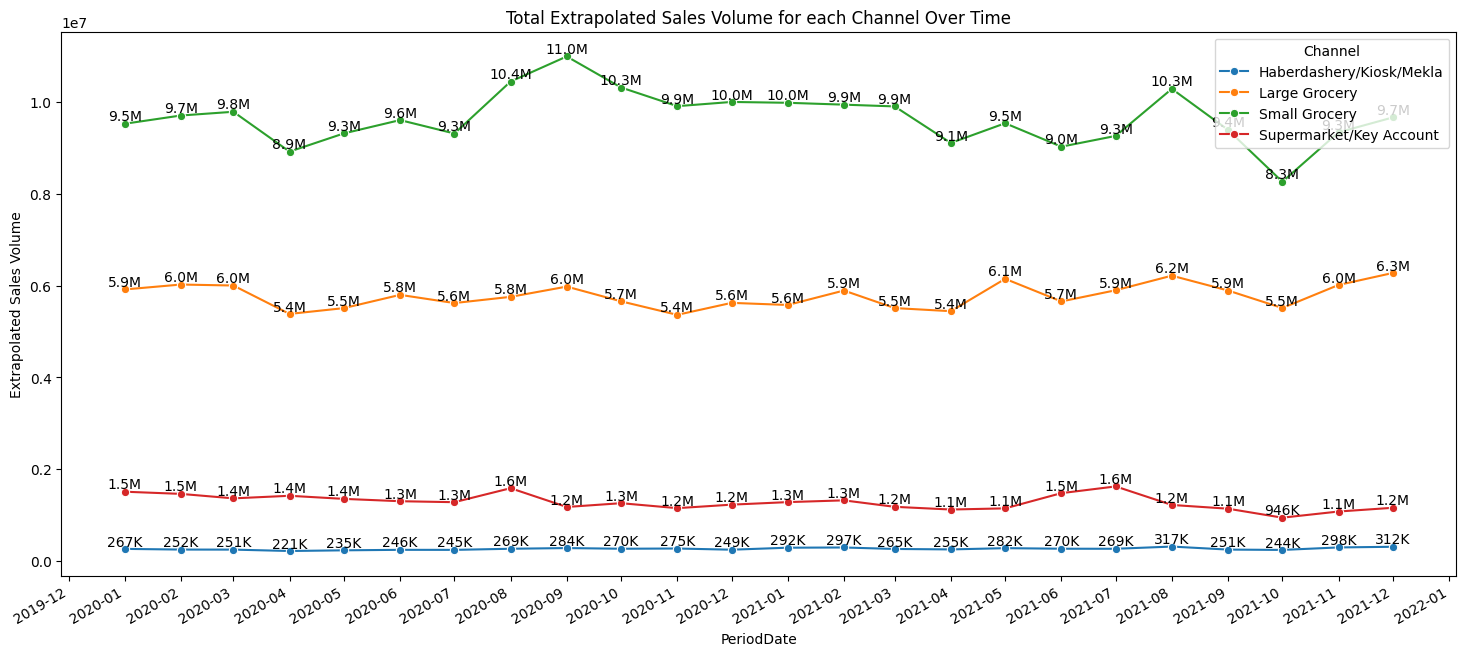

In [77]:
agg_data = data.groupby(['PeriodDate', 'Channel'])['Extrapolated Sales Volume'].sum().reset_index()

Regions = agg_data['Channel'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(18,8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=agg_data, hue='Channel', ci=None, style='Channel', dashes=None, markers=markers_dict)
plt.title('Total Extrapolated Sales Volume for each Channel Over Time')

for x, y, label in zip(agg_data['PeriodDate'], agg_data['Extrapolated Sales Volume'], agg_data['Channel']):
    if y > 1e6:
      plt.text(x, y, f'{round(y/1e6,1)}M', ha='center', va='bottom')
    else:
      plt.text(x, y, f'{ceil(y/1000)}K', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()

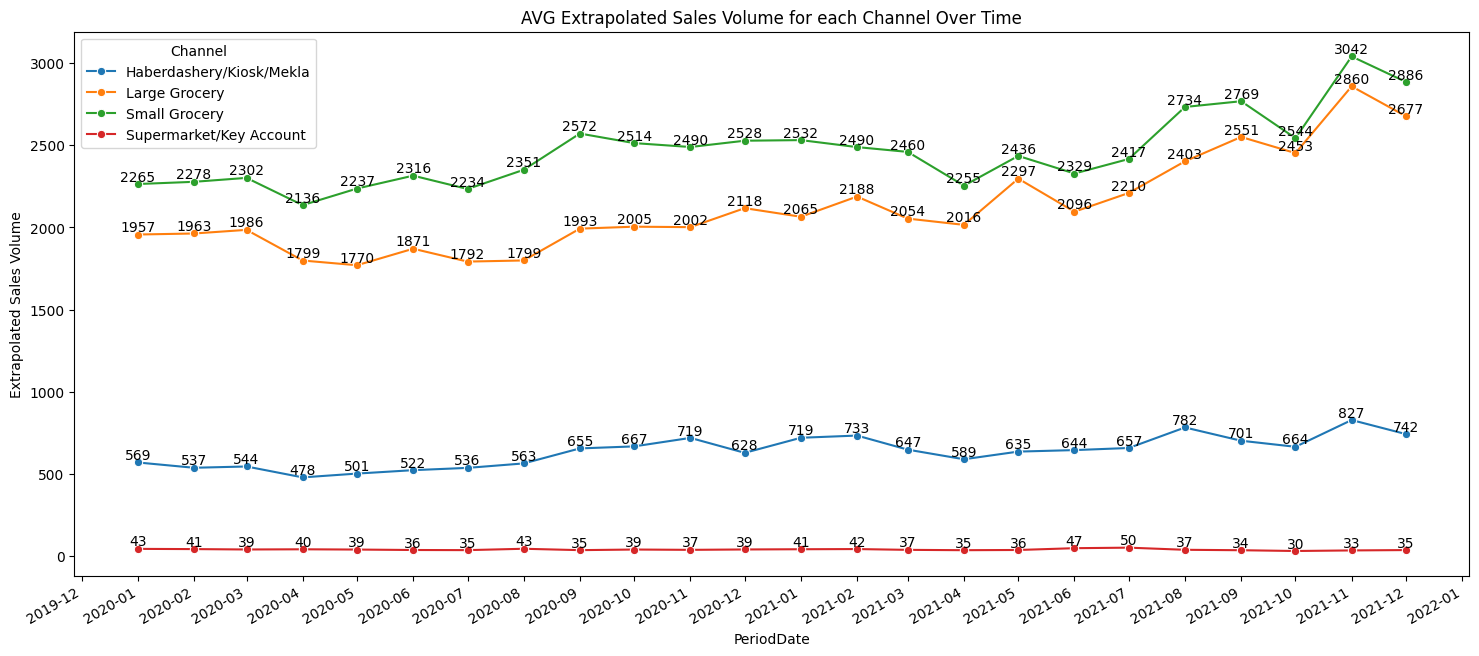

In [78]:
agg_data = data.groupby(['PeriodDate', 'Channel'])['Extrapolated Sales Volume'].mean().reset_index()

Regions = agg_data['Channel'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(18,8))
ax = sns.lineplot(x='PeriodDate', y='Extrapolated Sales Volume', data=agg_data, hue='Channel', ci=None, style='Channel', dashes=None, markers=markers_dict)
plt.title('AVG Extrapolated Sales Volume for each Channel Over Time')

for x, y, label in zip(agg_data['PeriodDate'], agg_data['Extrapolated Sales Volume'], agg_data['Channel']):
      plt.text(x, y, f'{ceil(y)}', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()

In [79]:
data.groupby('Channel')['Extrapolated Sales Volume'].sum()

Channel
Haberdashery/Kiosk/Mekla    6.406198e+06
Large Grocery               1.386424e+08
Small Grocery               2.314723e+08
Supermarket/Key Account     3.083276e+07
Name: Extrapolated Sales Volume, dtype: float64

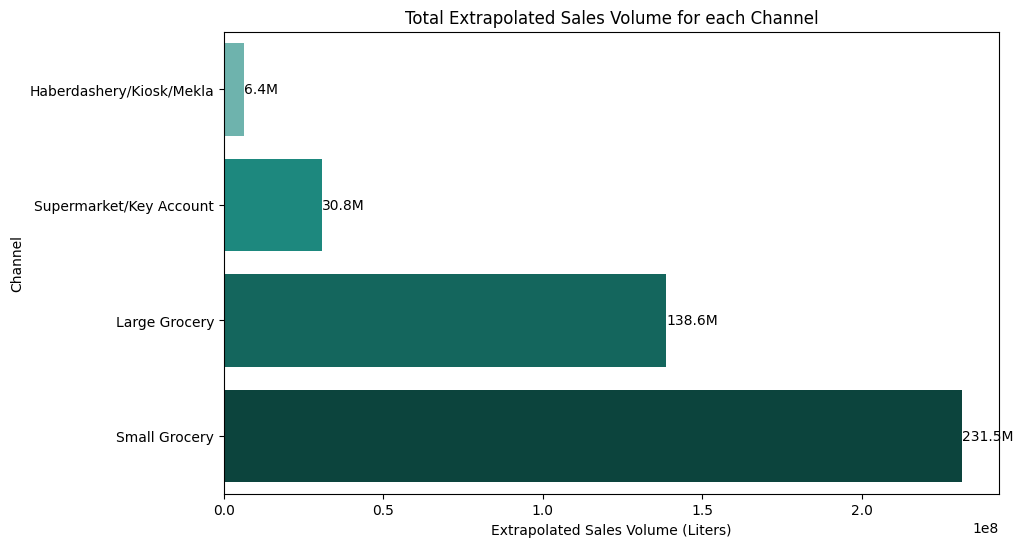

In [80]:
colors = ["#62BEB6", "#0B9A8D", "#077368", "#034D44"]

agg_data = data.groupby('Channel')['Extrapolated Sales Volume'].sum().reset_index()
agg_data.sort_values(by='Extrapolated Sales Volume', ascending=True, inplace=True)


plt.figure(figsize=(10,6))
sns.barplot(x='Extrapolated Sales Volume', y='Channel', data=agg_data, palette=colors)
plt.title('Total Extrapolated Sales Volume for each Channel')

for i, v in enumerate(agg_data['Extrapolated Sales Volume']):
      plt.text(v, i, f'{round(v/1e6,1)}M', ha='left', va='center')

plt.xlabel('Extrapolated Sales Volume (Liters)')
plt.ylabel('Channel')

plt.show()

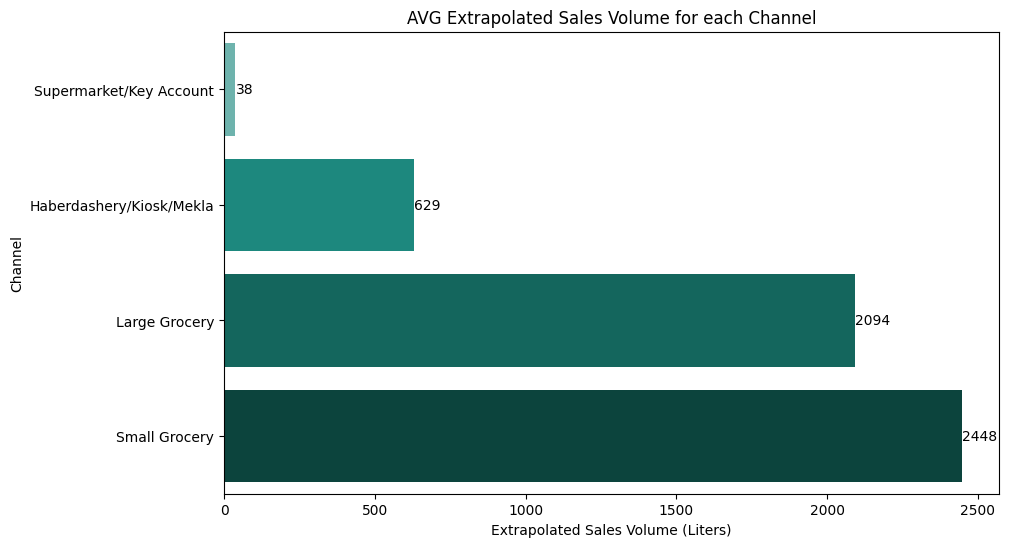

In [81]:
agg_data = data.groupby('Channel')['Extrapolated Sales Volume'].mean().reset_index()
agg_data.sort_values(by='Extrapolated Sales Volume', ascending=True, inplace=True)


plt.figure(figsize=(10,6))
sns.barplot(x='Extrapolated Sales Volume', y='Channel', data=agg_data, palette=colors)
plt.title('AVG Extrapolated Sales Volume for each Channel')

for i, v in enumerate(agg_data['Extrapolated Sales Volume']):
      plt.text(v, i, f'{round(v)}', ha='left', va='center')

plt.xlabel('Extrapolated Sales Volume (Liters)')
plt.ylabel('Channel')

plt.show()

In [82]:
data.groupby('Channel')['Raw Sales Volume'].sum()

Channel
Haberdashery/Kiosk/Mekla    6.638890e+04
Large Grocery               8.124544e+05
Small Grocery               7.974301e+05
Supermarket/Key Account     1.562606e+07
Name: Raw Sales Volume, dtype: float64

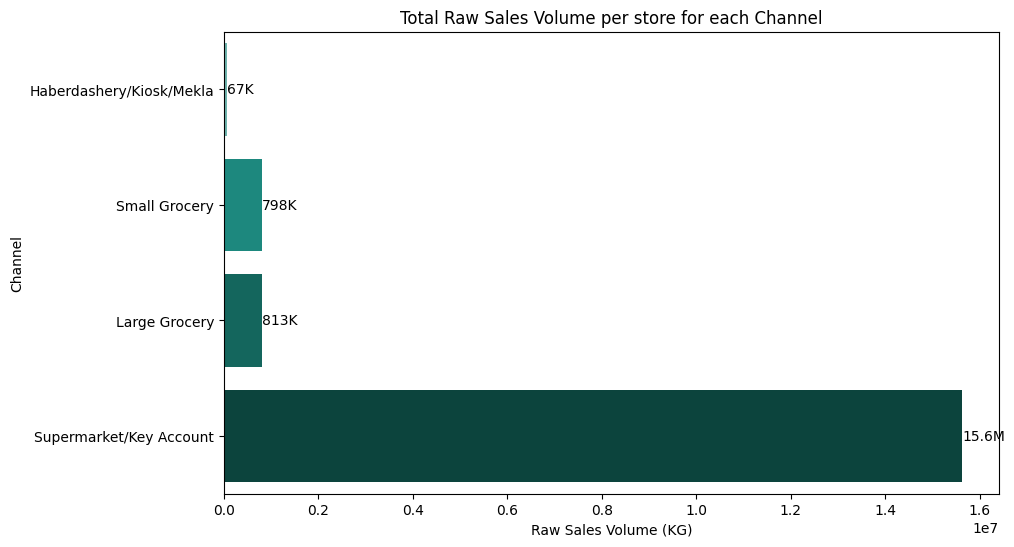

In [83]:
agg_data = data.groupby('Channel')['Raw Sales Volume'].sum().reset_index()
agg_data.sort_values(by='Raw Sales Volume', ascending=True, inplace=True)


plt.figure(figsize=(10,6))
sns.barplot(x='Raw Sales Volume', y='Channel', data=agg_data, palette=colors)
plt.title('Total Raw Sales Volume per store for each Channel')

for i, v in enumerate(agg_data['Raw Sales Volume']):
  if v > 1e6:
      plt.text(v, i, f'{round(v/1e6,1)}M', ha='left', va='center')
  else:
      plt.text(v, i, f'{ceil(v/1000)}K', ha='left', va='center')

plt.xlabel('Raw Sales Volume (KG)')
plt.ylabel('Channel')

plt.show()

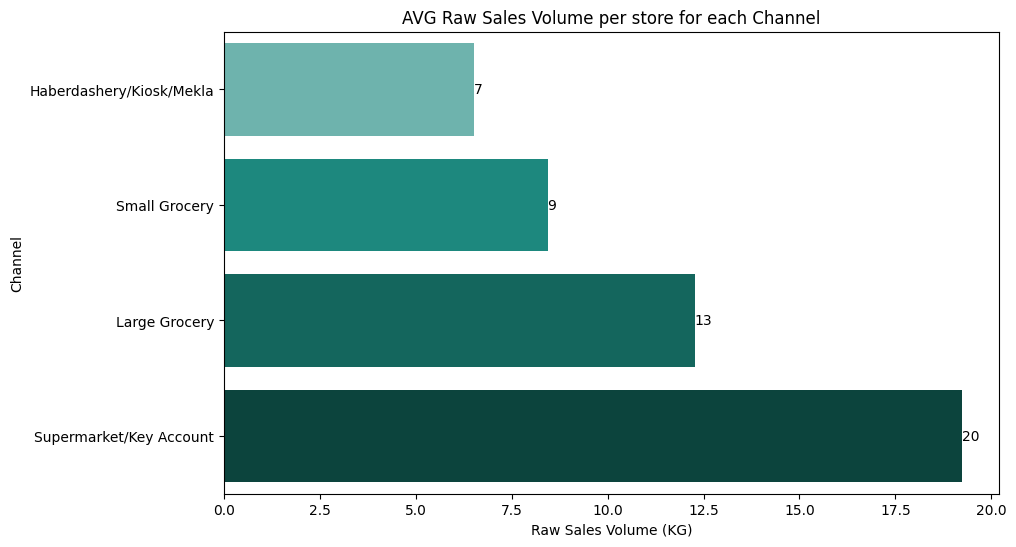

In [84]:
agg_data = data.groupby('Channel')['Raw Sales Volume'].mean().reset_index()
agg_data.sort_values(by='Raw Sales Volume', ascending=True, inplace=True)


plt.figure(figsize=(10,6))
sns.barplot(x='Raw Sales Volume', y='Channel', data=agg_data, palette=colors)
plt.title('AVG Raw Sales Volume per store for each Channel')

for i, v in enumerate(agg_data['Raw Sales Volume']):
      plt.text(v, i, f'{ceil(v)}', ha='left', va='center')

plt.xlabel('Raw Sales Volume (KG)')
plt.ylabel('Channel')

plt.show()

In [85]:
data.groupby('Channel')['XFactor'].sum()

Channel
Haberdashery/Kiosk/Mekla    1.012657e+06
Large Grocery               1.151130e+07
Small Grocery               2.766097e+07
Supermarket/Key Account     1.835125e+06
Name: XFactor, dtype: float64

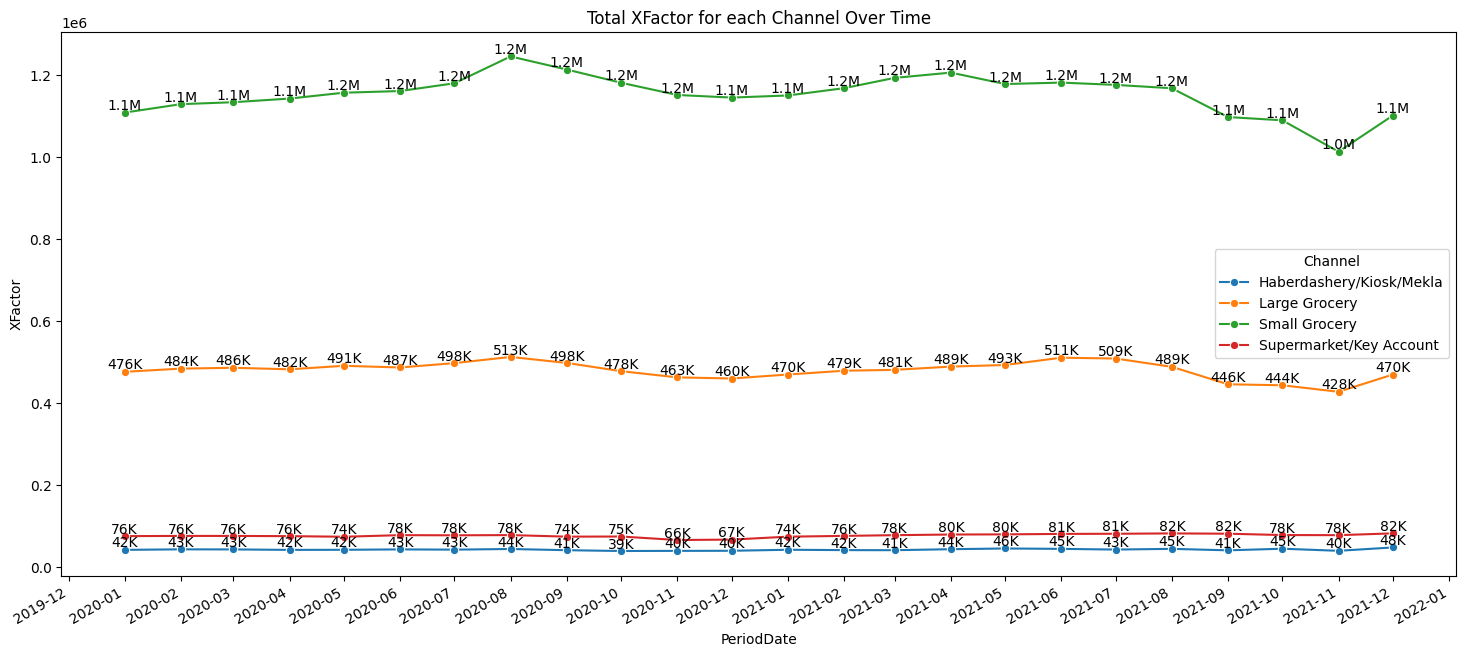

In [86]:
agg_data = data.groupby(['PeriodDate', 'Channel'])['XFactor'].sum().reset_index()

Regions = agg_data['Channel'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(18,8))
ax = sns.lineplot(x='PeriodDate', y='XFactor', data=agg_data, hue='Channel', ci=None, style='Channel', dashes=None, markers=markers_dict)
plt.title('Total XFactor for each Channel Over Time')

for x, y, label in zip(agg_data['PeriodDate'], agg_data['XFactor'], agg_data['Channel']):
    if y > 1e6:
      plt.text(x, y, f'{round(y/1e6,1)}M', ha='center', va='bottom')
    else:
      plt.text(x, y, f'{ceil(y/1000)}K', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()

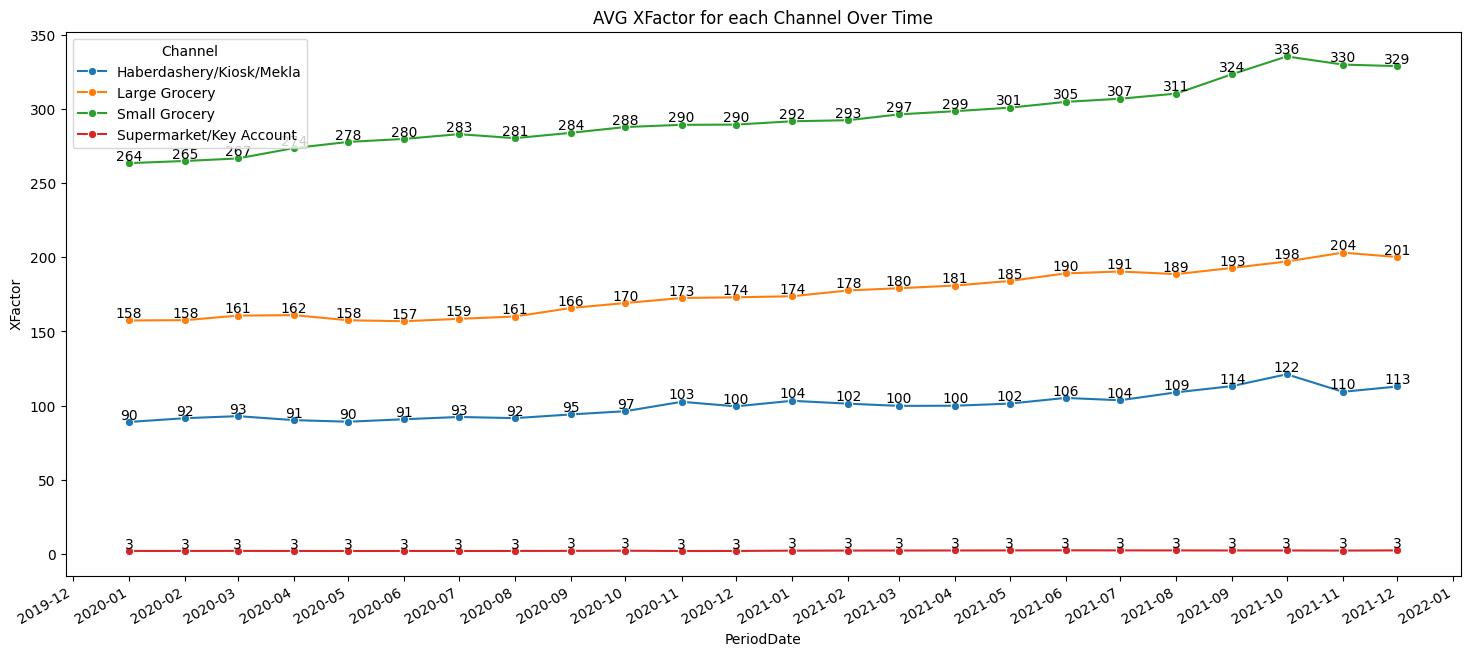

In [87]:
agg_data = data.groupby(['PeriodDate', 'Channel'])['XFactor'].mean().reset_index()

Regions = agg_data['Channel'].unique()
markers_dict = {Region: 'o' for Region in Regions}

plt.figure(figsize=(18,8))
ax = sns.lineplot(x='PeriodDate', y='XFactor', data=agg_data, hue='Channel', ci=None, style='Channel', dashes=None, markers=markers_dict)
plt.title('AVG XFactor for each Channel Over Time')

for x, y, label in zip(agg_data['PeriodDate'], agg_data['XFactor'], agg_data['Channel']):
      plt.text(x, y, f'{ceil(y)}', ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

plt.show()

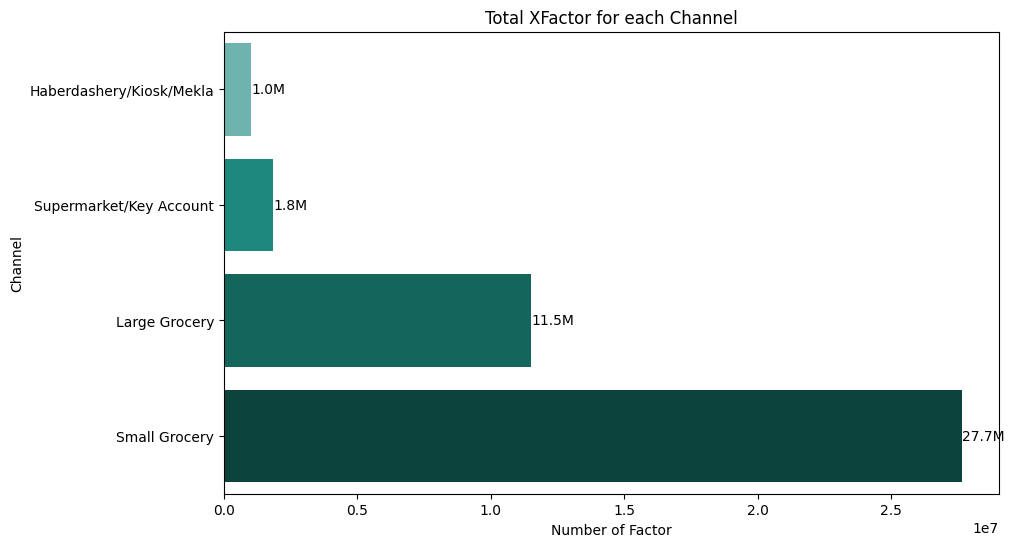

In [88]:
agg_data = data.groupby('Channel')['XFactor'].sum().reset_index()
agg_data.sort_values(by='XFactor', ascending=True, inplace=True)


plt.figure(figsize=(10,6))
sns.barplot(x='XFactor', y='Channel', data=agg_data, palette=colors)
plt.title('Total XFactor for each Channel')

for i, v in enumerate(agg_data['XFactor']):
      plt.text(v, i, f'{round(v/1e6,1)}M', ha='left', va='center')

plt.xlabel('Number of Factor')
plt.ylabel('Channel')

plt.show()

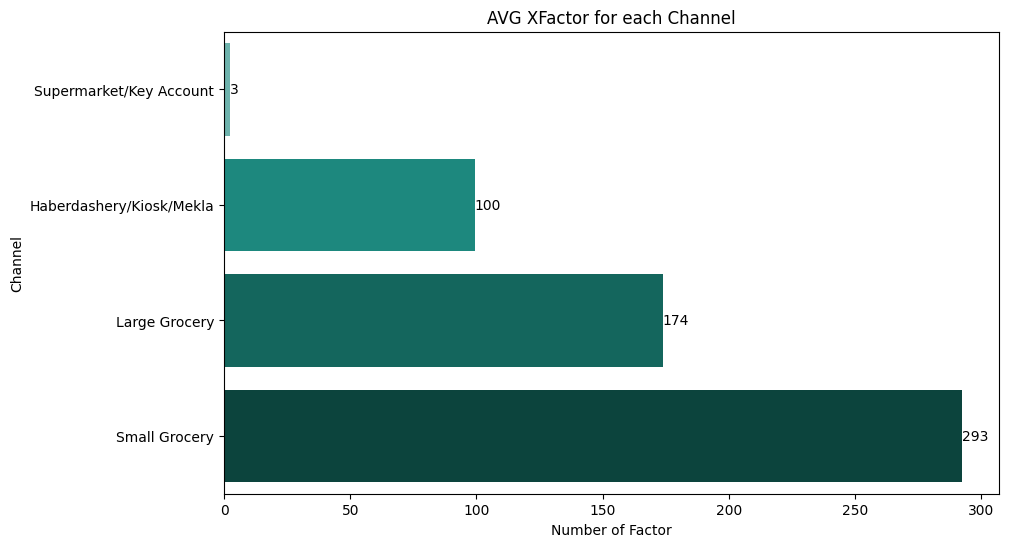

In [89]:
agg_data = data.groupby('Channel')['XFactor'].mean().reset_index()
agg_data.sort_values(by='XFactor', ascending=True, inplace=True)


plt.figure(figsize=(10,6))
sns.barplot(x='XFactor', y='Channel', data=agg_data, palette=colors)
plt.title('AVG XFactor for each Channel')

for i, v in enumerate(agg_data['XFactor']):
      plt.text(v, i, f'{ceil(v)}', ha='left', va='center')

plt.xlabel('Number of Factor')
plt.ylabel('Channel')

plt.show()

## Conclusion

1. Despite the **SuperMarket** Channel having the highest number of records over the two years, the total and average extrapolated sales volume is highest in **Small Grocery**, followed by **Large Grocery**. Interestingly, the average extrapolated sales in **kiosks** exceed those of **Supermarket**.
2. The average raw sales are highest in **SuperMarket**, followed by **Large Grocery**, **Small Grocery**, and **kiosks**, which aligns with expectations based on the store sizes.
3. XFactors play a significant role in influencing extrapolated sales volume. The average XFactors rank highest in **Small Grocery**, followed by **Large Grocery**, **kiosks**, and then **SuperMarket**.
1. **Small Grocery** channels demonstrate the most significant difference between raw and extrapolated sales volumes, which can be attributed to their large number of similar stores (high XFactor). This suggests that while each store may not sell much individually, collectively, they represent a large market share.
2. **Large Grocery** stores also show a notable increase from raw to extrapolated sales due to a high XFactor, indicating a strong presence in the market.
3. **Supermarket/Key Account** channels, while having the highest raw sales, do not see as large an increase in extrapolated sales due to a lower XFactor, suggesting that these channels are more concentrated and have fewer similar stores.
4. **Haberdashery/Kiosk/Mekla** has minimal growth from raw to extrapolated sales, reflecting its limited market reach and smaller store network.


Regional Sales Performance by Channel

In [90]:
data.groupby(['Region', 'Channel'])['Extrapolated Sales Volume'].sum()

Region        Channel                 
ALEXANDRIA    Haberdashery/Kiosk/Mekla    9.871599e+04
              Large Grocery               1.264391e+07
              Small Grocery               1.403798e+07
              Supermarket/Key Account     4.811793e+06
CAIRO         Haberdashery/Kiosk/Mekla    1.463556e+06
              Large Grocery               5.315480e+07
              Small Grocery               5.334429e+07
              Supermarket/Key Account     1.348063e+07
CANAL ZONE    Haberdashery/Kiosk/Mekla    2.803483e+05
              Large Grocery               4.589235e+06
              Small Grocery               3.675531e+06
              Supermarket/Key Account     4.051457e+05
DELTA         Haberdashery/Kiosk/Mekla    1.051302e+06
              Large Grocery               3.778239e+07
              Small Grocery               7.614197e+07
              Supermarket/Key Account     8.316577e+06
UPPER EGYPT   Haberdashery/Kiosk/Mekla    3.512276e+06
              Large Grocery               3.047208e+07
              Small Grocery               8.427250e+07
              Supermarket/Key Account     3.818605e+06
Name: Extrapolated Sales Volume, dtype: float64

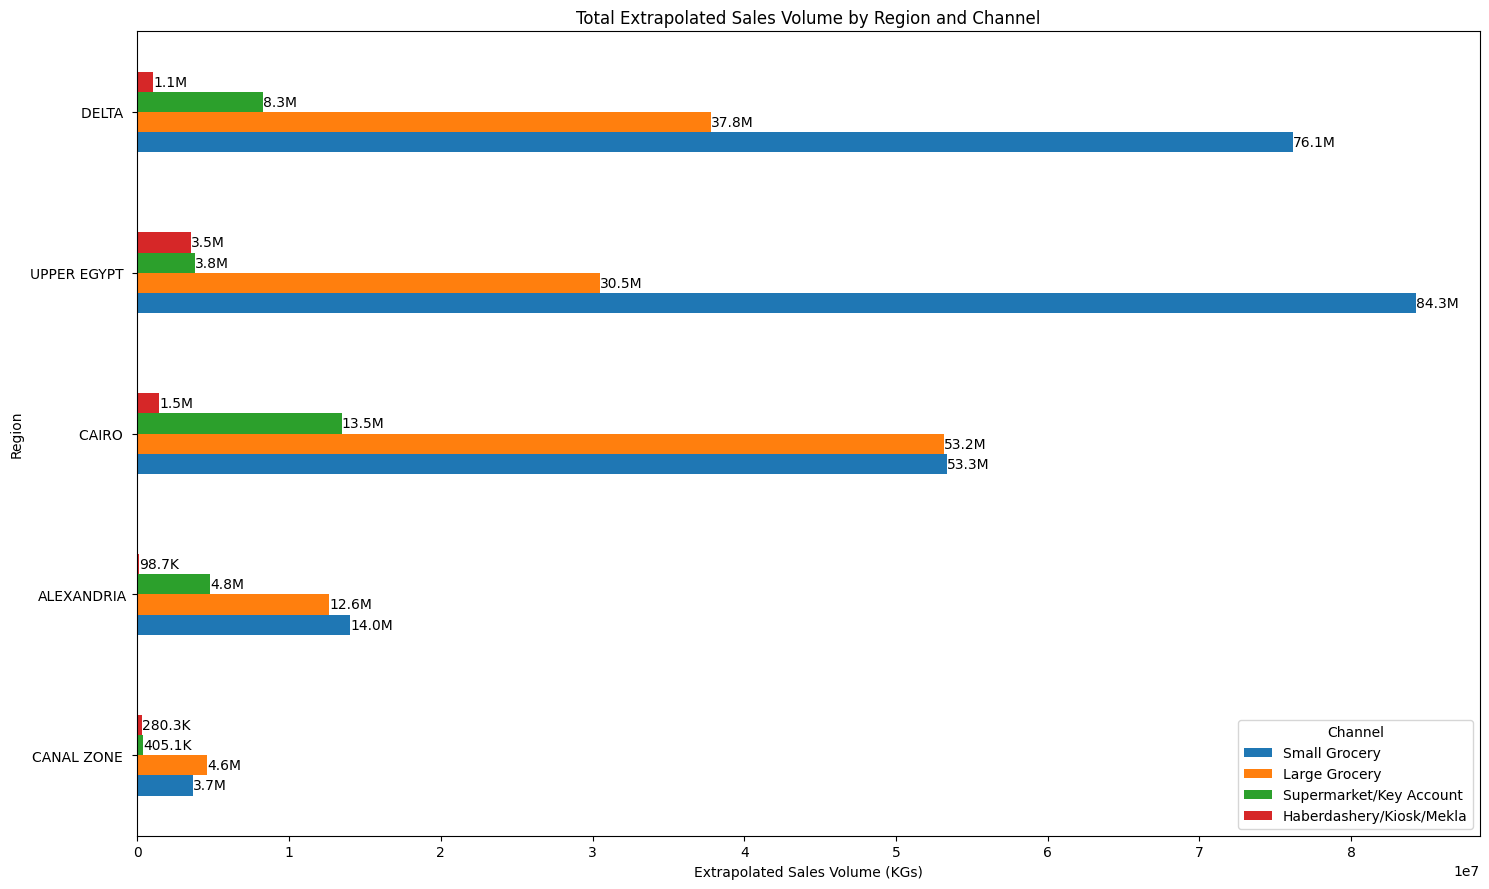

In [91]:
grouped_data = data.groupby(['Region', 'Channel'])['Extrapolated Sales Volume'].sum()

sorted_data = grouped_data.groupby(level=0).sum().sort_values().index
grouped_data = grouped_data.reindex(sorted_data, level=0)

sorted_data = grouped_data.groupby(level=1).sum().sort_values(ascending=False).index
grouped_data = grouped_data.reindex(sorted_data, level=1)

ax = grouped_data.unstack().plot(kind='barh', stacked=False, figsize=(15,9))

plt.title('Total Extrapolated Sales Volume by Region and Channel')
plt.xlabel('Extrapolated Sales Volume (KGs)')
plt.ylabel('Region')

def format_label(value):
    if value >= 1e6:
        return f'{value/1e6:.1f}M'
    elif value >= 1e3:
        return f'{value/1e3:.1f}K'
    else:
        return f'{value:.1f}'

for container in ax.containers:
    labels = [format_label(v) for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge')

plt.tight_layout()
plt.show()

In [93]:
data.groupby(['Region', 'Channel'])['Extrapolated Sales Volume'].mean()

Region        Channel                 
ALEXANDRIA    Haberdashery/Kiosk/Mekla     483.901932
              Large Grocery               3072.639741
              Small Grocery               3194.079878
              Supermarket/Key Account       31.632806
CAIRO         Haberdashery/Kiosk/Mekla     607.284706
              Large Grocery               2885.711021
              Small Grocery               4265.837027
              Supermarket/Key Account       29.189351
CANAL ZONE    Haberdashery/Kiosk/Mekla     258.147616
              Large Grocery                530.977134
              Small Grocery                611.976522
              Supermarket/Key Account       40.927945
DELTA         Haberdashery/Kiosk/Mekla     523.035636
              Large Grocery               2270.030466
              Small Grocery               2463.981913
              Supermarket/Key Account       61.258056
UPPER EGYPT   Haberdashery/Kiosk/Mekla     784.866221
              Large Grocery               1656.001411
              Small Grocery               2067.681550
              Supermarket/Key Account       72.610858
Name: Extrapolated Sales Volume, dtype: float64

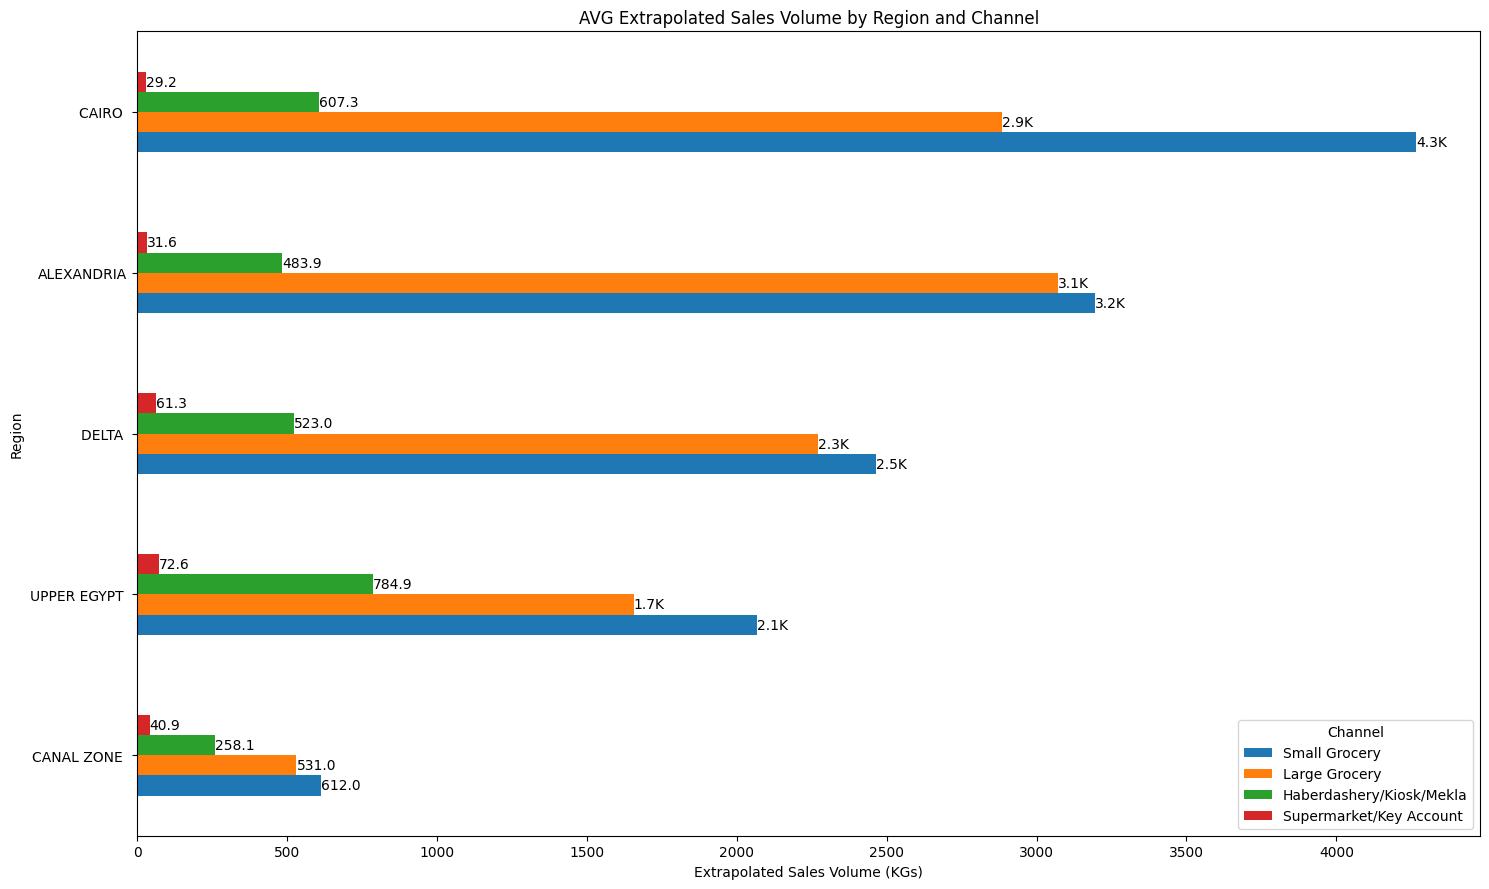

In [92]:
grouped_data = data.groupby(['Region', 'Channel'])['Extrapolated Sales Volume'].mean()

sorted_data = grouped_data.groupby(level=0).mean().sort_values().index
grouped_data = grouped_data.reindex(sorted_data, level=0)

sorted_data = grouped_data.groupby(level=1).mean().sort_values(ascending=False).index
grouped_data = grouped_data.reindex(sorted_data, level=1)

ax = grouped_data.unstack().plot(kind='barh', stacked=False, figsize=(15,9))

plt.title('AVG Extrapolated Sales Volume by Region and Channel')
plt.xlabel('Extrapolated Sales Volume (KGs)')
plt.ylabel('Region')

def format_label(value):
    if value >= 1e6:
        return f'{value/1e6:.1f}M'
    elif value >= 1e3:
        return f'{value/1e3:.1f}K'
    else:
        return f'{value:.1f}'

for container in ax.containers:
    labels = [format_label(v) for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge')

plt.tight_layout()
plt.show()

In [101]:
data.groupby(['Region', 'Channel'])['XFactor'].mean()

Region        Channel                 
ALEXANDRIA    Haberdashery/Kiosk/Mekla    169.570089
              Large Grocery               214.145745
              Small Grocery               244.990663
              Supermarket/Key Account       1.607244
CAIRO         Haberdashery/Kiosk/Mekla     82.094355
              Large Grocery               258.907980
              Small Grocery               393.496420
              Supermarket/Key Account       2.095816
CANAL ZONE    Haberdashery/Kiosk/Mekla     52.452792
              Large Grocery                47.368849
              Small Grocery                71.697897
              Supermarket/Key Account       5.618136
DELTA         Haberdashery/Kiosk/Mekla     94.248568
              Large Grocery               160.158377
              Small Grocery               325.815418
              Supermarket/Key Account       2.337479
UPPER EGYPT   Haberdashery/Kiosk/Mekla    119.288099
              Large Grocery               151.400535
              Small Grocery               273.930724
              Supermarket/Key Account       4.749277
Name: XFactor, dtype: float64

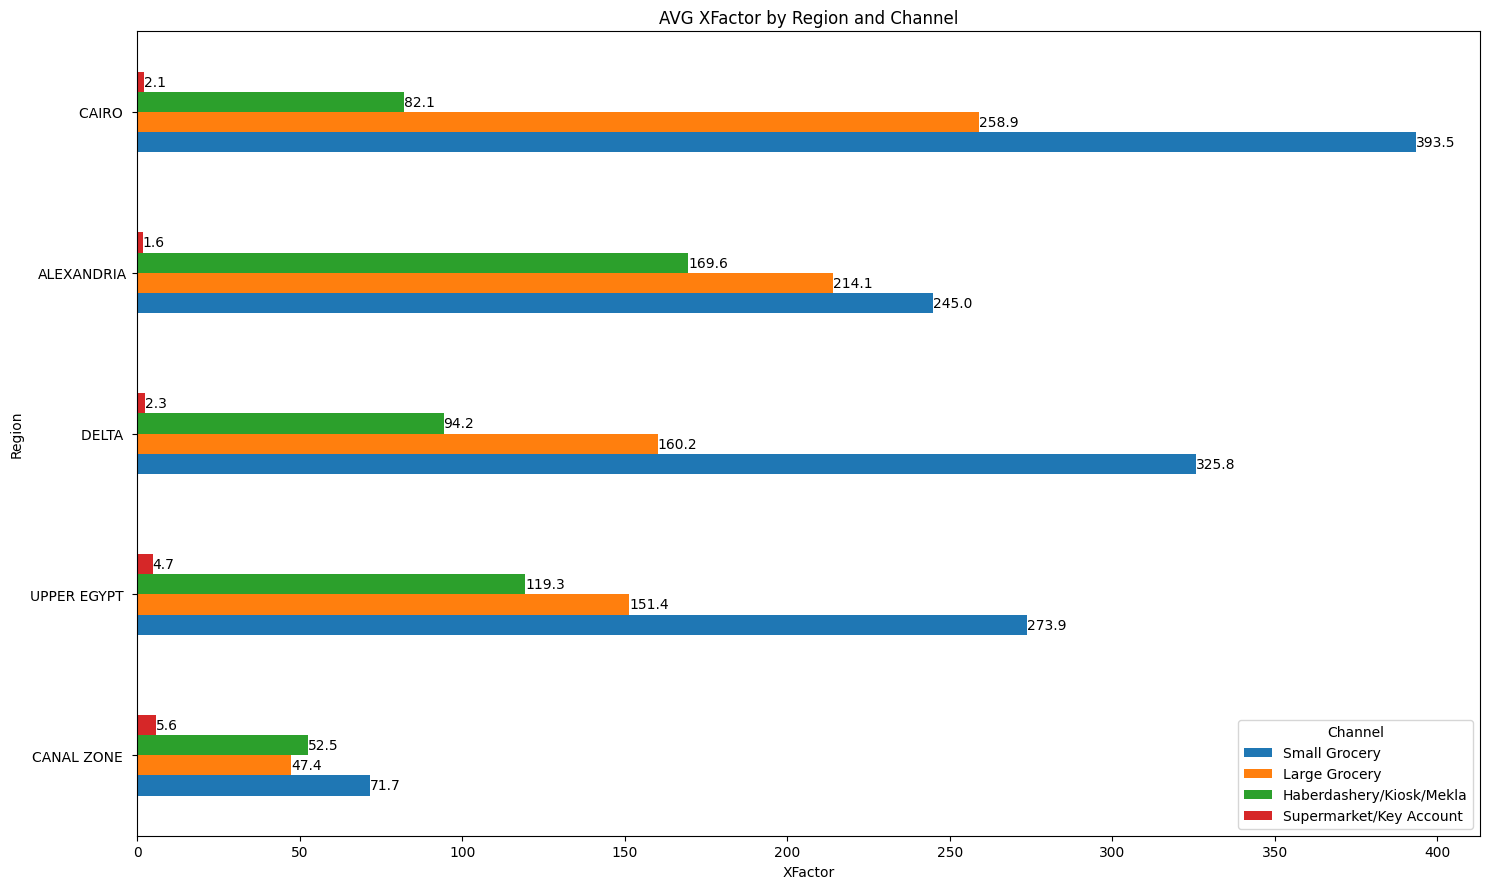

In [99]:
grouped_data = data.groupby(['Region', 'Channel'])['XFactor'].mean()

sorted_data = grouped_data.groupby(level=0).mean().sort_values().index
grouped_data = grouped_data.reindex(sorted_data, level=0)

sorted_data = grouped_data.groupby(level=1).mean().sort_values(ascending=False).index
grouped_data = grouped_data.reindex(sorted_data, level=1)

ax = grouped_data.unstack().plot(kind='barh', stacked=False, figsize=(15,9))

plt.title('AVG XFactor by Region and Channel')
plt.xlabel('XFactor')
plt.ylabel('Region')

def format_label(value):
    if value >= 1e6:
        return f'{value/1e6:.1f}M'
    elif value >= 1e3:
        return f'{value/1e3:.1f}K'
    else:
        return f'{value:.1f}'

for container in ax.containers:
    labels = [format_label(v) for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge')

plt.tight_layout()
plt.show()

## Conclusion

* **Small Grocery** stores consistently have the highest average extrapolated sales volume across most regions. This suggests that **Small Grocery** stores play a significant role in driving sales in all regions, particularly in **CAIRO** and **ALEXANDRIA** where their average sales are notably high.

* In contrast, **Supermarket/Key Account** accounts have the lowest average extrapolated sales volume in all regions. This is particularly noticeable in **Alexandria** and **Cairo**, where their sales figures are significantly lower compared to other channels, indicating that **supermarkets** are not the main driver of sales in these areas.

*  **UPPER EGYPT** shows a strong performance in the **Small Grocery** channel with a total extrapolated sales volume of 84.27 million, which is the highest among all regions and channels.

*  **DELTA** also performs well in the **Small Grocery** channel with total 76.14 million in extrapolated sales.

*  **CAIRO** has the highest total sales in the **Large Grocery** channel, contributing significantly to its total sales.

*  **Small Groceries** have consistently high sales because of high XFactors across all regions, making them a key channel to focus on for maximizing sales.

*  **Supermarket/Key Account** channels show significant total sales in **Cairo** and **Delta**, while regions like **Canal Zone** have much lower sales in this channel.

*  **Haberdashery/Kiosk/Mekla** channels generally show lower sales across all regions, with the highest being in Upper Egypt at 3.51 million. This channel contributes the least to the overall sales volume, indicating it might not be the primary focus for growth.


## Descision Making

1. **Focus on Small Grocery Stores:** Small grocery stores have consistently high average extrapolated sales volume across most regions, showing they are a key sales driver. So we can:
   * Increase product availability and variety in small grocery stores to maintain and boost their sales.
   * Implement targeted promotions and loyalty programs to encourage repeat purchases.
   * Strengthen partnerships with small grocery store chains to secure better shelf placement and visibility.
2. **Address the Impact of XFactors on Supermarket Extrapolated Sales:** Supermarkets have the highest raw sales per store, which indicates strong in-store performance. However, their extrapolated sales volume is lower due to the small number of similar stores (low XFactors). So to emphasize the supermarkets' strengths:
   * Increase store presence
   * Focus marketing efforts on emphasizing the reliability and higher product variety that supermarkets offer. Strengthening their competitive position may encourage more store openings and partnerships.
   * Collaborate with supermarket retailers to encourage expansion in underrepresented regions. More stores mean higher XFactors and a corresponding increase in extrapolated sales.
   * Given the higher raw sales, introduce product bundles and multi-buy offers to further enhance customer spending per store. This could also help justify expanding store networks.
3. **Optimize Distribution in Large Grocery Stores:** Large grocery stores perform well but typically trail behind small groceries. So it will be good to:
   * Ensure that popular and high-demand products are well-stocked in large grocery stores.
   * Negotiate better shelf space and placements in large grocery stores to improve visibility and sales.
   * Run cross-promotions between large and small grocery stores to boost sales in both channels.
4. **Leverage Kiosks for Niche Sales:** Kiosks show moderate performance, especially in **Upper Egypt**, indicating potential for growth. Se we can:
   * Use kiosks for localized, niche marketing strategies, offering products suited to quick, on-the-go purchases.
   * Increase the variety of products sold through kiosks, especially items that appeal to convenience-oriented customers.
5. **Increase XFactors for Supermarkets:** Since supermarkets have good raw sales, increasing the XFactors (i.e., the representation of similar stores in the market) could boost total extrapolated sales.


# Analysis of how sales differ between Electronic and non-Electronic outlets

In [95]:
data['Electronic'].value_counts()

Electronic
True     786365
False    196808
Name: count, dtype: int64

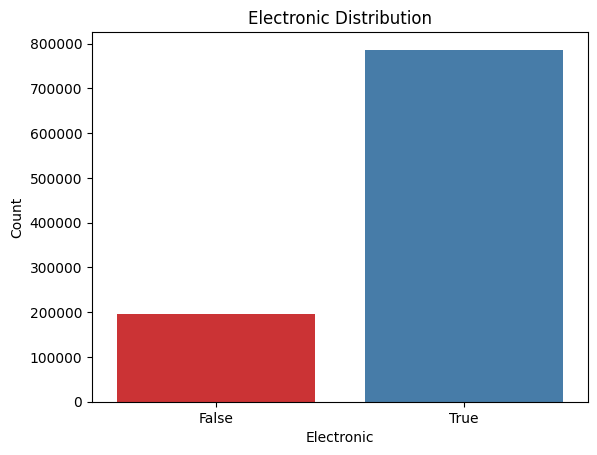

In [96]:
sns.countplot(data=data, x='Electronic', palette = "Set1")
plt.title('Electronic Distribution')
plt.xlabel('Electronic')
plt.ylabel('Count')
plt.show()

While the True category, representing electronic data received from retailers, is more prevalent in terms of count, the False category, which represents manually collected data by the Nielsen Field team, is significantly more impactful in terms of total sales volume.  
This suggests that the data collected manually may involve higher-value items or bulk sales, leading to a greater overall contribution to the Extrapolated Sales Volume.

In [97]:
data['Extrapolated Sales Volume'].groupby(data['Electronic']).sum()

Electronic
False    3.880298e+08
True     1.932382e+07
Name: Extrapolated Sales Volume, dtype: float64

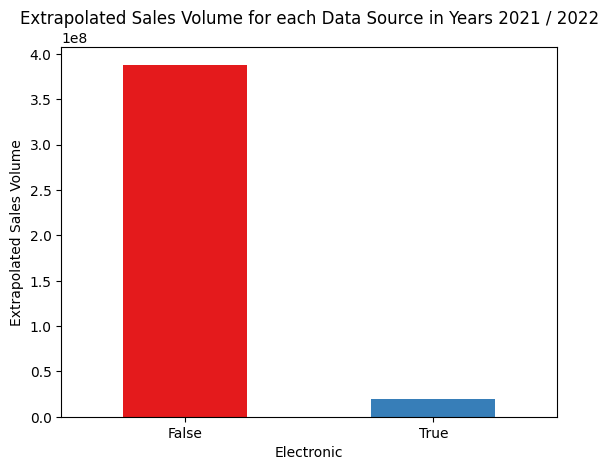

In [94]:
palette = sns.color_palette('Set1', 2)

data['Extrapolated Sales Volume'].groupby(data['Electronic']).sum().plot(kind='bar', color= palette)
plt.title('Extrapolated Sales Volume for each Data Source in Years 2021 / 2022')
plt.xlabel('Electronic')
plt.ylabel('Extrapolated Sales Volume')

plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)
plt.show()

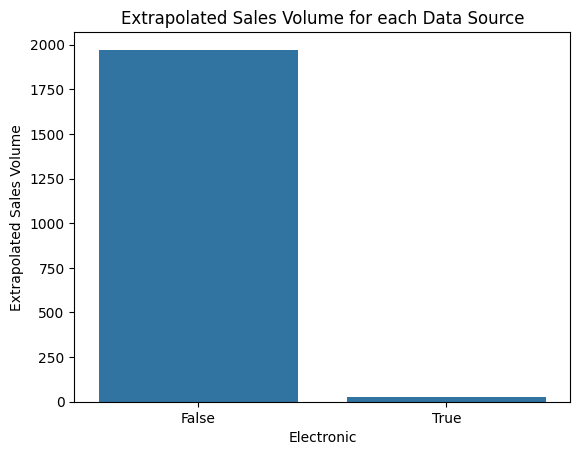

In [98]:
# The mean
sns.barplot(x='Electronic', y='Extrapolated Sales Volume', data=data, errorbar=None)
plt.title('Extrapolated Sales Volume for each Data Source')
plt.show()

# 2. Product and Brand Analysis

#### Identify top-selling Products and Brands based on Raw Sales Volume and Extrapolated Sales Volume.

In [ ]:
data['Product name'].nunique()

1749

In [ ]:
from re import sub
def format_label(label):
    label = sub(r'[\(\)]', '', label)
    label = sub('-', ' ', label)
    return '\n'.join(label.strip().split())


def format_millions(value):
    return f'{value / 1e6:.1f}M'

<ipython-input-81-7059fb2185ab>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_30_labels)


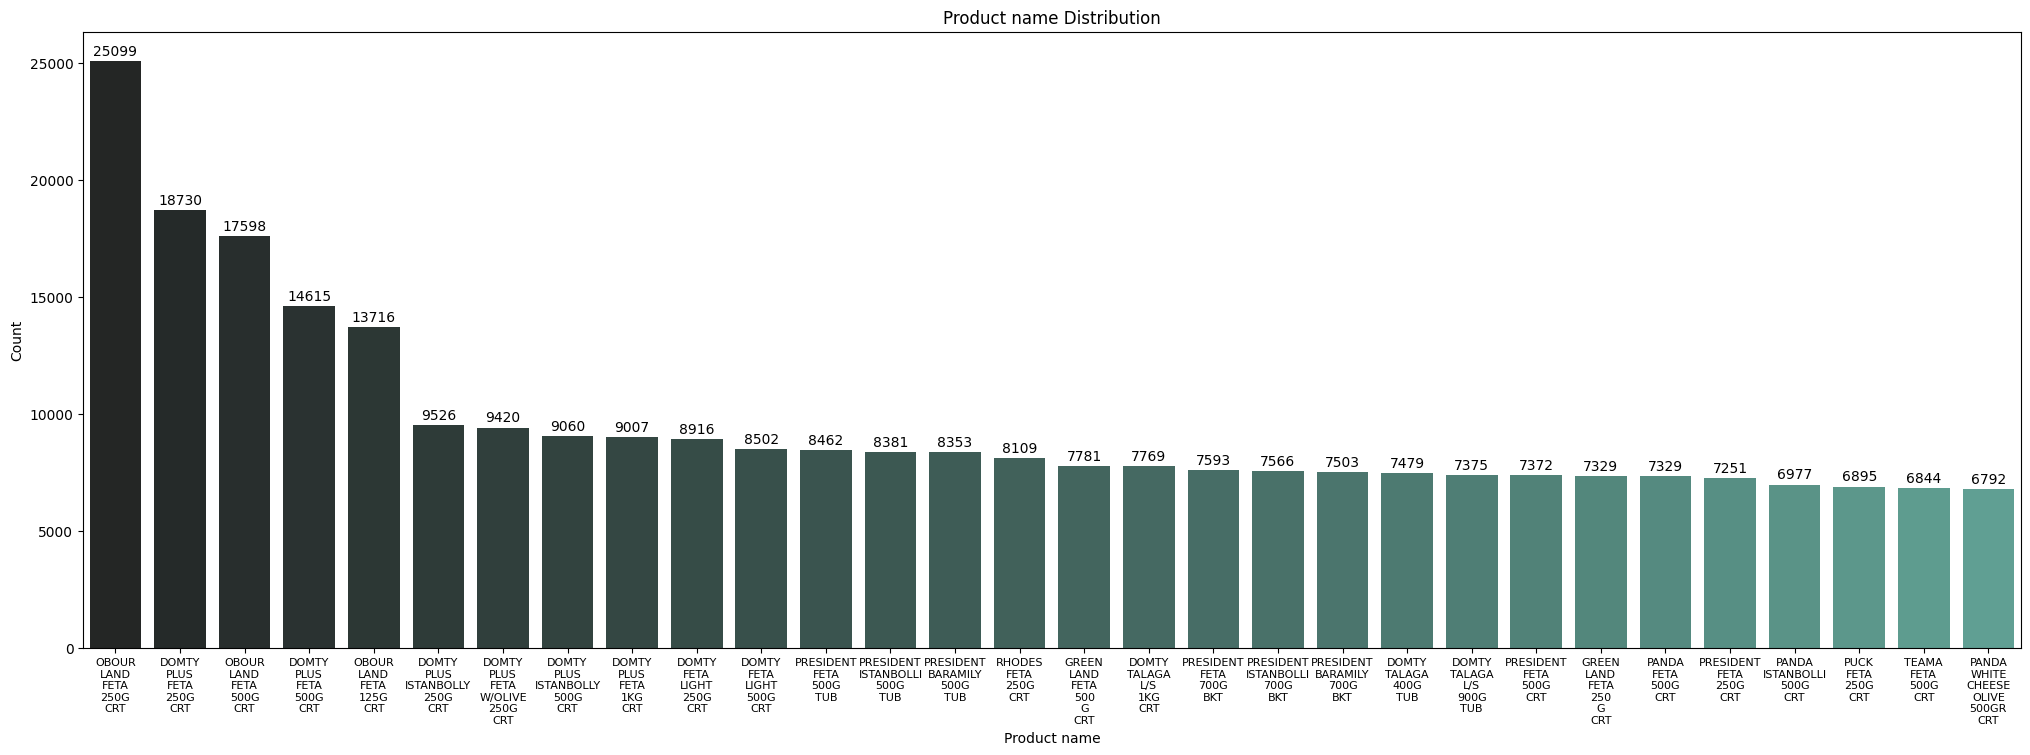

In [ ]:
product_counts = data['Product name'].value_counts()
top_30_products = product_counts.head(30)
top_30_data = data[data['Product name'].isin(top_30_products.index)]

top_30_labels = [format_label(label) for label in top_30_products.index]

plt.figure(figsize=(25,8))
ax = sns.countplot(data=top_30_data, x='Product name', order=top_30_products.index, palette="dark:#5A9")
plt.title('Product name Distribution')
plt.xlabel('Product name')
plt.ylabel('Count')
plt.xticks(fontsize=8)
ax.set_xticklabels(top_30_labels)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)

plt.show()

In [ ]:
product_sales = data.groupby('Product name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30)

product_sales.values

array([58026732.29679775, 33644398.769221  , 22075603.509839  ,
       17767640.1685981 , 15781479.6212795 ,  7466986.2875235 ,
        5654574.4719245 ,  5412035.3765965 ,  5405734.63664437,
        5056522.04765825,  4753024.17328625,  3995435.214105  ,
        3474776.87589425,  3349668.49824   ,  3118303.371908  ,
        2846419.66832575,  2787665.881323  ,  2749137.64829575,
        2657322.33555025,  2588729.0505885 ,  2496819.3081185 ,
        2093747.53604575,  1934060.01949575,  1873019.1730405 ,
        1768914.7421155 ,  1687516.95118375,  1583567.64461   ,
        1578001.570938  ,  1457780.5103315 ,  1416279.0273665 ])

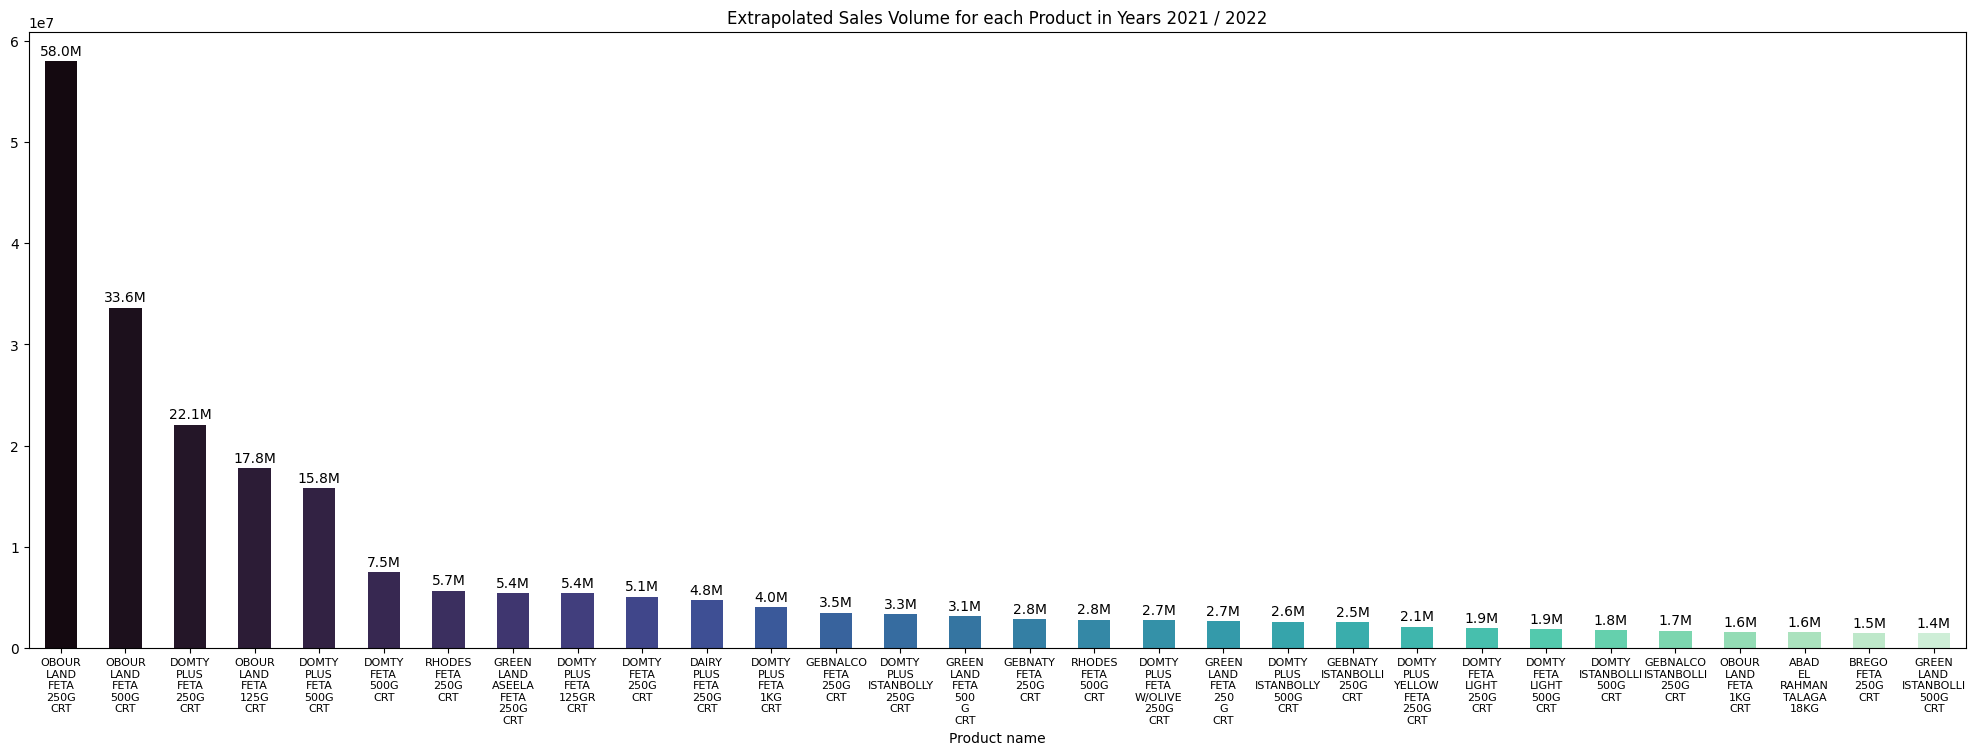

In [ ]:
top_30_labels = [format_label(label) for label in product_sales.index]

palette = sns.color_palette('mako', len(product_sales))
plt.figure(figsize=(25,8))

ax = data.groupby('Product name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30).plot(kind='bar', color=palette)
plt.title('Extrapolated Sales Volume for each Product in Years 2021 / 2022')
ax.set_xticklabels(top_30_labels)
plt.xticks(rotation=0, fontsize=8)

for container in ax.containers:
    ax.bar_label(container, labels=[format_millions(val) for val in container.datavalues], label_type='edge', padding=2)

plt.show()

In [ ]:
data['Brand name'].nunique()

815

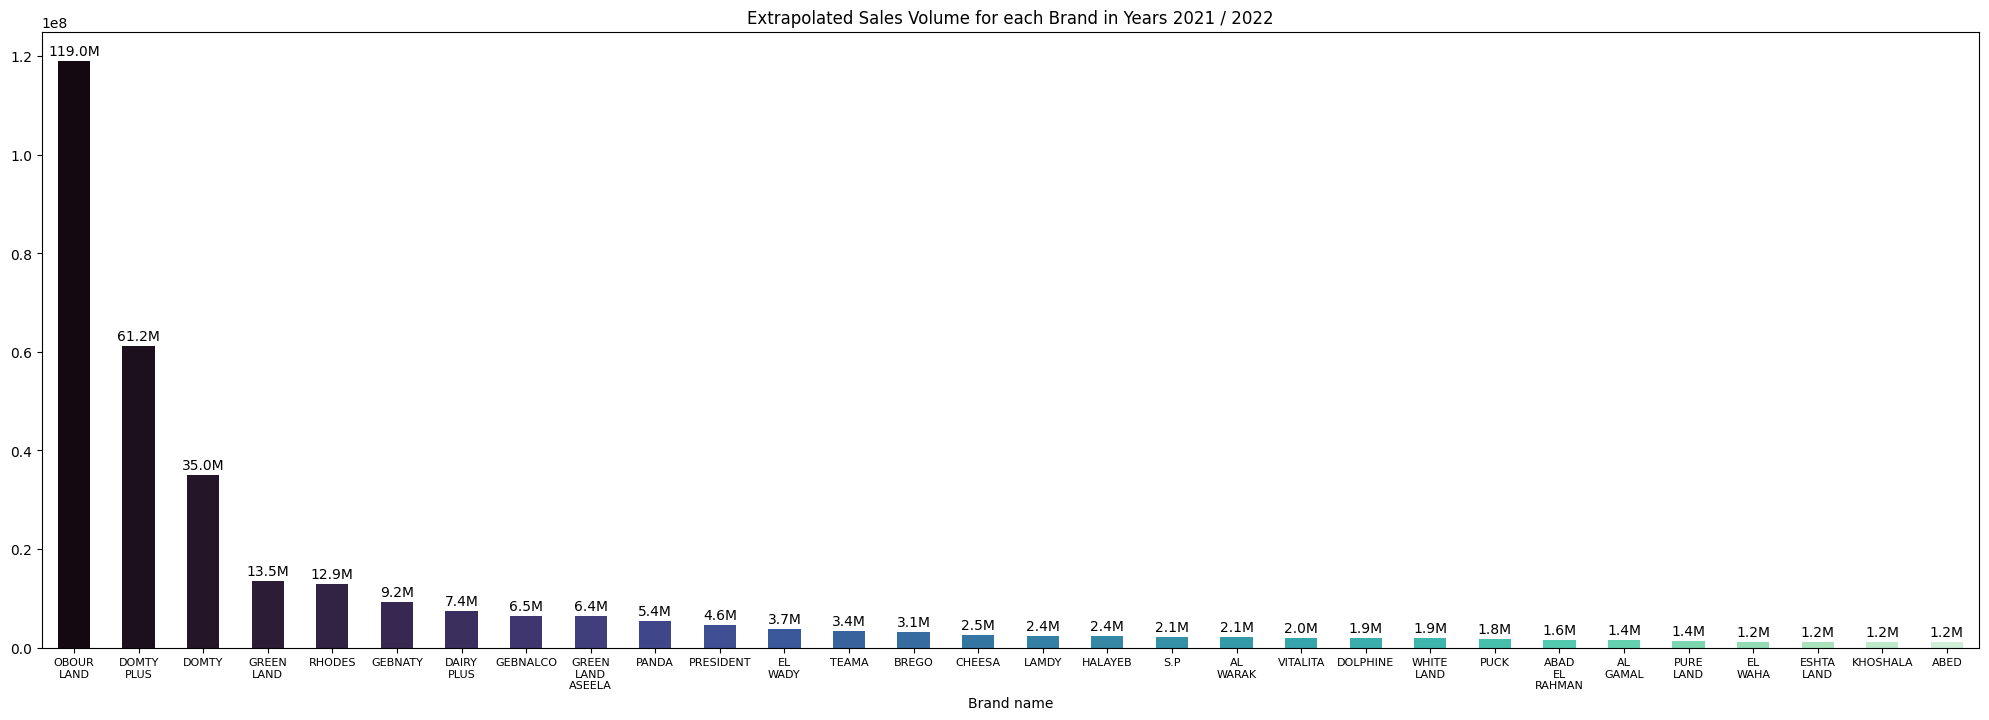

In [ ]:
brands_sales = data.groupby('Brand name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30)
top_30_labels = [format_label(label) for label in brands_sales.index]

palette = sns.color_palette('mako', len(brands_sales))
plt.figure(figsize=(25,8))

ax = data.groupby('Brand name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30).plot(kind='bar', color=palette)
plt.title('Extrapolated Sales Volume for each Brand in Years 2021 / 2022')
ax.set_xticklabels(top_30_labels)
plt.xticks(rotation=0, fontsize=8)

for container in ax.containers:
    ax.bar_label(container, labels=[format_millions(val) for val in container.datavalues], label_type='edge', padding=2)

plt.show()

In [ ]:
data['Manufacturer name'].nunique()

712

In [ ]:
data.groupby('Manufacturer name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30).index

Index(['OBOUR LAND CO', 'DOMTY - ARABIAN FOOD INDUSTRIES CO',
       'LACTALIS-HALAWA', 'THE ARAB DAIRY PRODUCTS CO.', 'NOT AVAILABLE',
       'AL BOROUJ CO', 'GREEN FIELD CO', 'DAIRY INTER.CO', 'RIYADA S.A.E.',
       'BREGO FOR FOOD INDUSTRIES ( S.A.E )', 'AM GROUP CO',
       'KHALED KHOSHALA CO', 'TAHTA FACTORY FOR CHEESE & BUTTER',
       'AL WARAK CO', 'HALAYEB CO', 'EGYPTION CO', 'FAFECO', 'ABAD CO',
       'EL FAYOUM CO.', 'ABD EL RAHEEM CO', 'ABED CO', 'MALEKA CO', 'TIBA CO',
       'AL FATH CO.', 'AWLAD NOUR CO', 'EL WAHA', 'SARA CO.', 'NADA CO',
       'MISR OCTOBER CO.', 'AL COMANDA CO'],
      dtype='object', name='Manufacturer name')

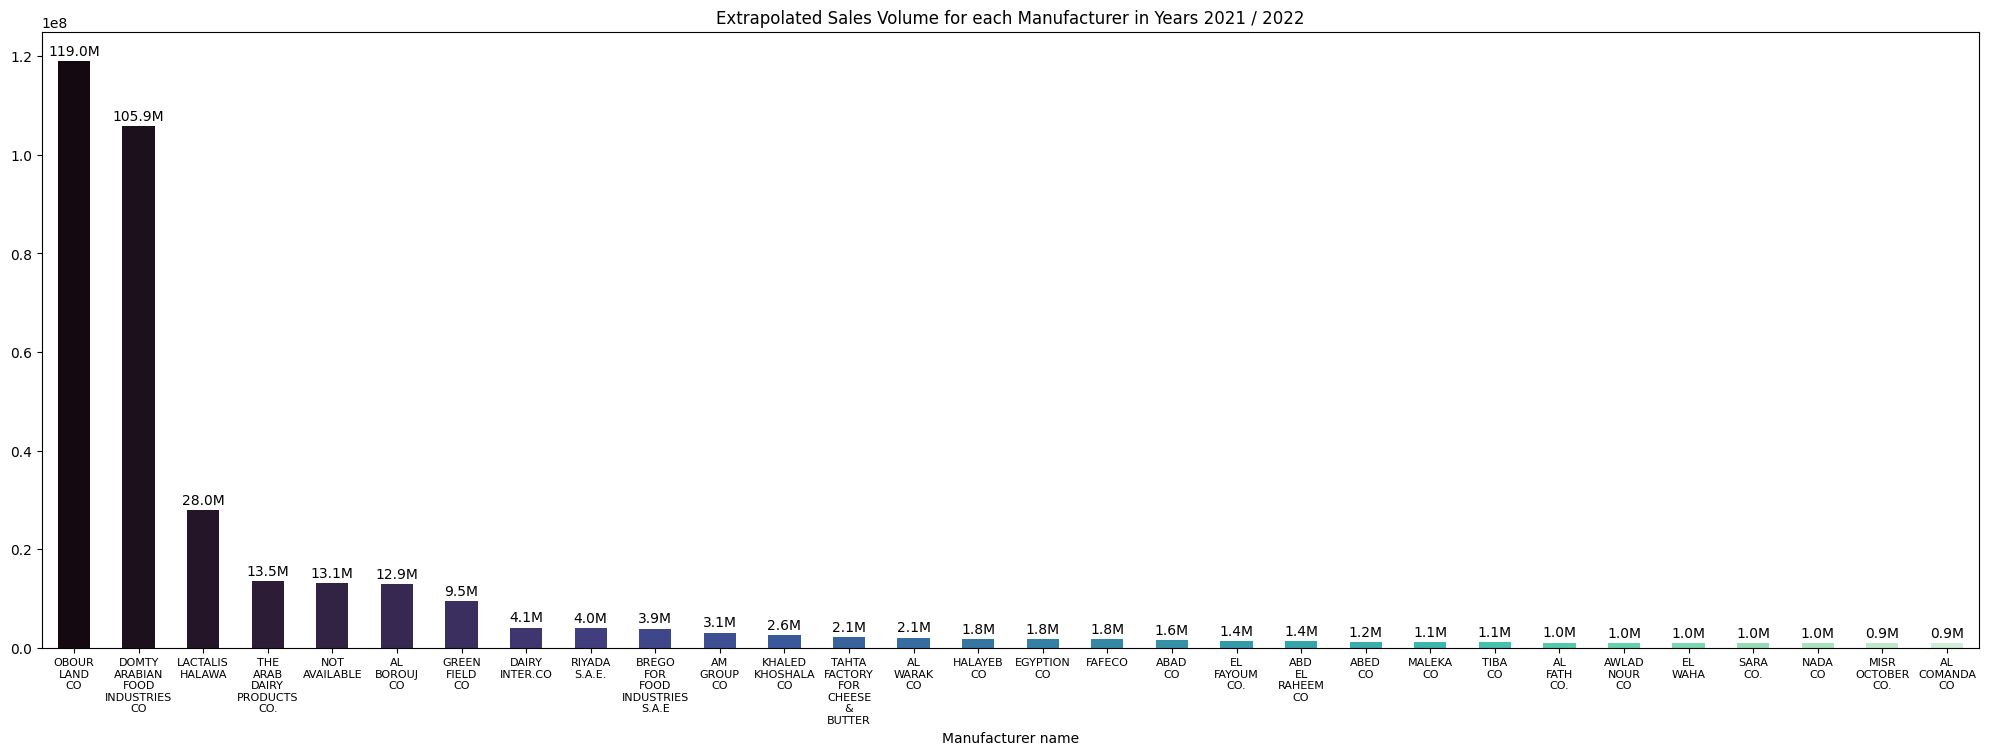

In [ ]:
manufacturer_sales = data.groupby('Manufacturer name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30)
top_30_labels = [format_label(label) for label in manufacturer_sales.index]

palette = sns.color_palette('mako', len(manufacturer_sales))
plt.figure(figsize=(25,8))

ax = data.groupby('Manufacturer name')['Extrapolated Sales Volume'].sum().sort_values(ascending=False).head(30).plot(kind='bar', color=palette)
plt.title('Extrapolated Sales Volume for each Manufacturer in Years 2021 / 2022')
ax.set_xticklabels(top_30_labels)
plt.xticks(rotation=0, fontsize=8)

for container in ax.containers:
    ax.bar_label(container, labels=[format_millions(val) for val in container.datavalues], label_type='edge', padding=2)

plt.show()

In [ ]:
data.head()

Outlet mnemonic                            Cell Name  Electronic  \
0          ZD8020  CENTRAL UPPER EGYPT-R-LARGE GROCERY       False   
1          ASQ005                      FATHALLAH ASWAQ        True   
2          QNR089          SOUTHERN UE R SMALL GROCERY       False   
3          KHZ049                          KHEIR ZAMAN        True   
4          LX4700        South Upper Egypt Supermarket       False   

         Region                  Channel  \
0  UPPER EGYPT             Large Grocery   
1    ALEXANDRIA  Supermarket/Key Account   
2  UPPER EGYPT             Small Grocery   
3        CAIRO   Supermarket/Key Account   
4  UPPER EGYPT   Supermarket/Key Account   

                                                  Category name  \
0  CHEESE- BLOCK                                                  
1  CHEESE- BLOCK                                                  
2  CHEESE- BLOCK                                                  
3  CHEESE- BLOCK                                                  
4  CHEESE- BLOCK                                                  

  Manufacturer name  Brand name              Product name   XFactor  \
0     OBOUR LAND CO  OBOUR LAND  OBOUR LAND FETA 500G CRT  186.6969   
1        HALAYEB CO     HALAYEB   HALAYEB TALAGA 400G TUB    1.0000   
2     OBOUR LAND CO  OBOUR LAND  OBOUR LAND FETA 500G CRT  212.0554   
3   LACTALIS-HALAWA   PRESIDENT   PRESIDENT FETA 250G CRT    1.0000   
4   LACTALIS-HALAWA   PRESIDENT   PRESIDENT FETA 500G TUB   10.9699   

   Raw Sales Volume  Extrapolated Sales Volume  PeriodDate  
0           13.7750                2571.749798  2020-01-01  
1            2.6160                   2.616000  2020-01-01  
2            2.9500                 625.563430  2020-01-01  
3            3.8125                   3.812500  2020-01-01  
4            2.0350                  22.323747  2020-01-01

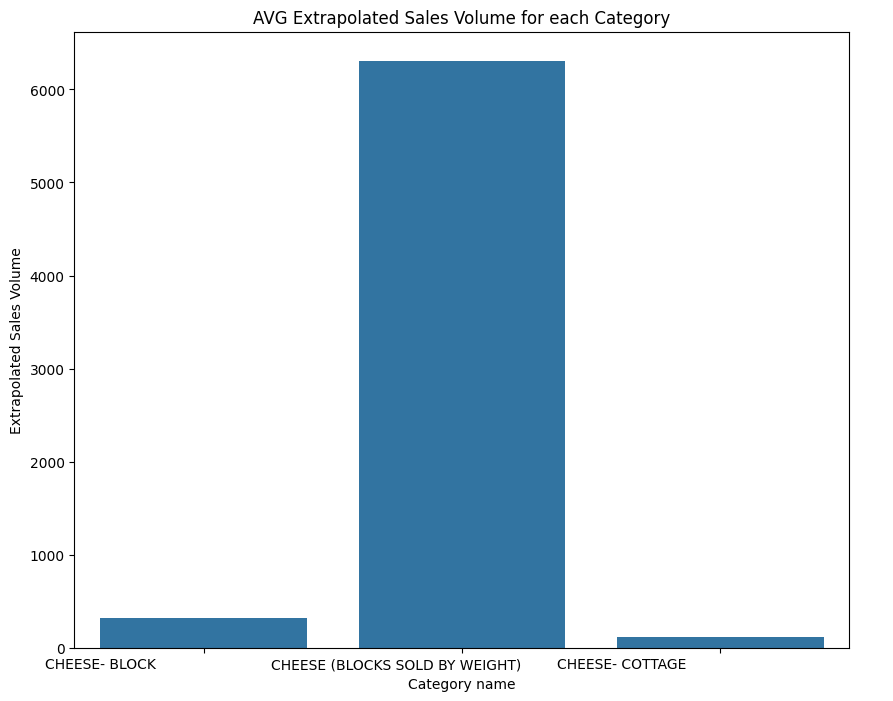

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='Category name', y='Extrapolated Sales Volume', data=data, errorbar=None)
plt.title('AVG Extrapolated Sales Volume for each Category')
plt.show()

In [ ]:
data['Category name'].value_counts()

Category name
CHEESE- BLOCK                                                   960832
CHEESE (BLOCKS SOLD BY WEIGHT)                                   15413
CHEESE- COTTAGE                                                   6928
Name: count, dtype: int64

In [ ]:
data['Outlet mnemonic'].unique()

array(['ZD8020', 'ASQ005', 'QNR089', ..., 'KFU056', 'C02974', 'KLU031'],
      dtype=object)

**Cell Name:** helps in organizing and analyzing retail data based on both location and store type.

In [ ]:
# data['Cell Name'].unique()

In [ ]:
data['Channel'].unique()

# Large Grocery: CENTRAL UPPER EGYPT-R-LARGE GROCERY
# Medium Grocery: EAST DELTA R MEDIUM GROCERY
# Small Grocery: SOUTHERN UE R SMALL GROCERY
# Supermarket: EAST DELTA-U-KA/SUPERMARKET
# Kiosk: WEST DELTA-U-KIOSKS
# Specialty Stores: HYPERONE, MERCATO, PANDA, FRESH FOOD

array(['Large Grocery', 'Supermarket/Key Account', 'Small Grocery',
       'Haberdashery/Kiosk/Mekla'], dtype=object)

In [ ]:
data['Region'].unique()

# "EAST DELTA," "WEST DELTA," "ALEXANDRIA," "CANAL ZONE," "SOUTHERN UPPER EGYPT," "CENTRAL UPPER EGYPT."

array(['UPPER EGYPT ', 'ALEXANDRIA', 'CAIRO ', 'DELTA ', 'CANAL ZONE '],
      dtype=object)